In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import re
import seaborn as sns

In [2]:
pd.read_pickle("/net/mraid20/ifs/wisdom/segal_lab/genie/LabData/Analyses/tomerse/diet_mb/data/diet_intervention/directional_diet_shap.pkl")

,Feature,Directional Mean Absolute SHAP Value
0,Acorn squash,0.000096
1,Alfalfa sprouts,0.000046
2,Almond Beverage,0.000219
3,Almond flour,0.000073
4,Almond spread,0.000159
...,...,...
693,fruitjuicesandsoftdrinks,-0.000553
694,milkcreamcheeseandyogurts,0.001554
695,sweetmilkproducts,0.000333
696,sweets,-0.001228


In [3]:
home_path = '/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/'
PROBLEM = 'regression' # 'regression' or 'given_presence' or 'classification'
SPECIES = 'mpa_species' # 'mpa_species' or 'segal_species'
aggregate_features = False
aggregation = '_aggregated_features' if aggregate_features else ''

In [4]:
single_style = "nature_single.mplstyle"
double_style = "nature_double.mplstyle"
third_style = "nature_third.mplstyle"
plt.rcParams["figure.dpi"] = 150
plt.style.use(single_style)
palette = sns.color_palette("Set2", n_colors=8)

In [5]:
def read_results(df):
    output = []
    for col in df.columns:
        output.append(df[col])
    return tuple(output)

In [6]:
diet_mb = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{SPECIES}/diet_mb.pkl")
with open(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{SPECIES}/my_lists.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
base_features, all_features, targets = loaded_lists

# Is this needed ?
# diet_mb.columns = diet_mb.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
# targets = [re.sub(r'[^a-zA-Z0-9_]', '_', x) for x in targets]
# all_features = [re.sub(r'[^a-zA-Z0-9_]', '_', x) for x in all_features]

diet_mb.columns = [
    col[3:] if col.startswith("s__") else col
    for col in diet_mb.columns
]

diet_mb

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,Vescimonas_coprocola,Vescimonas_fastidiosa,Victivallis_lenta,Victivallis_vadensis,Wujia_chipingensis,bacterium_210917_DFI_7_65,Richness,Shannon_diversity,modified_HACK_top17_score,GMWI2_score
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1000942861,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016416,0.000000,0.0,...,-3.217747,-4.0,-4.000000,-4.000000,-4.000000,-4.0,138,3.61,96.28125,0.930216
10K_1001201093,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.013895,0.000000,0.0,...,-2.629808,-4.0,-4.000000,-4.000000,-4.000000,-4.0,98,3.18,157.28125,0.881661
10K_1002254441,0.0,0.0,0.0,0.0,0.0,0.081238,0.0,0.000000,0.000000,0.0,...,-4.000000,-4.0,-4.000000,-2.733074,-1.767836,-4.0,173,4.07,205.53125,0.820586
10K_1003113258,0.0,0.0,0.0,0.0,0.0,0.002048,0.0,0.008929,0.000000,0.0,...,-3.172846,-4.0,-3.473876,-2.996755,-4.000000,-4.0,187,4.17,147.28125,1.025713
10K_1007330152,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,-4.000000,-4.0,-4.000000,-4.000000,-3.393356,-4.0,129,3.71,92.56250,1.202788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9996884777,0.0,0.0,0.0,0.0,0.0,0.002401,0.0,0.000000,0.000000,0.0,...,-4.000000,-4.0,-3.200987,-4.000000,-4.000000,-4.0,168,3.84,153.59375,0.783450
10K_9998420917,0.0,0.0,0.0,0.0,0.0,0.019995,0.0,0.018783,0.000000,0.0,...,-4.000000,-4.0,-2.802774,-4.000000,-2.172685,-4.0,186,4.08,130.71875,0.781873
10K_9998635752,0.0,0.0,0.0,0.0,0.0,0.001607,0.0,0.011305,0.000000,0.0,...,-2.652681,-4.0,-4.000000,-4.000000,-4.000000,-4.0,106,2.90,137.21875,1.176277


In [7]:
len(targets)

536

In [8]:
len(all_features)

700

Handle a case where diet features are aggregated into main categories

In [9]:
category_nice_names = {
        'AlcoholicDrinks': 'Alcoholic Drinks',
        'fruitjuicesandsoftdrinks': 'Fruit Juices & Soft Drinks',
        'Beefveallambandothermeatproducts': 'Beef, Veal, Lamb & Other Meat',
        'Proccessedmeatproducts': 'Processed Meat Products',
        'Poultryanditsproducts': 'Poultry & Its Products',
        'bakedgoods': 'Baked Goods',
        'Bread_cat': 'Bread Category',
        'Bread_wholewheat': 'Whole Wheat Bread',
        'FastFoods': 'Fast Foods',
        'Snacks': 'Snacks',
        'sweets': 'Sweets',
        'Cannedvegandfruits': 'Canned Vegetables & Fruits',
        'Fruits': 'Fruits',
        'MedOilandfats': 'Mediterranean Oils & Fats',
        'Vegetables': 'Vegetables',
        'Soupsandsauces': 'Soups & Sauces',
        'Cereals': 'Cereals',
        'Deepfriedfoods': 'Deep Fried Foods',
        'Drinks': 'Drinks',
        'sweetmilkproducts': 'Sweetened Milk Products',
        'Eggsandtheirproducts': 'Eggs & Their Products',
        'Fishandseafood': 'Fish & Seafood',
        'Hardcheese': 'Hard Cheese',
        'milkcreamcheeseandyogurts': 'Milk, Cream, Cheese & Yogurts',
        'Industrializedvegetarianfoodreadytoeat': 'Processed Vegetarian Food',
        'Oilsandfats': 'Oils & Fats',
        'Others': 'Other Foods',
        'PastaGrainsandSidedishes': 'Pasta, Grains & Side Dishes',
        'PastaGrainsandSidedishes_wholewheat': 'Whole Wheat Pasta & Grains',
        'Pulsesandproducts': 'Pulses & Their Products',
        'Spicesandherbs': 'Spices & Herbs',
        'Nutsseedsandproducts': 'Nuts, Seeds & Their Products'
    }

In [10]:
if aggregate_features:
    original_features = all_features.copy()  
    
    with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/food_categories.pkl', 'rb') as file1, \
         open(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/aggregated_feature_names_LGBM_abundance.pkl', 'rb') as file2:
        feature_to_category, categories = pickle.load(file1)
        all_features = pickle.load(file2).tolist()  # Overwrite the current features list with the aggregated features


    all_features = [category_nice_names[cat] if cat in category_nice_names else cat for cat in all_features]

In [11]:
# log_day = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/log_day_baseline.pkl")
# log_day.columns

In [12]:
feature_pretty_names = {
    'Protein': "Protein",
    'Total lipid (fat)': "Total fat",
    'Carbohydrate, by difference': "Carbohydrates",
    'Energy': "Energy",
    'Alcohol, ethyl': "Alcohol",
    'Water': "Water",
    'Fiber, total dietary': "Dietary fiber",
    'Calcium, Ca': "Calcium",
    'Iron, Fe': "Iron",
    'Magnesium, Mg': "Magnesium",
    'Phosphorus, P': "Phosphorus",
    'Potassium, K': "Potassium",
    'Sodium, Na': "Sodium",
    'Zinc, Zn': "Zinc",
    'Copper, Cu': "Copper",
    'Vitamin C, total ascorbic acid': "Vitamin C",
    'Thiamin': "Vitamin B1 (thiamin)",
    'Riboflavin': "Vitamin B2 (riboflavin)",
    'Niacin': "Vitamin B3 (niacin)",
    'Vitamin B-6': "Vitamin B6",
    'Folate, total': "Folate",
    'Vitamin B-12': "Vitamin B12",
    'Cholesterol': "Cholesterol",
    'Fatty acids, total saturated': "Saturated fat",
    'Fatty acids, total monounsaturated': "Monounsaturated fat",
    'Fatty acids, total polyunsaturated': "Polyunsaturated fat",
    'Vitamin D (D2 + D3)': "Vitamin D",
    'Sugars, Total': "Total sugars",
    'Fatty acids, total trans': "Trans fat",
    'Vitamin A, RAE': "Vitamin A (RAE)",
    'Pantothenic acid': "Vitamin B5 (pantothenic acid)",
    'Selenium, Se': "Selenium",
    'Choline, total': "Choline",
    'Manganese, Mn': "Manganese",
    'Fructose': "Fructose",
    'Vitamin K': "Vitamin K",
    'Iodine': "Iodine",
    'Sugar alcohols': "Sugar alcohols",
    'Biotin': "Vitamin B7 (biotin)",
    'Ash': "Ash",
    'Betaine': "Betaine",
    'Caffeine': "Caffeine",
    'Campesterol': "Campesterol",
    'Fluoride, F': "Fluoride",
    'Glucose': "Glucose",
    'Lutein + zeaxanthin': "Lutein & zeaxanthin",
    'Lycopene': "Lycopene",
    'Phytosterols': "Phytosterols",
    'Starch': "Starch",
    'omega_6': "Omega-6",
    'omega_3': "Omega-3",
    'vitamin_E': "Vitamin E",
    'Foods_per_meal': "Foods per meal",
    'Foods_per_day': "Foods per day",
    'Meals_per_day': "Meals per day",
    'Fasting_window': "Fasting window",
    'plant_foods_per_day': "Plant foods per day",
    'plant_foods_per_week': "Plant foods per week",
    'plant_energy_pct': "Plant energy %",
    'plant_protein_pct': "Plant protein %",
    'plant_fat_pct': "Plant fat %",
    'pct_protein_calories': "% calories from protein",
    'pct_carb_calories': "% calories from carbs",
    'pct_fat_calories': "% calories from fat",
    'pct_alcohol_calories': "% calories from alcohol",
    'sat_to_total_lipids_ratio': "Saturated / total fat",
    'trans_to_total_lipids_ratio': "Trans / total fat",
    'mono_to_total_lipids_ratio': "Monounsaturated / total fat",
    'poly_to_total_lipids_ratio': "Polyunsaturated / total fat",
    'omega3_to_total_lipids_ratio': "Omega-3 / total fat",
    'omega6_to_total_lipids_ratio': "Omega-6 / total fat",
    'omega6_to_omega3_ratio': "Omega-6 / omega-3",
    'pct_saturated_fat_calories': "% calories from saturated fat",
    'sex': "Sex"
}


In [13]:
diet_rename_dict = {
    'vegetarian_score_per_day': "Vegetarian",
    'wfpb_score_per_day': "Whole-food, plant-based",  # Whole-food, plant-based
    'vegan_score_per_day': "Vegan",
    'pescatarian_score_per_day': "Pescatarian",
    'carnivore_score_per_day': "Animal-based",
    'NOVA_pct': "UPF, %",
    'IMEDAS_score_per_day': "I-MEDAS",
    'eatLANCET_score_per_day': "EAT-Lancet",
    'aHEI_score_per_day': "AHEI",
    'hPDI_score_per_day': "hPDI",
    'DASH_score': "DASH",
    'keto': "Extremely low carbs",
    'low_carb_diet': "Low carbs"
}

diet_cv_dict = {k + "_cv": v + " CV" for k, v in diet_rename_dict.items()}

nutrient_rename_dict = {}

diet_rename_dict.update(category_nice_names)
diet_rename_dict.update(diet_cv_dict)
diet_rename_dict.update(feature_pretty_names)
diet_rename_dict


{'vegetarian_score_per_day': 'Vegetarian',
 'wfpb_score_per_day': 'Whole-food, plant-based',
 'vegan_score_per_day': 'Vegan',
 'pescatarian_score_per_day': 'Pescatarian',
 'carnivore_score_per_day': 'Animal-based',
 'NOVA_pct': 'UPF, %',
 'IMEDAS_score_per_day': 'I-MEDAS',
 'eatLANCET_score_per_day': 'EAT-Lancet',
 'aHEI_score_per_day': 'AHEI',
 'hPDI_score_per_day': 'hPDI',
 'DASH_score': 'DASH',
 'keto': 'Extremely low carbs',
 'low_carb_diet': 'Low carbs',
 'AlcoholicDrinks': 'Alcoholic Drinks',
 'fruitjuicesandsoftdrinks': 'Fruit Juices & Soft Drinks',
 'Beefveallambandothermeatproducts': 'Beef, Veal, Lamb & Other Meat',
 'Proccessedmeatproducts': 'Processed Meat Products',
 'Poultryanditsproducts': 'Poultry & Its Products',
 'bakedgoods': 'Baked Goods',
 'Bread_cat': 'Bread Category',
 'Bread_wholewheat': 'Whole Wheat Bread',
 'FastFoods': 'Fast Foods',
 'Snacks': 'Snacks',
 'sweets': 'Sweets',
 'Cannedvegandfruits': 'Canned Vegetables & Fruits',
 'Fruits': 'Fruits',
 'MedOilandfa

In [14]:
with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_rename_dict.pkl', 'wb') as file:
    pickle.dump(diet_rename_dict, file)


In [15]:
all_features

['Acorn squash',
 'Alfalfa sprouts',
 'Almond Beverage',
 'Almond flour',
 'Almond spread',
 'Almonds',
 'Amba',
 'Apple',
 'Apple Cake',
 'Apple Vinegar',
 'Apple juice',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado Sandwich',
 'Bagel',
 'Baguette',
 'Baked apple',
 'Baklava',
 'Balsamic vinegar',
 'Bamba',
 'Banana',
 'Banana Cake',
 'Barbecue sauce',
 'Barley soup',
 'Basil',
 'Bean Noodles',
 'Bean soup',
 'Beans',
 'Beans black-eyed peas',
 'Beef',
 'Beef Cholent',
 'Beef Lasagna',
 'Beef Shawarma',
 'Beer',
 'Beet',
 'Beet Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black beans',
 'Blintzes',
 'Blue Cheese',
 'Blueberries',
 'Boiled corn',
 'Bolognese',
 'Bounty',
 'Brazil nuts',
 'Bread',
 'Bread Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Brown Rice',
 'Brown Sugar',
 'Brownies',
 'Buckwheat Bread',
 'Buckwheat crackers',
 'Bulgur',
 'Burekas',
 'Butter',
 'Butter Cookies',
 'Caesar Salad',
 'Cake',
 'Calamari',
 'Camembert or Brie',
 

Summary of aggregation proccess

In [16]:
if aggregate_features:
    print(f"{len(original_features)} features were reduced to {len(all_features)} after aggregation.")
    print(f"Out of these {len(all_features)} features, first {len(categories)} are categorical and last {len(all_features) - len(categories)} are unmapped.")

In [17]:
diversity_targets = ['Richness', 'Shannon_diversity']

In [18]:
# Filter non significant correlations from the permutations
with open(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/significant_targets.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
significant_targets = loaded_lists
significant_targets_indices = [targets.index(item) for item in significant_targets]

In [19]:
significant_targets[:6]

['Acidaminococcus_intestini',
 'Adlercreutzia_equolifaciens',
 'Agathobaculum_butyriciproducens',
 'Akkermansia_muciniphila',
 'Alistipes_SGB2313',
 'Alistipes_communis']

In [20]:
mb_names = pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/mb_names.pkl")

In [21]:
if PROBLEM != 'classification':
    results = pd.read_pickle(home_path + f"data/{PROBLEM}/{SPECIES}/output_ridge_div.pkl")
if PROBLEM == 'regression':
    ridge_div_scores, ridge_div_pvalues, ridge_div_coefs, ridge_div_preds, ridge_div_targets = read_results(results)
elif PROBLEM == 'given_presence':
    ridge_div_scores, ridge_div_pvalues, ridge_div_coefs, ridge_div_preds, ridge_div_targets, ridge_div_prevalence = read_results(results)

results = pd.read_pickle(home_path + f"data/{PROBLEM}/{SPECIES}/output_LGBM_abundance.pkl")
base_results = pd.read_pickle(home_path + "data/regression/segal_species/output_base_LGBM_abundance.pkl")
if PROBLEM == 'regression':
    lgbm_diet_scores, lgbm_diet_pvalues, lgbm_diet_coefs, lgbm_diet_preds, lgbm_diet_targets = read_results(results)
    lgbm_base_scores, lgbm_base_pvalues, lgbm_base_coefs, lgbm_base_preds, lgbm_base_targets = read_results(base_results)
elif PROBLEM == 'given_presence':
    lgbm_diet_scores, lgbm_diet_pvalues, lgbm_diet_coefs, lgbm_diet_preds, lgbm_diet_targets, lgbm_diet_prevalence = read_results(results)
elif PROBLEM == 'classification':
    lgbm_diet_acc, lgbm_diet_auc, lgbm_diet_coefs, lgbm_diet_preds, lgbm_diet_targets, lgbm_diet_pvalues = read_results(results)
    lgbm_diet_scores = lgbm_diet_auc

print(lgbm_diet_scores)

0      0.233239
1      0.111966
2      0.238814
3      0.208507
4      0.039010
         ...   
531    0.029464
532    0.143658
533    0.017430
534    0.146548
535    0.142395
Name: 0, Length: 536, dtype: float64


In [22]:
lgbm_diet_scores = lgbm_diet_scores.loc[significant_targets_indices]

In [23]:
top_microbes = lgbm_diet_scores.sort_values(ascending=False)
top_microbes = top_microbes.head(16)
top_microbes

445    0.404971
523    0.385674
208    0.385669
45     0.345677
499    0.320107
41     0.311797
116    0.300683
513    0.299996
123    0.293973
449    0.292030
119    0.291695
93     0.271553
136    0.265092
344    0.258588
366    0.252250
43     0.245887
Name: 0, dtype: float64

In [24]:
# For summary plot
print(list(top_microbes.index))

[445, 523, 208, 45, 499, 41, 116, 513, 123, 449, 119, 93, 136, 344, 366, 43]


In [25]:
predictive_gains = pd.Series(lgbm_diet_scores) - pd.Series(lgbm_base_scores)
predictive_gains

0      0.229558
1      0.087561
2      0.246720
3      0.107601
4      0.025495
         ...   
719         NaN
720         NaN
721         NaN
722         NaN
723         NaN
Name: 0, Length: 724, dtype: float64

### SHAP Analyses

In [26]:
def mean_abs_shap(shap_orig_path, output_path, targets):
    mean_abs_shap = pd.Series(np.zeros(len(all_features)))
    print("Reading shap values...")
    shap_orig = pd.read_pickle(shap_orig_path)
    if PROBLEM != 'classification':
        shap_orig = shap_orig.iloc[:, 5:]
    print("shap_orig shape:", shap_orig.shape)
    for i in range(0, len(targets)):
    # # each row is a sample, each column is a feature, value is shap value
        print(i)
        shap = shap_orig.iloc[i]
        shap_df = pd.DataFrame(shap.tolist())
        to_concat = shap_df.abs().mean()
        to_concat = pd.DataFrame(to_concat)
        to_concat.columns = [str(i)]  # Specify your desired column name here
        mean_abs_shap = pd.concat([mean_abs_shap, to_concat], axis=1)
    mean_abs_shap = mean_abs_shap.iloc[:, 1:]
    mean_abs_shap.to_pickle(output_path)
    return mean_abs_shap

In [27]:
# mean_abs_shap_lgbm_abundance_agg = mean_abs_shap(
#     shap_orig_path = home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_LGBM_abundance{aggregation}.pkl",
#     output_path = home_path + f"data/{PROBLEM}/{SPECIES}/mean_abs_shap_LGBM_abundance{aggregation}_new.pkl",
#     targets = targets
# )

# mean_abs_shap_lgbm_abundance = mean_abs_shap(home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_LGBM_abundance.pkl", f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_abs_shap_LGBM_abundance.pkl", targets)
# mean_abs_shap_lgbm_div = mean_abs_shap(home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_LGBM_div.pkl", f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_abs_shap_LGBM_div.pkl", diversity_targets)
# mean_abs_shap_ridge_div = mean_abs_shap(home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_ridge_div.pkl", f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_abs_shap_ridge_div.pkl", diversity_targets)

In [28]:
def mean_shap(shap_orig_path, output_path, targets):
    mean_abs_shap = pd.Series(np.zeros(len(all_features)))
    print("Reading shap values...")
    shap_orig = pd.read_pickle(shap_orig_path)
    if PROBLEM != 'classification':
        shap_orig = shap_orig.iloc[:, 5:]
    print(shap_orig.isna().sum())
    print("shap_orig shape:", shap_orig.shape)
    for i in range(0, len(targets)):
    # each row is a sample, each column is a feature, value is shap value
        print(i)
        shap = shap_orig.iloc[i]
        shap_df = pd.DataFrame(shap.tolist())
        to_concat = shap_df.mean()
        to_concat = pd.DataFrame(to_concat)
        to_concat.columns = [str(i)]  # Specify your desired column name here
        mean_abs_shap = pd.concat([mean_abs_shap, to_concat], axis=1)
    mean_abs_shap = mean_abs_shap.iloc[:, 1:]
    mean_abs_shap.to_pickle(output_path)
    return mean_abs_shap

In [29]:
# mean_shap_lgbm_abundance_agg = mean_shap(
#     shap_orig_path = home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_LGBM_abundance{aggregation}.pkl",
#     output_path = home_path + f"data/{PROBLEM}/{SPECIES}/mean_abs_shap_LGBM_abundance{aggregation}_new.pkl",
#     targets = targets
# )

# mean_shap_lgbm_abundance = mean_shap(home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_LGBM_abundance.pkl", f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_shap_LGBM_abundance.pkl", targets)


In [30]:
def std_abs_shap(shap_orig_path, output_path, targets):
    std_abs_shap = pd.Series(np.zeros(len(all_features)))
    print("Reading shap values...")
    shap_orig = pd.read_pickle(shap_orig_path)
    if PROBLEM != 'classification':
        shap_orig = shap_orig.iloc[:, 5:]
    print("shap_orig shape:", shap_orig.shape)
    for i in range(0, len(targets)):
    # # each row is a sample, each column is a feature, value is shap value
        print(i)
        shap = shap_orig.iloc[i]
        shap_df = pd.DataFrame(shap.tolist())
        to_concat = shap_df.abs().std()
        to_concat = pd.DataFrame(to_concat)
        to_concat.columns = [str(i)]  # Specify your desired column name here
        std_abs_shap = pd.concat([std_abs_shap, to_concat], axis=1)
    std_abs_shap = std_abs_shap.iloc[:, 1:]
    std_abs_shap.to_pickle(output_path)
    return std_abs_shap

In [31]:
def sem_abs_shap(shap_orig_path, output_path, targets):
    sem_abs_shap = pd.Series(np.zeros(len(all_features)))
    print("Reading shap values...")
    shap_orig = pd.read_pickle(shap_orig_path)
    if PROBLEM != 'classification':
        shap_orig = shap_orig.iloc[:, 5:]
    print("shap_orig shape:", shap_orig.shape)
    for i in range(0, len(targets)):
    # # each row is a sample, each column is a feature, value is shap value
        print(i)
        shap = shap_orig.iloc[i]
        shap_df = pd.DataFrame(shap.tolist())
        to_concat = shap_df.abs().std() / np.sqrt(shap_df.shape[0])
        to_concat = pd.DataFrame(to_concat)
        to_concat.columns = [str(i)]  # Specify your desired column name here
        sem_abs_shap = pd.concat([sem_abs_shap, to_concat], axis=1)
    sem_abs_shap = sem_abs_shap.iloc[:, 1:]
    sem_abs_shap.to_pickle(output_path)
    return sem_abs_shap

In [32]:
# sem_abs_shap_lgbm_abundance_agg = sem_abs_shap(
#     shap_orig_path = home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_LGBM_abundance{aggregation}.pkl",
#     output_path = home_path + f"data/{PROBLEM}/{SPECIES}/sem_abs_shap_LGBM_abundance{aggregation}_new.pkl",
#     targets = targets
# )

# sem_abs_shapp_lgbm_abundance = sem_abs_shap(home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_LGBM_abundance.pkl", f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/sem_abs_shap_LGBM_abundance.pkl", targets)
# sem_abs_shap_lgbm_div = sem_abs_shap(home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_LGBM_div.pkl", f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/sem_abs_shap_LGBM_div.pkl", diversity_targets)
# sem_abs_shap_ridge_div = sem_abs_shap(home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_ridge_div.pkl", f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/sem_abs_shap_ridge_div.pkl", diversity_targets)

In [33]:
# sem_abs_shap_lgbm_abundance_agg = sem_abs_shap(
#     shap_orig_path = home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_LGBM_abundance{aggregation}.pkl",
#     output_path = home_path + f"data/{PROBLEM}/{SPECIES}/sem_abs_shap_LGBM_abundance{aggregation}_new.pkl",
#     targets = targets
# )

# std_abs_shapp_lgbm_abundance = std_abs_shap(home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_LGBM_abundance.pkl", f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/std_abs_shap_LGBM_abundance.pkl", targets)
# sem_abs_shap_lgbm_div = sem_abs_shap(home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_LGBM_div.pkl", f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/sem_abs_shap_LGBM_div.pkl", diversity_targets)
# sem_abs_shap_ridge_div = sem_abs_shap(home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_ridge_div.pkl", f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/sem_abs_shap_ridge_div.pkl", diversity_targets)

In [34]:
# for i in range(0, 2):
# # each row is a sample, each column is a feature, value is shap value
#     shap_richness = shap_ridge_div.iloc[0] 
#     shap_shannon = shap_ridge_div.iloc[1]

In [35]:
diet_mb

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,Vescimonas_coprocola,Vescimonas_fastidiosa,Victivallis_lenta,Victivallis_vadensis,Wujia_chipingensis,bacterium_210917_DFI_7_65,Richness,Shannon_diversity,modified_HACK_top17_score,GMWI2_score
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1000942861,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016416,0.000000,0.0,...,-3.217747,-4.0,-4.000000,-4.000000,-4.000000,-4.0,138,3.61,96.28125,0.930216
10K_1001201093,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.013895,0.000000,0.0,...,-2.629808,-4.0,-4.000000,-4.000000,-4.000000,-4.0,98,3.18,157.28125,0.881661
10K_1002254441,0.0,0.0,0.0,0.0,0.0,0.081238,0.0,0.000000,0.000000,0.0,...,-4.000000,-4.0,-4.000000,-2.733074,-1.767836,-4.0,173,4.07,205.53125,0.820586
10K_1003113258,0.0,0.0,0.0,0.0,0.0,0.002048,0.0,0.008929,0.000000,0.0,...,-3.172846,-4.0,-3.473876,-2.996755,-4.000000,-4.0,187,4.17,147.28125,1.025713
10K_1007330152,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,-4.000000,-4.0,-4.000000,-4.000000,-3.393356,-4.0,129,3.71,92.56250,1.202788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9996884777,0.0,0.0,0.0,0.0,0.0,0.002401,0.0,0.000000,0.000000,0.0,...,-4.000000,-4.0,-3.200987,-4.000000,-4.000000,-4.0,168,3.84,153.59375,0.783450
10K_9998420917,0.0,0.0,0.0,0.0,0.0,0.019995,0.0,0.018783,0.000000,0.0,...,-4.000000,-4.0,-2.802774,-4.000000,-2.172685,-4.0,186,4.08,130.71875,0.781873
10K_9998635752,0.0,0.0,0.0,0.0,0.0,0.001607,0.0,0.011305,0.000000,0.0,...,-2.652681,-4.0,-4.000000,-4.000000,-4.000000,-4.0,106,2.90,137.21875,1.176277


In [36]:
prevalence_count = [(diet_mb[target] > -4).sum() for target in significant_targets]
# prevalence_pct = prevalence_count / diet_mb.shape[0] * 100
microbe_name_list = []

for target in significant_targets:
    if SPECIES == 'segal_species':
        microbe_name_list.append(mb_names.loc[target, 'species_new'])
    elif SPECIES == 'mpa_species':
        microbe_name_list.append(target)

score_name = 'Pearson Correlation' if PROBLEM != 'classification' else 'AUC'
# Create the DataFrame with numerical indices
map_df = pd.DataFrame({
    'Microbe_Name': microbe_name_list,
    score_name: list(lgbm_diet_scores),
    'targets': significant_targets,
    'prevalence_count': prevalence_count
}, index=lgbm_diet_scores.index)
map_df['prevalence_pct']   = round(map_df['prevalence_count'] / diet_mb.shape[0] * 100, 2)
# df.loc[df['Microbe_Name'] == 'Clostridium sp900539375']
map_df = map_df.sort_values(by=[score_name], ascending=False)
map_df = map_df.reset_index()
map_df = map_df.set_index('index', drop=False)
map_df.head(16)

,index,Microbe_Name,Pearson Correlation,targets,prevalence_count,prevalence_pct
index,,,,,,
445,445,Lawsonibacter_asaccharolyticus,0.404971,Lawsonibacter_asaccharolyticus,6917,69.22
523,523,Streptococcus_thermophilus,0.385674,Streptococcus_thermophilus,2439,24.41
208,208,GGB3653_SGB4964,0.385669,GGB3653_SGB4964,5798,58.02
45,45,Bifidobacterium_longum,0.345677,Bifidobacterium_longum,6229,62.33
499,499,Roseburia_lenta,0.320107,Roseburia_lenta,2541,25.43
41,41,Bifidobacterium_adolescentis,0.311797,Bifidobacterium_adolescentis,5522,55.26
116,116,Dysosmobacter_welbionis,0.300683,Dysosmobacter_welbionis,6727,67.32
513,513,Ruthenibacterium_lactatiformans,0.299996,Ruthenibacterium_lactatiformans,4411,44.14
123,123,Eubacterium_rectale,0.293973,Eubacterium_rectale,8809,88.15


In [37]:
map_df.sort_values(by=["prevalence_count"], ascending=False)

,index,Microbe_Name,Pearson Correlation,targets,prevalence_count,prevalence_pct
index,,,,,,
132,132,Faecalibacterium_prausnitzii,0.068637,Faecalibacterium_prausnitzii,9944,99.51
38,38,Bacteroides_uniformis,0.167998,Bacteroides_uniformis,9772,97.79
469,469,Parabacteroides_distasonis,0.160739,Parabacteroides_distasonis,9579,95.86
456,456,Odoribacter_splanchnicus,0.172038,Odoribacter_splanchnicus,9409,94.16
113,113,Dorea_longicatena,0.207604,Dorea_longicatena,9407,94.14
...,...,...,...,...,...,...
173,173,GGB3267_SGB4317,0.053551,GGB3267_SGB4317,511,5.11
314,314,GGB9198_SGB14137,0.032582,GGB9198_SGB14137,510,5.10
49,49,Blastocystis_sp_subtype_1,0.043957,Blastocystis_sp_subtype_1,510,5.10


In [38]:
map_df.loc[map_df['Microbe_Name'].str.contains('Lachn', case=False)]

,index,Microbe_Name,Pearson Correlation,targets,prevalence_count,prevalence_pct
index,,,,,,
440,440,Lachnospiraceae_bacterium_OM04_12BH,0.219777,Lachnospiraceae_bacterium_OM04_12BH,3275,32.77
442,442,Lachnospiraceae_unclassified_SGB69346,0.215804,Lachnospiraceae_unclassified_SGB69346,742,7.43
437,437,Lachnospiraceae_bacterium_AM48_27BH,0.194897,Lachnospiraceae_bacterium_AM48_27BH,6929,69.34
438,438,Lachnospiraceae_bacterium_CLA_AA_H215,0.181794,Lachnospiraceae_bacterium_CLA_AA_H215,1258,12.59
435,435,Lachnospira_sp_NSJ_43,0.168026,Lachnospira_sp_NSJ_43,6367,63.71
436,436,Lachnospiraceae_bacterium,0.167214,Lachnospiraceae_bacterium,4392,43.95
433,433,Lachnospira_eligens,0.149623,Lachnospira_eligens,7764,77.69
434,434,Lachnospira_pectinoschiza,0.145848,Lachnospira_pectinoschiza,8380,83.86
439,439,Lachnospiraceae_bacterium_CLA_AA_H244,0.132082,Lachnospiraceae_bacterium_CLA_AA_H244,3663,36.66


In [39]:
map_df.to_csv(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/map_df.csv', index=True)

In [40]:
print(map_df.loc[map_df['Microbe_Name'].str.contains('Lactobacillus|L\\. ')])
print(map_df.loc[map_df['Microbe_Name'].str.contains('Bifidobacterium|B\\. ')])
print(map_df.loc[map_df['Microbe_Name'].str.contains('Streptococcus|S\\. ')])
print(map_df.loc[map_df['Microbe_Name'].str.contains('Enterococcus|E\\. ')])
print(map_df.loc[map_df['Microbe_Name'].str.contains('Bacillus|B\\. ')])
print(map_df.loc[map_df['Microbe_Name'].str.contains('Saccharomyces|S\\. ')])
print(map_df.loc[map_df['Microbe_Name'].str.contains('Pediococcus|P\\. ')])
print(map_df.loc[map_df['Microbe_Name'].str.contains('Leuconostoc|L\\. ')])
print(map_df.loc[map_df['Microbe_Name'].str.contains('Weissella|W\\. ')])
print(map_df.loc[map_df['Microbe_Name'].str.contains('Propionibacterium|P\\. ')])
print(map_df.loc[map_df['Microbe_Name'].str.contains('Akkermansia|A\\. ')])
print(map_df.loc[map_df['Microbe_Name'].str.contains('Faecalibacterium|F\\. ')])
print(map_df.loc[map_df['Microbe_Name'].str.contains('Lactococcus lactis')])
print(map_df.loc[map_df['Microbe_Name'].str.contains('Clostridium butyricum')])
print(map_df.loc[map_df['Microbe_Name'].str.contains('Bacteroides')])


Empty DataFrame
Columns: [index, Microbe_Name, Pearson Correlation, targets, prevalence_count, prevalence_pct]
Index: []
       index                       Microbe_Name  Pearson Correlation  \
index                                                                  
45        45             Bifidobacterium_longum             0.345677   
41        41       Bifidobacterium_adolescentis             0.311797   
43        43            Bifidobacterium_bifidum             0.245887   
44        44        Bifidobacterium_catenulatum             0.224658   
42        42          Bifidobacterium_angulatum             0.203866   
46        46  Bifidobacterium_pseudocatenulatum             0.148035   

                                 targets  prevalence_count  prevalence_pct  
index                                                                       
45                Bifidobacterium_longum              6229           62.33  
41          Bifidobacterium_adolescentis              5522           55

In [41]:
sorted(list(map_df["Microbe_Name"]))

['Acidaminococcus_intestini',
 'Adlercreutzia_equolifaciens',
 'Agathobaculum_butyriciproducens',
 'Akkermansia_muciniphila',
 'Alistipes_SGB2313',
 'Alistipes_communis',
 'Alistipes_dispar',
 'Alistipes_finegoldii',
 'Alistipes_ihumii',
 'Alistipes_indistinctus',
 'Alistipes_onderdonkii',
 'Alistipes_putredinis',
 'Alistipes_senegalensis',
 'Alistipes_shahii',
 'Alistipes_sp_AF17_16',
 'Anaerobutyricum_hallii',
 'Anaerobutyricum_soehngenii',
 'Anaeromassilibacillus_senegalensis',
 'Anaerostipes_hadrus',
 'Anaerotignum_faecicola',
 'Anaerotignum_sp_MSJ_24',
 'Anaerotruncus_colihominis',
 'Bacteroides_caccae',
 'Bacteroides_cellulosilyticus',
 'Bacteroides_clarus',
 'Bacteroides_eggerthii',
 'Bacteroides_faecis',
 'Bacteroides_finegoldii',
 'Bacteroides_fragilis',
 'Bacteroides_intestinalis',
 'Bacteroides_nordii',
 'Bacteroides_ovatus',
 'Bacteroides_pectinophilus',
 'Bacteroides_salyersiae',
 'Bacteroides_stercoris',
 'Bacteroides_thetaiotaomicron',
 'Bacteroides_uniformis',
 'Bactero

#### What features predict the highly predicted microbes in ridge, according to linear coefficients?

In [42]:
if not aggregate_features:
    if PROBLEM != 'classification':
        top_coefs_richness = pd.Series(ridge_div_coefs[0]).abs().sort_values(ascending=False)[0:20].index
        print("Top 20 Coefficients for Richness:\n", top_coefs_richness)

        top_fnames_richness = pd.Series(all_features).loc[top_coefs_richness]
        print("Top 20 Feature Names for Richness:\n", top_fnames_richness)

        top_coefs_shannon = pd.Series(ridge_div_coefs[1]).abs().sort_values(ascending=False)[0:20].index
        print("Top 20 Coefficients for Shannon Index:\n", top_coefs_shannon)

        top_fnames_shannon = pd.Series(all_features).loc[top_coefs_shannon]
        print("Top 20 Feature Names for Shannon Index:\n", top_fnames_shannon)

Top 20 Coefficients for Richness:
 Int64Index([698, 570, 618, 624, 634, 591, 696, 666, 575, 700, 622, 614, 679,
            598,  33, 642, 699, 672, 632, 643],
           dtype='int64')


KeyError: '[700] not in index'

#### What are the highest mean abs shap values?

In [48]:
# mean_abs_shap_ridge_div = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_abs_shap_ridge_div.pkl")
# # mean_abs_shap_ridge_abundance = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_abs_shap_ridge_abundance.pkl")
# mean_abs_shap_lgbm_div = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_abs_shap_LGBM_div.pkl")
mean_abs_shap_lgbm_abundance = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_abs_shap_LGBM_abundance.pkl")
# mean_shap_lgbm_abundance = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_shap_LGBM_abundance.pkl")
if aggregate_features:
    mean_abs_shap_lgbm_abundance_agg = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_abs_shap_LGBM_abundance_aggregated_features_new.pkl")
mean_abs_shap_lgbm_abundance

,0,1,2,3,4,5,6,7,8,9,...,526,527,528,529,530,531,532,533,534,535
0,0.000007,0.000010,0.000000,0.000081,0.000000,0.000019,0.000007,0.000014,0.000081,0.000000,...,0.000010,0.000004,0.000019,0.000000,0.000167,0.000000,0.000000,0.000093,0.000008,0.000006
1,0.000013,0.000000,0.000000,0.000121,0.000000,0.000042,0.000009,0.000000,0.000012,0.000037,...,0.000018,0.000099,0.000036,0.000032,0.000000,0.000000,0.000008,0.000433,0.000021,0.000000
2,0.000000,0.000353,0.000075,0.000155,0.000018,0.000120,0.000980,0.000033,0.000552,0.000258,...,0.000213,0.000336,0.000021,0.000039,0.000167,0.000005,0.000051,0.000093,0.000209,0.000038
3,0.000006,0.000000,0.000006,0.000000,0.000000,0.000000,0.000014,0.000431,0.000009,0.000034,...,0.000132,0.000218,0.000000,0.000000,0.000000,0.000015,0.000011,0.000000,0.000007,0.000035
4,0.000000,0.000014,0.000016,0.000006,0.000000,0.000030,0.000000,0.000006,0.000079,0.000666,...,0.000129,0.000101,0.000029,0.000026,0.000021,0.000422,0.000060,0.000045,0.000014,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0.000379,0.000419,0.000478,0.001584,0.001264,0.000609,0.000479,0.000580,0.001487,0.000458,...,0.000354,0.000533,0.001798,0.000284,0.005637,0.004525,0.001206,0.000676,0.000698,0.000321
697,0.000191,0.000399,0.000360,0.006929,0.000212,0.000388,0.001428,0.007289,0.001663,0.012127,...,0.000694,0.003111,0.017690,0.002402,0.000711,0.002602,0.000221,0.000258,0.001364,0.000560
698,0.000016,0.033634,0.000067,0.063207,0.000193,0.040386,0.001992,0.038196,0.058794,0.009844,...,0.000854,0.000994,0.044718,0.000006,0.008080,0.000150,0.032994,0.000008,0.000075,0.014215
699,0.045340,0.000674,0.003191,0.006946,0.000316,0.001732,0.005874,0.001151,0.000352,0.001683,...,0.000338,0.000305,0.000795,0.005343,0.002721,0.000849,0.000905,0.004100,0.003190,0.000585


In [49]:
mean_abs_shap_lgbm_abundance = mean_abs_shap_lgbm_abundance.iloc[:, significant_targets_indices]
# mean_shap_lgbm_abundance = mean_shap_lgbm_abundance.iloc[:, significant_targets_indices]
mean_abs_shap_lgbm_abundance

,0,1,2,3,4,5,6,7,8,9,...,525,526,527,528,529,530,531,532,534,535
0,0.000007,0.000010,0.000000,0.000081,0.000000,0.000019,0.000007,0.000014,0.000081,0.000000,...,0.000334,0.000010,0.000004,0.000019,0.000000,0.000167,0.000000,0.000000,0.000008,0.000006
1,0.000013,0.000000,0.000000,0.000121,0.000000,0.000042,0.000009,0.000000,0.000012,0.000037,...,0.000031,0.000018,0.000099,0.000036,0.000032,0.000000,0.000000,0.000008,0.000021,0.000000
2,0.000000,0.000353,0.000075,0.000155,0.000018,0.000120,0.000980,0.000033,0.000552,0.000258,...,0.000031,0.000213,0.000336,0.000021,0.000039,0.000167,0.000005,0.000051,0.000209,0.000038
3,0.000006,0.000000,0.000006,0.000000,0.000000,0.000000,0.000014,0.000431,0.000009,0.000034,...,0.000000,0.000132,0.000218,0.000000,0.000000,0.000000,0.000015,0.000011,0.000007,0.000035
4,0.000000,0.000014,0.000016,0.000006,0.000000,0.000030,0.000000,0.000006,0.000079,0.000666,...,0.000006,0.000129,0.000101,0.000029,0.000026,0.000021,0.000422,0.000060,0.000014,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0.000379,0.000419,0.000478,0.001584,0.001264,0.000609,0.000479,0.000580,0.001487,0.000458,...,0.001418,0.000354,0.000533,0.001798,0.000284,0.005637,0.004525,0.001206,0.000698,0.000321
697,0.000191,0.000399,0.000360,0.006929,0.000212,0.000388,0.001428,0.007289,0.001663,0.012127,...,0.008192,0.000694,0.003111,0.017690,0.002402,0.000711,0.002602,0.000221,0.001364,0.000560
698,0.000016,0.033634,0.000067,0.063207,0.000193,0.040386,0.001992,0.038196,0.058794,0.009844,...,0.001642,0.000854,0.000994,0.044718,0.000006,0.008080,0.000150,0.032994,0.000075,0.014215
699,0.045340,0.000674,0.003191,0.006946,0.000316,0.001732,0.005874,0.001151,0.000352,0.001683,...,0.000286,0.000338,0.000305,0.000795,0.005343,0.002721,0.000849,0.000905,0.003190,0.000585


In [50]:
# Some predictions are NA if the training set has prevalence >95%
mean_abs_shap_lgbm_abundance.dropna(axis=1)
# mean_shap_lgbm_abundance.dropna(axis=1)

,0,1,2,3,4,5,6,7,8,9,...,525,526,527,528,529,530,531,532,534,535
0,0.000007,0.000010,0.000000,0.000081,0.000000,0.000019,0.000007,0.000014,0.000081,0.000000,...,0.000334,0.000010,0.000004,0.000019,0.000000,0.000167,0.000000,0.000000,0.000008,0.000006
1,0.000013,0.000000,0.000000,0.000121,0.000000,0.000042,0.000009,0.000000,0.000012,0.000037,...,0.000031,0.000018,0.000099,0.000036,0.000032,0.000000,0.000000,0.000008,0.000021,0.000000
2,0.000000,0.000353,0.000075,0.000155,0.000018,0.000120,0.000980,0.000033,0.000552,0.000258,...,0.000031,0.000213,0.000336,0.000021,0.000039,0.000167,0.000005,0.000051,0.000209,0.000038
3,0.000006,0.000000,0.000006,0.000000,0.000000,0.000000,0.000014,0.000431,0.000009,0.000034,...,0.000000,0.000132,0.000218,0.000000,0.000000,0.000000,0.000015,0.000011,0.000007,0.000035
4,0.000000,0.000014,0.000016,0.000006,0.000000,0.000030,0.000000,0.000006,0.000079,0.000666,...,0.000006,0.000129,0.000101,0.000029,0.000026,0.000021,0.000422,0.000060,0.000014,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0.000379,0.000419,0.000478,0.001584,0.001264,0.000609,0.000479,0.000580,0.001487,0.000458,...,0.001418,0.000354,0.000533,0.001798,0.000284,0.005637,0.004525,0.001206,0.000698,0.000321
697,0.000191,0.000399,0.000360,0.006929,0.000212,0.000388,0.001428,0.007289,0.001663,0.012127,...,0.008192,0.000694,0.003111,0.017690,0.002402,0.000711,0.002602,0.000221,0.001364,0.000560
698,0.000016,0.033634,0.000067,0.063207,0.000193,0.040386,0.001992,0.038196,0.058794,0.009844,...,0.001642,0.000854,0.000994,0.044718,0.000006,0.008080,0.000150,0.032994,0.000075,0.014215
699,0.045340,0.000674,0.003191,0.006946,0.000316,0.001732,0.005874,0.001151,0.000352,0.001683,...,0.000286,0.000338,0.000305,0.000795,0.005343,0.002721,0.000849,0.000905,0.003190,0.000585


In [51]:
list(diet_mb.columns)

['Acorn squash',
 'Alfalfa sprouts',
 'Almond Beverage',
 'Almond flour',
 'Almond spread',
 'Almonds',
 'Amba',
 'Apple',
 'Apple Cake',
 'Apple Vinegar',
 'Apple juice',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado Sandwich',
 'Bagel',
 'Baguette',
 'Baked apple',
 'Baklava',
 'Balsamic vinegar',
 'Bamba',
 'Banana',
 'Banana Cake',
 'Barbecue sauce',
 'Barley soup',
 'Basil',
 'Bean Noodles',
 'Bean soup',
 'Beans',
 'Beans black-eyed peas',
 'Beef',
 'Beef Cholent',
 'Beef Lasagna',
 'Beef Shawarma',
 'Beer',
 'Beet',
 'Beet Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black beans',
 'Blintzes',
 'Blue Cheese',
 'Blueberries',
 'Boiled corn',
 'Bolognese',
 'Bounty',
 'Brazil nuts',
 'Bread',
 'Bread Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Brown Rice',
 'Brown Sugar',
 'Brownies',
 'Buckwheat Bread',
 'Buckwheat crackers',
 'Bulgur',
 'Burekas',
 'Butter',
 'Butter Cookies',
 'Caesar Salad',
 'Cake',
 'Calamari',
 'Camembert or Brie',
 

In [52]:
if not aggregate_features:
    # Compute full correlation matrix
    full_corr = diet_mb[all_features + significant_targets].corr(method='spearman')
    # # Extract only the correlations between features and significant_targets
    correlation_matrix = full_corr.loc[all_features, significant_targets]


KeyError: "['NOVA_pct'] not in index"

In [ ]:
if not aggregate_features:
    # correlation_matrix.to_pickle(home_path + f"data/{PROBLEM}/{SPECIES}/SHAP_correlation_matrix.pkl")
    correlation_matrix.index = mean_abs_shap_lgbm_abundance.index
    correlation_matrix.columns = mean_abs_shap_lgbm_abundance.columns
    correlation_matrix

In [ ]:
if not aggregate_features:
    signed_mean_abs_shap = np.sign(correlation_matrix)
    signed_mean_abs_shap.index = mean_abs_shap_lgbm_abundance.index
    signed_mean_abs_shap.columns = mean_abs_shap_lgbm_abundance.columns
    signed_mean_abs_shap = mean_abs_shap_lgbm_abundance * signed_mean_abs_shap
    signed_mean_abs_shap

In [ ]:
if not aggregate_features:
    div_targets = ['Richness', 'Shannon_diversity']

    # Compute full correlation matrix
    full_corr = diet_mb[all_features + div_targets].corr(method='spearman')
    # Extract only the correlations between features and div_targets
    correlation_matrix_div = full_corr.loc[all_features, div_targets]

if not aggregate_features:
    # correlation_matrix_div.to_pickle(home_path + f"data/div/SHAP_correlation_matrix_div.pkl")
    correlation_matrix_div.index = mean_abs_shap_lgbm_div.index
    correlation_matrix_div.columns = mean_abs_shap_lgbm_div.columns
    correlation_matrix_div

if not aggregate_features:
    signed_mean_abs_shap_div = np.sign(correlation_matrix_div)
    signed_mean_abs_shap_div.index = mean_abs_shap_lgbm_div.index
    signed_mean_abs_shap_div.columns = mean_abs_shap_lgbm_div.columns
    signed_mean_abs_shap_div = mean_abs_shap_lgbm_div * signed_mean_abs_shap_div
    signed_mean_abs_shap_div


Create SHAP matrix for diet intervention pipeline

In [ ]:
signed_mean_abs_shap_intervention = signed_mean_abs_shap.copy()

signed_mean_abs_shap_intervention.index = all_features
signed_mean_abs_shap_intervention.columns = significant_targets

from collections import Counter, defaultdict

def rename_microbiome_columns(df: pd.DataFrame, mb_names: pd.DataFrame) -> pd.DataFrame:
    """
    Get either microbial_features (from diet_mb) or gut_bacteria_df (from the loader)
    """
    # --- Normalize ---
    mb_names.index = mb_names.index.str.strip()
    df = df.copy()
    df.columns = df.columns.str.strip()

    # --- Extract maps ---
    species_map = mb_names['species_new'].str.strip()
    genus_map = mb_names['genus_new'].str.strip()
    family_map = mb_names['family_new'].str.strip()

    # --- Build name mapping ---
    final_mapping = {}
    for col in df.columns:  
        name = species_map.get(col, None)
        if name == "unknown" or pd.isna(name):
            name = genus_map.get(col, None)
        if name == "unknown" or pd.isna(name):
            name = family_map.get(col, None)
        if name is None or name == "unknown":
            name = col  # fallback
        final_mapping[col] = name

    # --- Rename columns ---
    df.rename(columns=final_mapping, inplace=True)

    # --- Deduplicate ---
    col_counts = Counter(df.columns)
    name_counter = defaultdict(int)
    new_cols = []

    for col in df.columns:
        if col_counts[col] > 1:
            name_counter[col] += 1
            new_cols.append(f"{col}_{name_counter[col]}")
        else:
            new_cols.append(col)

    df.columns = new_cols

    return df

signed_mean_abs_shap_intervention = rename_microbiome_columns(signed_mean_abs_shap_intervention, mb_names)
signed_mean_abs_shap_intervention

signed_mean_abs_shap_intervention.to_pickle('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_intervention/directional_microbiome_shap.pkl')
signed_mean_abs_shap_intervention

,Duodenibacillus intestinigallinarum,Duodenibacillus intestinavium,Sutterella wadsworthensis,Sutterella sp937923675,Sutterella seckii_A,Sutterella sp934255515,Sutterella wadsworthensis_A,Akkermansia muciniphila,Akkermansia massiliensis,CALXXL01 sp944392655,...,Alistipes onderdonkii,Alistipes dispar,Tidjanibacter inops,Oxalobacter aliiformigenes,Oxalobacter formigenes,Duodenibacillus sp900544335,Aphodousia faecalis,Parasutterella gallistercoris,Parasutterella excrementihominis,Mesosutterella multiformis
Acorn squash,0.000007,0.000007,-0.000031,0.000131,0.000016,0.000337,-0.000000,0.000007,0.001650,0.000051,...,0.000007,-0.000016,-0.000000,0.000039,-0.000000,-0.000000,-0.000000,0.000157,0.000017,-0.000000
Alfalfa sprouts,-0.000071,-0.000016,-0.000054,0.000046,0.000024,0.000000,0.000018,0.000097,-0.000000,-0.000003,...,-0.000020,-0.000007,0.000106,-0.000021,0.000223,-0.000000,-0.000000,-0.000000,0.000018,-0.000000
Almond Beverage,-0.000360,-0.000000,-0.000031,-0.000161,-0.000752,-0.000014,-0.000038,-0.000107,0.000467,-0.000147,...,0.000483,-0.000845,-0.000285,0.000029,0.000481,0.000153,-0.000013,0.001172,0.000389,0.000322
Almond flour,0.000158,-0.000000,-0.000000,-0.000000,-0.000021,-0.000000,0.000005,0.000022,0.000000,0.000016,...,0.000000,-0.000000,-0.000010,0.000585,-0.000026,0.000101,-0.000000,-0.000000,0.000032,-0.000000
Almond spread,0.000020,-0.000000,0.000000,-0.000004,0.000107,-0.000014,-0.000028,-0.000055,0.000794,0.000000,...,-0.000093,-0.000026,-0.000032,0.000110,0.000030,0.000137,-0.000000,-0.000094,-0.000013,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sweetmilkproducts,-0.000402,0.000178,-0.000174,0.000469,-0.000113,0.001995,0.000250,0.000965,-0.000170,0.000104,...,0.001293,0.000436,0.000258,-0.000148,-0.000074,0.000150,-0.000247,-0.000081,0.000150,-0.000068
sweets,0.000421,-0.001009,-0.000665,-0.000460,-0.000843,-0.001028,-0.001824,0.001686,0.001293,0.000652,...,0.002112,0.000195,0.003634,-0.002033,0.005783,-0.000336,0.000594,0.000722,-0.000173,0.001049
age,0.003380,0.010083,-0.017522,-0.003861,-0.000958,-0.006327,-0.006545,0.013022,-0.000856,0.001152,...,0.000559,-0.001344,0.007692,0.002013,0.000813,0.000584,0.000918,0.000388,-0.000917,-0.000210
sex,-0.000208,-0.000063,0.029013,0.003368,0.006677,0.003824,0.024507,-0.044985,-0.011485,0.000027,...,-0.054918,0.000569,-0.045005,0.000138,-0.000074,0.000843,0.000039,-0.005119,-0.003938,0.000108


In [ ]:
def process_mean_abs_shap(mean_abs_shap_df, all_features, top_n=20, selected_features=None, file_name=None):
    plt.style.use(third_style)
    # Compute mean across microbes for each feature -> bar heights
    mean_abs_shap_df['mean_abs_shap'] = mean_abs_shap_df.mean(axis=1)

    # Compute SEM across microbes for each feature -> error bars
    k = mean_abs_shap_df.shape[1] - 1  # number of microbes (exclude the new column)
    sem_across = mean_abs_shap_df.drop(columns=['mean_abs_shap']).std(axis=1, ddof=1) / np.sqrt(k)

    if selected_features is None:
        top_shap_features = mean_abs_shap_df['mean_abs_shap'].sort_values(ascending=False).head(top_n).index
        top_feature_names = pd.Series(all_features).loc[top_shap_features]
        print(top_shap_features)
        print(top_feature_names)
    else:
        top_shap_features = [i for i, feature in enumerate(all_features) if feature in selected_features]
        top_feature_names = pd.Series(all_features).loc[top_shap_features]

    # --- apply optional renaming using diet_rename_dict ---
    top_feature_names = top_feature_names.replace(diet_rename_dict)

    # Combine names, means, and SEM
    shap_data = pd.concat([
        top_feature_names,
        mean_abs_shap_df['mean_abs_shap'].loc[top_shap_features],
        sem_across.loc[top_shap_features]
    ], axis=1)
    shap_data.columns = ['Feature', 'Mean Absolute SHAP Value', 'SEM']

    # Sort for visualization
    shap_data = shap_data.sort_values(by='Mean Absolute SHAP Value', ascending=True)

    # Plot horizontal bar chart with SEM error bars
    plt.figure()
    plt.barh(
        shap_data['Feature'],
        shap_data['Mean Absolute SHAP Value'],
        xerr=shap_data['SEM'],
        color=palette[0],
        edgecolor='none',
        error_kw=dict(capsize=2, lw=0.8, ecolor='black')
    )
    plt.xlabel('Mean Absolute SHAP Value')
    plt.ylabel('Features')
    
    if file_name is None:
        plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/mean_abs_shap{aggregation}.png",
                    dpi=400, facecolor='white', transparent=False, bbox_inches='tight')
        plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/mean_abs_shap{aggregation}.pdf",
                    dpi=400, facecolor='white', transparent=False, bbox_inches='tight', format='pdf')
    else:
        plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/{file_name}.png",
                    dpi=400, facecolor='white', transparent=False, bbox_inches='tight')
        plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/{file_name}.pdf",
                    dpi=400, facecolor='white', transparent=False, bbox_inches='tight', format='pdf')
    plt.show()

    return shap_data


In [ ]:
if aggregate_features:
    mean_abs_shap_lgbm_abundance_agg = process_mean_abs_shap(
        mean_abs_shap_df = mean_abs_shap_lgbm_abundance_agg, 
        all_features = all_features, 
        top_n = 20
    )

/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Int64Index([698, 634, 570, 627, 676, 697, 577, 572, 613, 656, 130, 638, 667,
            581, 665, 606, 169, 680, 672, 621],
           dtype='int64')
698                               sex
634                aHEI_score_per_day
570                            Energy
627                wfpb_score_per_day
676                            Fruits
697                               age
577                      Potassium, K
572              Fiber, total dietary
613                            Starch
656             wfpb_score_per_day_cv
130                            Coffee
638              pct_alcohol_calories
667                         Bread_cat
581    Vitamin C, total ascorbic acid
665                   AlcoholicDrinks
606                          Caffeine
169                             Dates
680              Nutsseedsandproducts
672                            Drinks
621               plant_foods_per_day
dtype: object


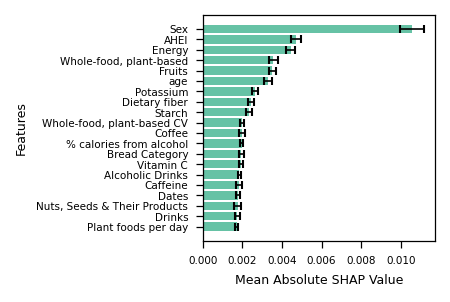

In [ ]:
shap_data = process_mean_abs_shap(
    mean_abs_shap_df = mean_abs_shap_lgbm_abundance, 
    all_features = all_features, 
    top_n = 20
    )

# shap_data.sort_values(by='Mean Absolute SHAP Value', ascending=False)

In [ ]:
# # Mean abs shap test: top 50 predicted microbes
# shap_data = process_mean_abs_shap(
#     mean_abs_shap_df = mean_abs_shap_lgbm_abundance.loc[:, list(map_df["index"].head(50).astype(str))], 
#     all_features = all_features, 
#     top_n = 20
#     )

# # shap_data.sort_values(by='Mean Absolute SHAP Value', ascending=False)

In [ ]:
# # Mean abs shap test: bottom 50 predicted microbes
# shap_data = process_mean_abs_shap(
#     mean_abs_shap_df = mean_abs_shap_lgbm_abundance.loc[:, list(map_df.tail(50)["index"].astype(str))], 
#     all_features = all_features, 
#     top_n = 20,
#     # significant_targets_indices = significant_targets_indices
#     )

# # shap_data.sort_values(by='Mean Absolute SHAP Value', ascending=False)

In [ ]:
# signed_mean_shap_lgbm_abundance = np.sign(mean_shap_lgbm_abundance)
# signed_mean_shap_lgbm_abundance

In [ ]:
def process_mean_signed_shap(mean_abs_shap_df, correlation_matrix, all_features, top_n=20):
    # Mean across microbes for each feature -> bar heights (unsigned)
    mean_abs_shap_df['mean_abs_shap'] = mean_abs_shap_df.mean(axis=1)

    # SEM across microbes for each feature -> error bars
    k = mean_abs_shap_df.shape[1] - 1  # exclude the new column
    sem_across = mean_abs_shap_df.drop(columns=['mean_abs_shap']).std(axis=1, ddof=1) / np.sqrt(k)

    # Signed direction from average correlation across microbes
    correlation_matrix['mean_corr'] = correlation_matrix.mean(axis=1)
    direction = np.sign(correlation_matrix['mean_corr']).reset_index(drop=True)

    # Directional mean absolute SHAP
    directional_abs_shap = mean_abs_shap_df['mean_abs_shap'] * direction

    # Full feature names
    feature_names = pd.Series(all_features)

    # Prepare full table (include SEM for convenience)
    shap_data_all = pd.DataFrame({
        'Feature': feature_names,
        'Directional Mean Absolute SHAP Value': directional_abs_shap.values,
        'SEM': sem_across.values
    })

    # Select top and bottom for plotting
    top_features = directional_abs_shap.sort_values(ascending=False).head(top_n)
    bottom_features = directional_abs_shap.sort_values(ascending=True).head(top_n)
    combined = pd.concat([top_features, bottom_features])

    # Plotting data
    shap_data_plot = shap_data_all.loc[combined.index]
    shap_data_plot = shap_data_plot.sort_values(by='Directional Mean Absolute SHAP Value')

    # Colors
    colors = ['cadetblue' if val > 0 else 'salmon'
              for val in shap_data_plot['Directional Mean Absolute SHAP Value']]

    # Plot with SEM error bars (symmetric around the signed mean)
    plt.figure(figsize=(8, 8), dpi=300)
    plt.barh(
        shap_data_plot['Feature'],
        shap_data_plot['Directional Mean Absolute SHAP Value'],
        xerr=shap_data_plot['SEM'],
        color=colors,
        edgecolor='none',
        error_kw=dict(capsize=3, lw=0.8, ecolor='black')
    )
    plt.xlabel('Signed Mean Absolute SHAP Value', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.title('Top and Bottom Features by Directional SHAP Value', fontsize=16)
    
    plt.show()

    return shap_data_all


/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


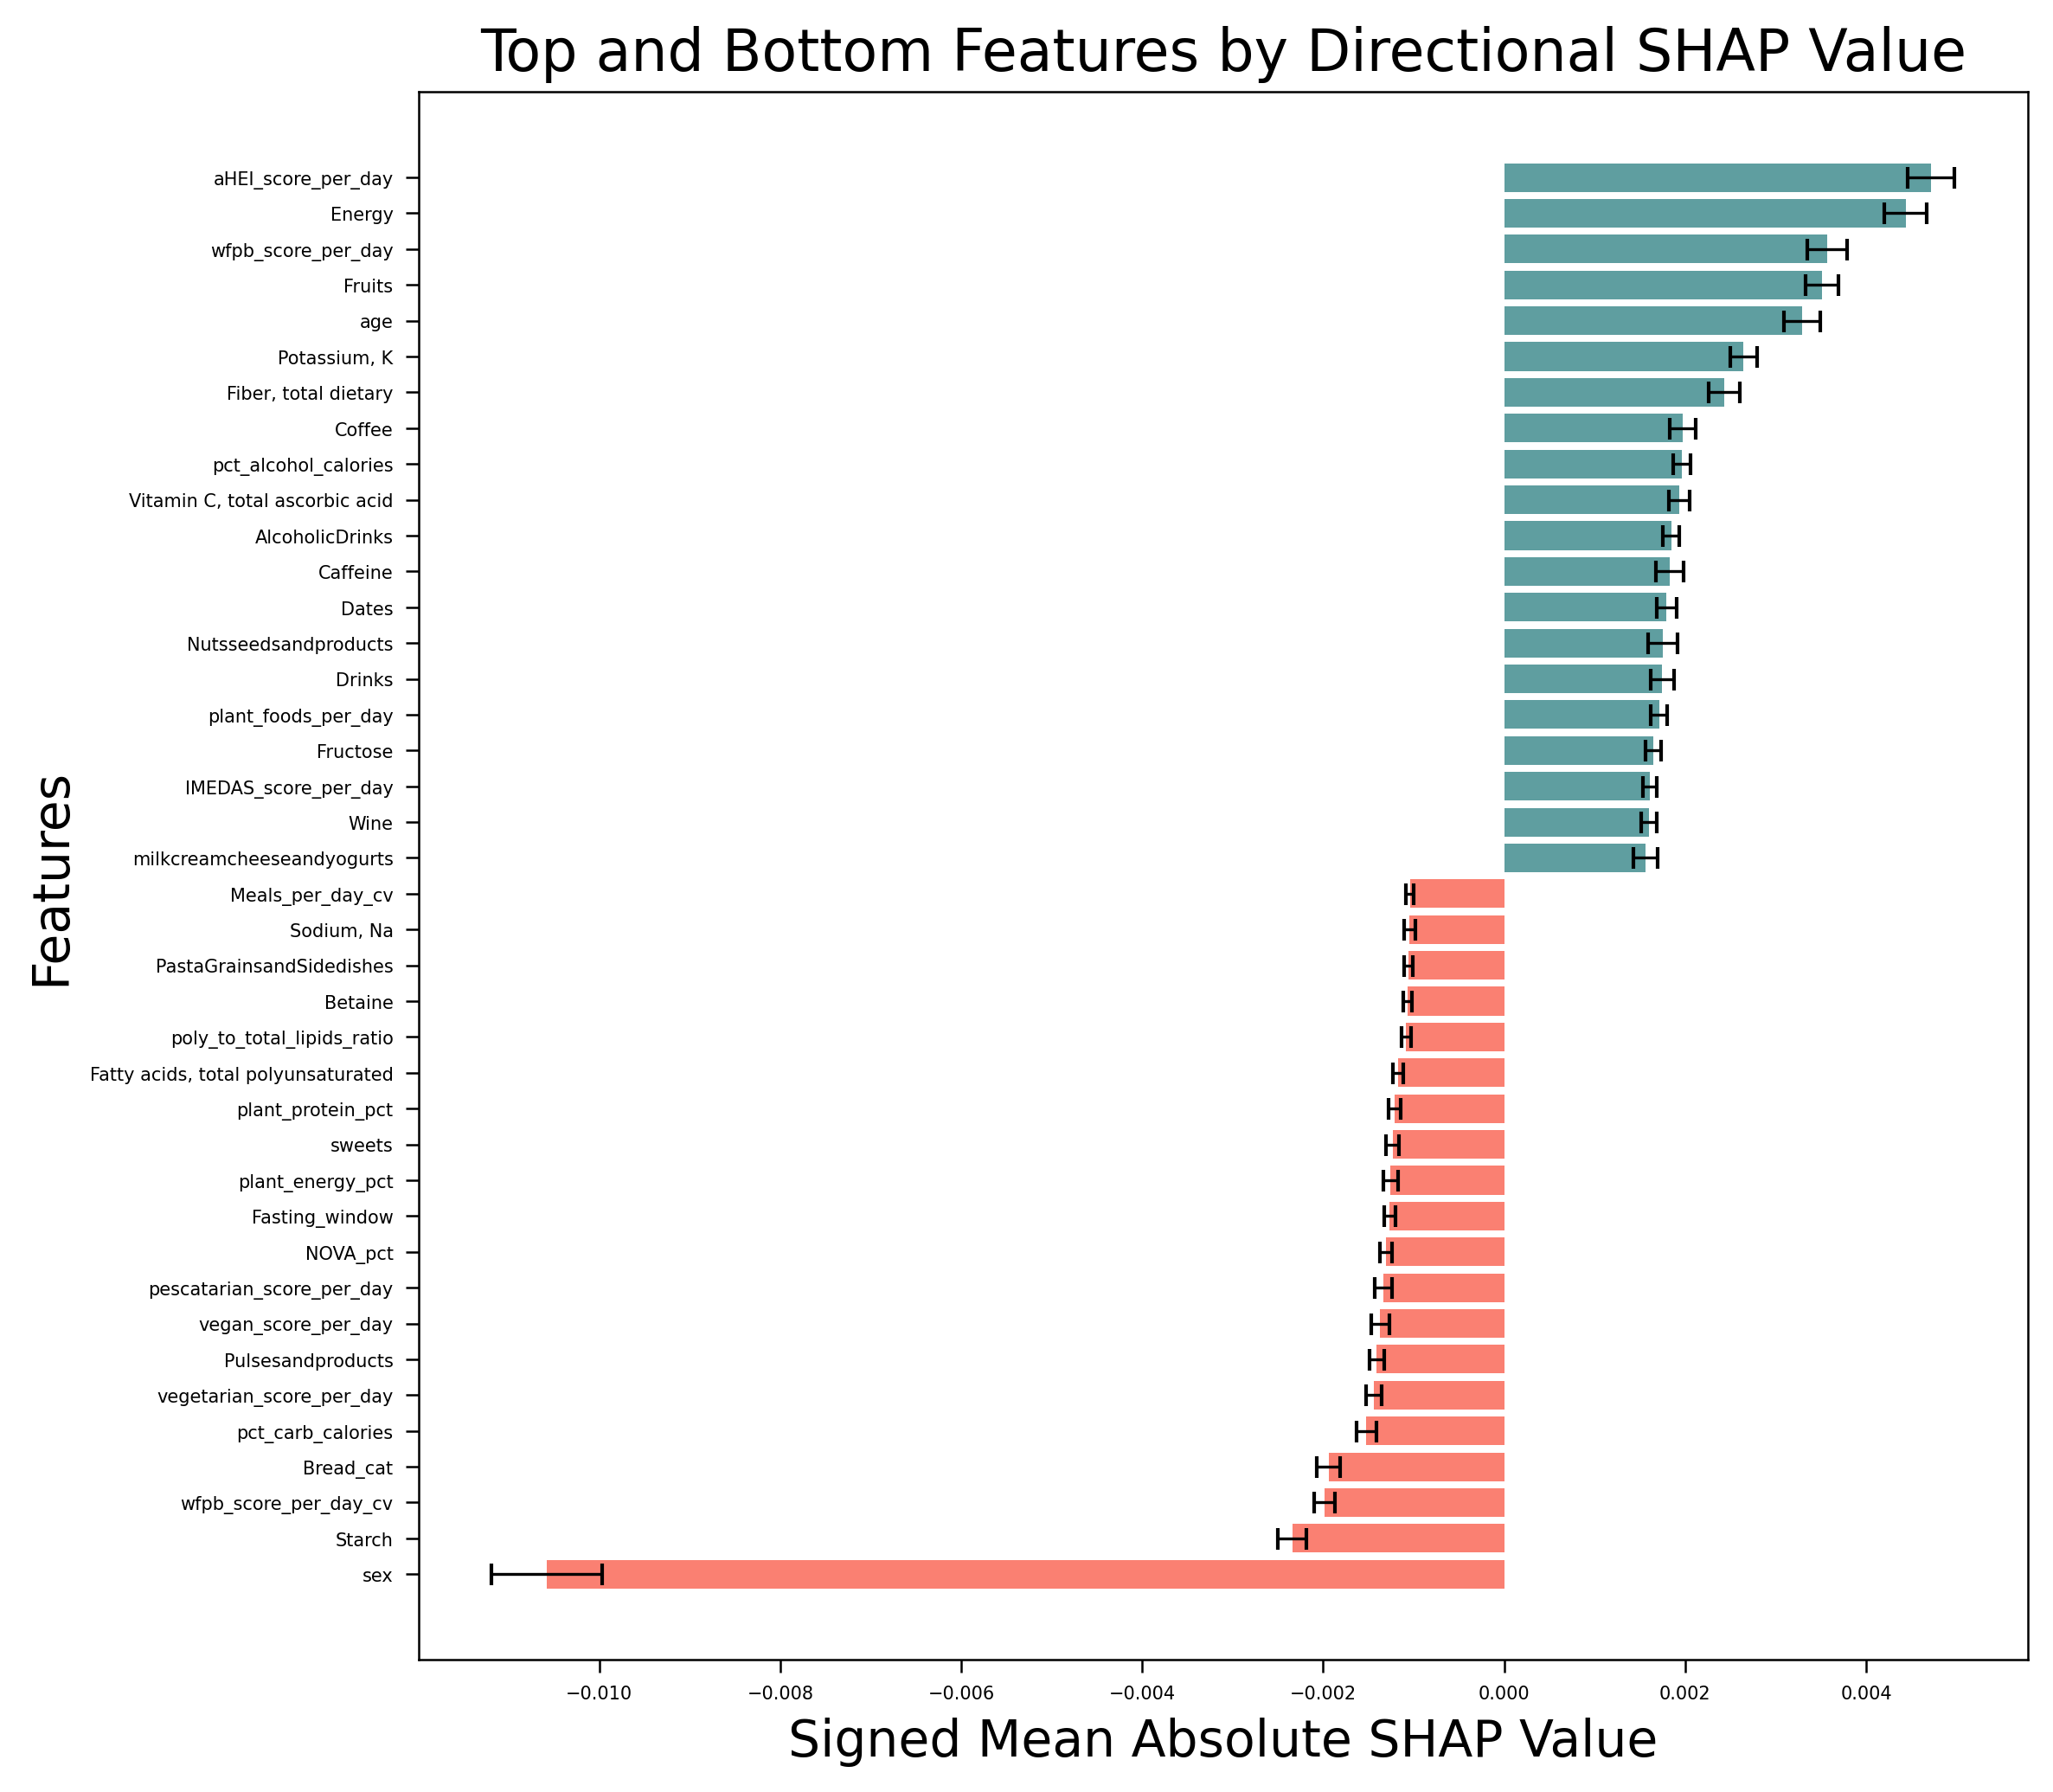

,Feature,Directional Mean Absolute SHAP Value,SEM
0,Acorn squash,0.000097,0.000010
1,Alfalfa sprouts,0.000046,0.000004
2,Almond Beverage,0.000218,0.000017
3,Almond flour,0.000073,0.000008
4,Almond spread,0.000159,0.000017
...,...,...,...
695,sweetmilkproducts,0.000334,0.000048
696,sweets,-0.001231,0.000072
697,age,0.003292,0.000200
698,sex,-0.010581,0.000610


In [ ]:
shap_data_all = process_mean_signed_shap(mean_abs_shap_lgbm_abundance, correlation_matrix, all_features, top_n=20)
shap_data_all

In [ ]:
# Save directional shap for diet intervention model

# shap_data_all = shap_data_all[~shap_data_all['Feature'].isin(['age', 'sex'])]
# shap_data_all.to_pickle('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_intervention/directional_diet_shap.pkl')
# shap_data_all

In [ ]:
# mean_abs_shap_ridge_div

In [ ]:
# def mean_shap_over_features(mean_abs_shap):
#     mean_abs_shap_lgbm_abundance['mean_abs_shap'] = mean_abs_shap_lgbm_abundance.mean(axis=1)

In [ ]:
# mean_abs_shap_lgbm_abundance['mean_abs_shap'] = mean_abs_shap_lgbm_abundance.mean(axis=1)
# mean_abs_shap_lgbm_abundance['mean_abs_shap']

In [ ]:
# # mean_abs_shap_lgbm_abundance['mean_abs_shap'].sort_values(ascending=False)[mean_abs_shap_lgbm_abundance['mean_abs_shap'] > 0.001]
# mean_abs_shap_lgbm_abundance['mean_abs_shap'].sort_values(ascending=False).head(20)

In [ ]:
# # top_shap_all_mic = mean_abs_shap_lgbm_abundance['mean_abs_shap'].sort_values(ascending=False)[mean_abs_shap_lgbm_abundance['mean_abs_shap'] > 0.001].index
# top_shap_all_mic = mean_abs_shap_lgbm_abundance['mean_abs_shap'].sort_values(ascending=False).head(20).index
# top_shap_all_mic

In [ ]:
# top_fnames_shap_all_mic = pd.Series(all_features).loc[top_shap_all_mic]
# # print(pd.concat([top_fnames_shap_all_mic, mean_abs_shap_lgbm_abundance['mean_abs_shap'].sort_values(ascending=False)[mean_abs_shap_lgbm_abundance['mean_abs_shap'] > 0.001]], axis=1))
# print(pd.concat([top_fnames_shap_all_mic, mean_abs_shap_lgbm_abundance['mean_abs_shap'].sort_values(ascending=False).head(20)], axis=1))

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming the data is provided as described
# # Combining the feature names with their SHAP values
# shap_data = pd.concat([top_fnames_shap_all_mic, mean_abs_shap_lgbm_abundance['mean_abs_shap'].sort_values(ascending=False).head(20)], axis=1)

# # Rename columns for clarity
# shap_data.columns = ['Feature', 'Mean Absolute SHAP Value']

# # Sort values by SHAP for better visual clarity
# shap_data = shap_data.sort_values(by='Mean Absolute SHAP Value', ascending=True)

# # Create a horizontal bar chart
# plt.figure(figsize=(8, 6))
# plt.barh(shap_data['Feature'], shap_data['Mean Absolute SHAP Value'], color='cadetblue', edgecolor='none')

# # Add labels and title
# plt.xlabel('Mean Absolute SHAP Value', fontsize=14)
# plt.ylabel('Features', fontsize=14)
# # plt.title('Top Features by Mean Absolute SHAP Value', fontsize=14)

# # Improve layout
# 
# # plt.savefig(home_path + f"figures/{PROBLEM}/mean_abs_shap.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')

# # Show the plot
# plt.show()


In [ ]:
# mean_abs_shap_ridge_mic['mean_abs_shap'] = mean_abs_shap_ridge_mic.mean(axis=1)
# mean_abs_shap_ridge_mic['mean_abs_shap']

In [ ]:
# mean_abs_shap_ridge_mic['mean_abs_shap'].sort_values(ascending=False)[0:23]

In [ ]:
# top_shap_all_mic = mean_abs_shap_ridge_mic['mean_abs_shap'].sort_values(ascending=False)[0:23].index
# top_shap_all_mic

In [ ]:
# top_fnames_shap_all_mic = pd.Series(all_features).loc[top_shap_all_mic]
# top_fnames_shap_all_mic

#### Are there foods that especially impact certain microbes?

In [ ]:
mean_abs_shap_lgbm_abundance['max'] = mean_abs_shap_lgbm_abundance.max(axis=1)
mean_abs_shap_lgbm_abundance['max_microbe'] = mean_abs_shap_lgbm_abundance.idxmax(axis=1)
mean_abs_shap_lgbm_abundance

/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,3,4,5,6,7,9,10,11,...,717,718,719,720,721,722,723,mean_abs_shap,max,max_microbe
0,0.000007,0.000007,0.000031,0.000131,0.000016,0.000337,0.000000,0.000007,0.001650,0.000051,...,0.000039,0.000000,0.000000,0.000000,0.000157,0.000017,0.000000,0.000097,0.003522,448
1,0.000071,0.000016,0.000054,0.000046,0.000024,0.000000,0.000018,0.000097,0.000000,0.000003,...,0.000021,0.000223,0.000000,0.000000,0.000000,0.000018,0.000000,0.000046,0.001192,664
2,0.000360,0.000000,0.000031,0.000161,0.000752,0.000014,0.000038,0.000107,0.000467,0.000147,...,0.000029,0.000481,0.000153,0.000013,0.001172,0.000389,0.000322,0.000218,0.003215,269
3,0.000158,0.000000,0.000000,0.000000,0.000021,0.000000,0.000005,0.000022,0.000000,0.000016,...,0.000585,0.000026,0.000101,0.000000,0.000000,0.000032,0.000000,0.000073,0.001950,332
4,0.000020,0.000000,0.000000,0.000004,0.000107,0.000014,0.000028,0.000055,0.000794,0.000000,...,0.000110,0.000030,0.000137,0.000000,0.000094,0.000013,0.000000,0.000159,0.004658,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000402,0.000178,0.000174,0.000469,0.000113,0.001995,0.000250,0.000965,0.000170,0.000104,...,0.000148,0.000074,0.000150,0.000247,0.000081,0.000150,0.000068,0.000334,0.030206,46
696,0.000421,0.001009,0.000665,0.000460,0.000843,0.001028,0.001824,0.001686,0.001293,0.000652,...,0.002033,0.005783,0.000336,0.000594,0.000722,0.000173,0.001049,0.001231,0.021256,443
697,0.003380,0.010083,0.017522,0.003861,0.000958,0.006327,0.006545,0.013022,0.000856,0.001152,...,0.002013,0.000813,0.000584,0.000918,0.000388,0.000917,0.000210,0.003292,0.047019,28
698,0.000208,0.000063,0.029013,0.003368,0.006677,0.003824,0.024507,0.044985,0.011485,0.000027,...,0.000138,0.000074,0.000843,0.000039,0.005119,0.003938,0.000108,0.010581,0.085339,507


In [ ]:
max_microbes = mean_abs_shap_lgbm_abundance[mean_abs_shap_lgbm_abundance['max'] > 0.02]
features_of_max_microbes = max_microbes.index
max_microbes

,0,1,3,4,5,6,7,9,10,11,...,717,718,719,720,721,722,723,mean_abs_shap,max,max_microbe
5,0.000303,0.000219,0.000209,0.001329,0.001434,0.000140,0.000392,0.002503,0.000168,0.000517,...,0.004651,0.001139,0.000168,0.000238,0.000091,0.000287,0.000158,0.000846,0.030000,332
16,0.000421,0.000322,0.001258,0.000232,0.000421,0.000146,0.000186,0.002581,0.000166,0.000140,...,0.000728,0.001821,0.000122,0.000118,0.000166,0.002163,0.000620,0.000912,0.033866,203
24,0.000530,0.000118,0.002081,0.000877,0.001412,0.000277,0.000166,0.000462,0.000869,0.000690,...,0.000135,0.000277,0.000565,0.000286,0.000183,0.000451,0.000413,0.001495,0.082577,76
130,0.000857,0.001591,0.000242,0.000584,0.000967,0.001329,0.001317,0.000568,0.001145,0.005348,...,0.000812,0.001537,0.000180,0.004280,0.000829,0.000389,0.002445,0.001976,0.044303,594
152,0.000992,0.000077,0.000420,0.000195,0.000106,0.000098,0.000326,0.000130,0.000145,0.000194,...,0.001312,0.000497,0.004337,0.000129,0.000307,0.000829,0.000131,0.000663,0.030031,53
167,0.000977,0.000214,0.000542,0.000629,0.000131,0.000652,0.000247,0.002073,0.000852,0.000152,...,0.001243,0.004338,0.000086,0.000086,0.001332,0.000409,0.000140,0.001102,0.025332,443
169,0.000231,0.000732,0.000463,0.000175,0.000491,0.000494,0.000465,0.000614,0.000349,0.000099,...,0.003616,0.000097,0.000516,0.000159,0.000132,0.000211,0.000134,0.001794,0.024299,605
303,0.000103,0.000035,0.000077,0.000091,0.000070,0.000056,0.000181,0.000292,0.000068,0.000199,...,0.000072,0.000060,0.000068,0.000004,0.000090,0.000127,0.000066,0.000786,0.020803,203
319,0.000122,0.000218,0.001569,0.000806,0.000198,0.000521,0.000396,0.000871,0.001167,0.000289,...,0.003330,0.000670,0.000133,0.000296,0.000077,0.000709,0.000160,0.001176,0.045137,30
336,0.000836,0.000322,0.000198,0.003513,0.000287,0.001078,0.000837,0.000224,0.000125,0.001074,...,0.000249,0.000431,0.000267,0.000304,0.000099,0.000157,0.000153,0.001055,0.092121,46


In [ ]:
fnames_of_max_microbes = pd.Series(all_features).loc[features_of_max_microbes]
fnames_of_max_microbes

5                                 Almonds
16                                Avocado
24                                 Banana
130                                Coffee
152                        Cottage cheese
167                        Dark Chocolate
169                                 Dates
303                              Mandarin
319                                  Milk
336                        Natural Yogurt
486                                 Sushi
538                               Walnuts
539                            Watermelon
545                          White Cheese
550                       Wholemeal Bread
556                                  Wine
561                                Yogurt
570                                Energy
572                  Fiber, total dietary
573                           Calcium, Ca
577                          Potassium, K
578                            Sodium, Na
580                            Copper, Cu
581        Vitamin C, total ascorb

In [ ]:
# specific_mic_dict = {}
# for f_index in features_of_max_microbes:
#     mic_index = max_microbes.loc[f_index, "max_microbe"]
#     print(mic_index)
#     specific_mic_dict[fnames_of_max_microbes[f_index]] = map_df.loc[int(mic_index)]["Microbe_Name"]
#     print(map_df.loc[int(mic_index)]["Microbe_Name"])
# specific_mic_dict


#### Predominant diet feature across microbes

In [ ]:
# transpose so rows are microbes and cols are features?
# for each microbe, rank the features abs shap from 1 (highest) to 745 (lowest).
# For each feature, sum its rank across the microbes.
# Return the features with the lowest sum of rank.

In [ ]:
mean_abs_shap_lgbm_abundance.drop(["max", "max_microbe", "mean_abs_shap"], axis=1, inplace=True)
mean_abs_shap_lgbm_abundance

/home/tomerse/.local/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,0,1,3,4,5,6,7,9,10,11,...,713,715,716,717,718,719,720,721,722,723
0,0.000007,0.000007,0.000031,0.000131,0.000016,0.000337,0.000000,0.000007,0.001650,0.000051,...,0.000007,0.000016,0.000000,0.000039,0.000000,0.000000,0.000000,0.000157,0.000017,0.000000
1,0.000071,0.000016,0.000054,0.000046,0.000024,0.000000,0.000018,0.000097,0.000000,0.000003,...,0.000020,0.000007,0.000106,0.000021,0.000223,0.000000,0.000000,0.000000,0.000018,0.000000
2,0.000360,0.000000,0.000031,0.000161,0.000752,0.000014,0.000038,0.000107,0.000467,0.000147,...,0.000483,0.000845,0.000285,0.000029,0.000481,0.000153,0.000013,0.001172,0.000389,0.000322
3,0.000158,0.000000,0.000000,0.000000,0.000021,0.000000,0.000005,0.000022,0.000000,0.000016,...,0.000000,0.000000,0.000010,0.000585,0.000026,0.000101,0.000000,0.000000,0.000032,0.000000
4,0.000020,0.000000,0.000000,0.000004,0.000107,0.000014,0.000028,0.000055,0.000794,0.000000,...,0.000093,0.000026,0.000032,0.000110,0.000030,0.000137,0.000000,0.000094,0.000013,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000402,0.000178,0.000174,0.000469,0.000113,0.001995,0.000250,0.000965,0.000170,0.000104,...,0.001293,0.000436,0.000258,0.000148,0.000074,0.000150,0.000247,0.000081,0.000150,0.000068
696,0.000421,0.001009,0.000665,0.000460,0.000843,0.001028,0.001824,0.001686,0.001293,0.000652,...,0.002112,0.000195,0.003634,0.002033,0.005783,0.000336,0.000594,0.000722,0.000173,0.001049
697,0.003380,0.010083,0.017522,0.003861,0.000958,0.006327,0.006545,0.013022,0.000856,0.001152,...,0.000559,0.001344,0.007692,0.002013,0.000813,0.000584,0.000918,0.000388,0.000917,0.000210
698,0.000208,0.000063,0.029013,0.003368,0.006677,0.003824,0.024507,0.044985,0.011485,0.000027,...,0.054918,0.000569,0.045005,0.000138,0.000074,0.000843,0.000039,0.005119,0.003938,0.000108


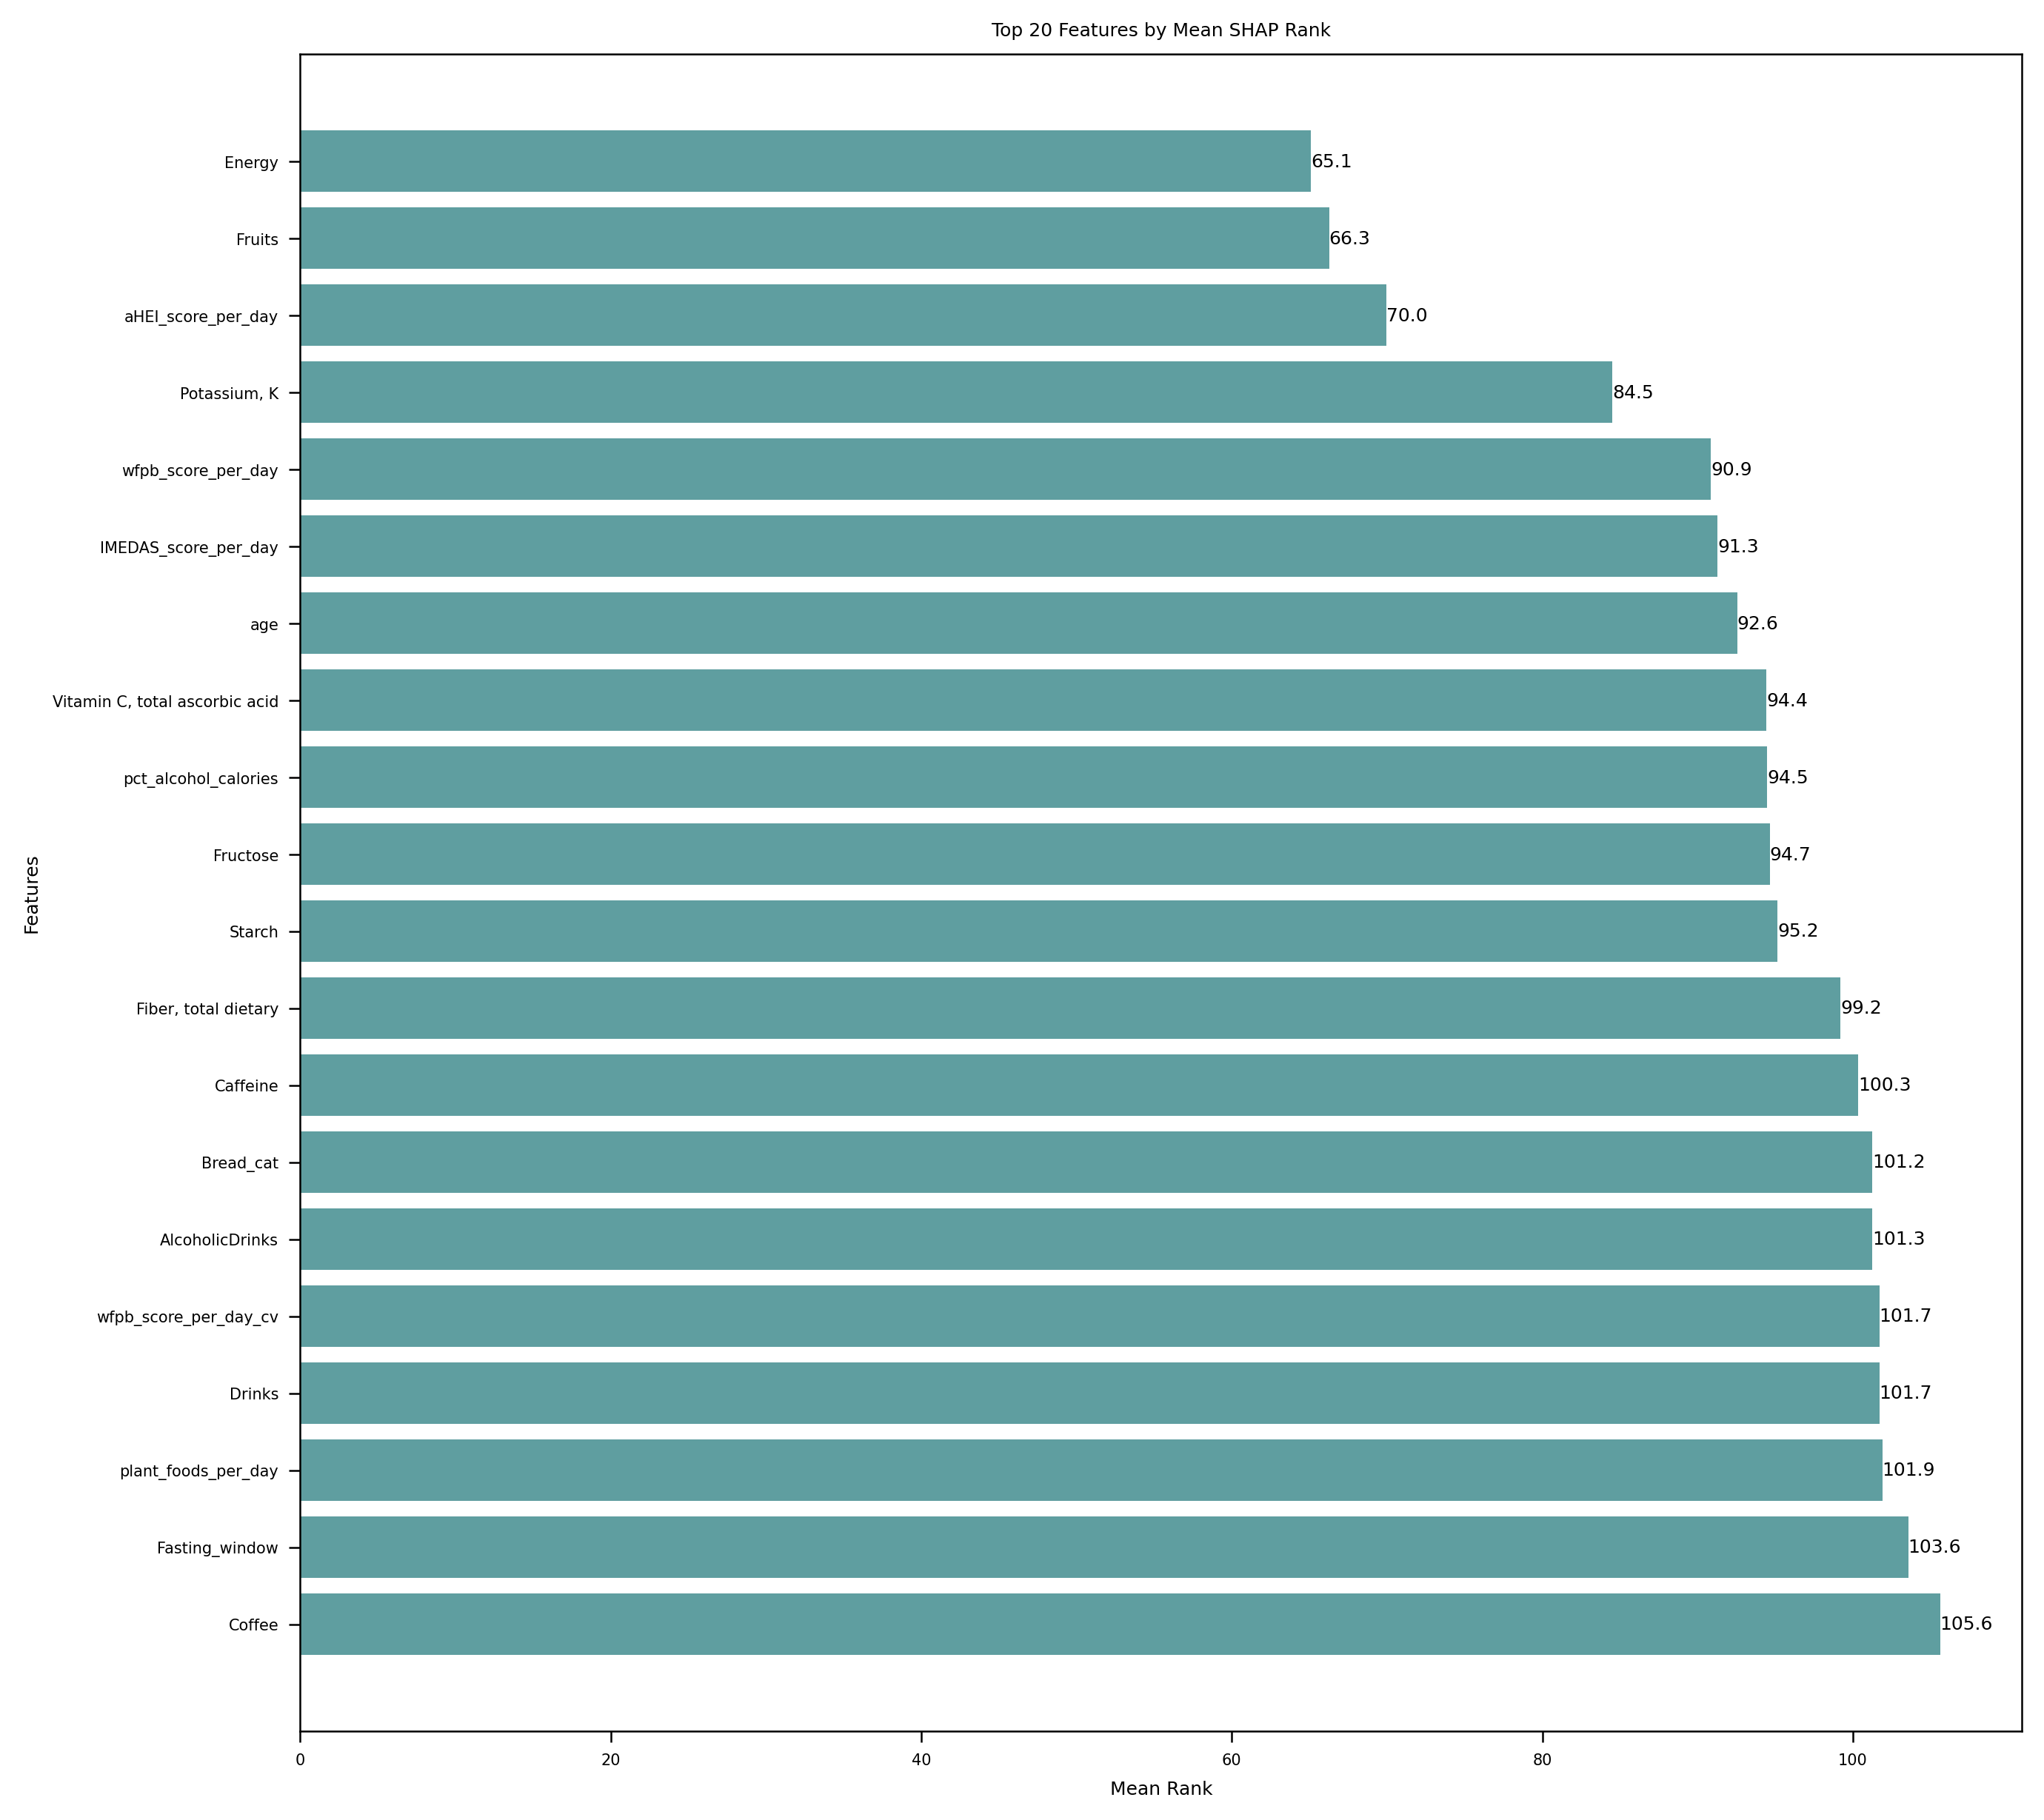

In [ ]:
def analyze_shap_ranks(df, all_features, top_n=20):
    """
    Analyze mean absolute SHAP values and create rank visualization.
    
    Parameters:
    df (pd.DataFrame): DataFrame with features as rows and targets as columns
    all_features (pd.Series): Series containing feature names
    top_n (int): Number of top features to display
    
    Returns:
    tuple: (mean_ranks DataFrame, figure)
    """
    # Calculate ranks for each target (column)
    # Higher SHAP values should have lower ranks (rank 1 is highest)
    ranks = df.rank(ascending=False)
    
    # Calculate mean rank across all targets for each feature
    mean_ranks = ranks.mean(axis=1)
    
    # Get top N features by mean rank
    top_features = mean_ranks.sort_values().head(top_n)
    
    # Get actual feature names
    feature_names = pd.Series(all_features).loc[top_features.index]
    
    # Sort features by rank (highest to lowest)
    sorted_indices = np.argsort(top_features.values)[::-1]
    sorted_features = feature_names.iloc[sorted_indices]
    sorted_values = top_features.values[sorted_indices]
    
    # Create visualization
    plt.figure(figsize=(10, 10), dpi=300)
    
    # Create horizontal bar plot with sorted values
    bars = plt.barh(
        y=np.arange(len(sorted_features)),
        width=sorted_values,
        color='cadetblue',
        edgecolor=None
    )
    
    # Customize the plot
    plt.ylabel('Features')
    plt.xlabel('Mean Rank')
    plt.title(f'Top {top_n} Features by Mean SHAP Rank')
    
    # Add feature names as y-tick labels
    plt.yticks(np.arange(len(sorted_features)), sorted_features)
    
    # Add value labels on the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}',
                ha='left', va='center')
    
    # Adjust layout to prevent label cutoff
    
    
    # Create summary DataFrame with actual feature names
    summary_df = pd.DataFrame({
        'Feature': feature_names,
        'Mean_Rank': top_features.values,
        'Std_Rank': ranks.loc[top_features.index].std(axis=1),
        'Min_Rank': ranks.loc[top_features.index].min(axis=1),
        'Max_Rank': ranks.loc[top_features.index].max(axis=1)
    })
    
    # Sort summary DataFrame to match plot order
    summary_df = summary_df.iloc[sorted_indices]

    # Save the figure
    # plt.savefig(home_path + f"figures/{PROBLEM}/mean_shap_ranks{aggregation}.png", 
    #             dpi=300, facecolor="white", transparent=False, bbox_inches='tight')

    # Show the plot
    plt.show()
    
    return summary_df

summary_df = analyze_shap_ranks(mean_abs_shap_lgbm_abundance, all_features, top_n=20)

#### What are the SHAP values for the highly correlated microbes?

Summary plots are done in "SHAP_summary_plot.py"

In [ ]:
# for microbe_index in top_microbes.index:
#     top_coefs = mean_abs_shap_lgbm_abundance.iloc[:,microbe_index].sort_values(ascending=False)[0:20]
#     top_fnames = pd.Series(lgbm_diet_fnames[0]).loc[top_coefs.index]
#     to_plot = pd.DataFrame(top_coefs).set_index(top_fnames)
#     to_plot.columns = ['']
#     print(to_plot)
#     to_plot.plot.barh()
#     plt.title("What dietary features predict the highly correlated microbes?")
#     plt.legend().remove()
#     # plt.xticks(rotation=90)
#     plt.savefig("top_microbes_features_freq.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
#     plt.show()
#     plt.clf()

### Microbes with one extreme feature
The first shap value is at least twice the second shap value.

In [ ]:
mean_abs_shap_lgbm_abundance

,0,1,3,4,5,6,7,9,10,11,...,713,715,716,717,718,719,720,721,722,723
0,0.000007,0.000007,0.000031,0.000131,0.000016,0.000337,0.000000,0.000007,0.001650,0.000051,...,0.000007,0.000016,0.000000,0.000039,0.000000,0.000000,0.000000,0.000157,0.000017,0.000000
1,0.000071,0.000016,0.000054,0.000046,0.000024,0.000000,0.000018,0.000097,0.000000,0.000003,...,0.000020,0.000007,0.000106,0.000021,0.000223,0.000000,0.000000,0.000000,0.000018,0.000000
2,0.000360,0.000000,0.000031,0.000161,0.000752,0.000014,0.000038,0.000107,0.000467,0.000147,...,0.000483,0.000845,0.000285,0.000029,0.000481,0.000153,0.000013,0.001172,0.000389,0.000322
3,0.000158,0.000000,0.000000,0.000000,0.000021,0.000000,0.000005,0.000022,0.000000,0.000016,...,0.000000,0.000000,0.000010,0.000585,0.000026,0.000101,0.000000,0.000000,0.000032,0.000000
4,0.000020,0.000000,0.000000,0.000004,0.000107,0.000014,0.000028,0.000055,0.000794,0.000000,...,0.000093,0.000026,0.000032,0.000110,0.000030,0.000137,0.000000,0.000094,0.000013,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000402,0.000178,0.000174,0.000469,0.000113,0.001995,0.000250,0.000965,0.000170,0.000104,...,0.001293,0.000436,0.000258,0.000148,0.000074,0.000150,0.000247,0.000081,0.000150,0.000068
696,0.000421,0.001009,0.000665,0.000460,0.000843,0.001028,0.001824,0.001686,0.001293,0.000652,...,0.002112,0.000195,0.003634,0.002033,0.005783,0.000336,0.000594,0.000722,0.000173,0.001049
697,0.003380,0.010083,0.017522,0.003861,0.000958,0.006327,0.006545,0.013022,0.000856,0.001152,...,0.000559,0.001344,0.007692,0.002013,0.000813,0.000584,0.000918,0.000388,0.000917,0.000210
698,0.000208,0.000063,0.029013,0.003368,0.006677,0.003824,0.024507,0.044985,0.011485,0.000027,...,0.054918,0.000569,0.045005,0.000138,0.000074,0.000843,0.000039,0.005119,0.003938,0.000108


In [ ]:
mean_abs_shap_lgbm_abundance_transposed = mean_abs_shap_lgbm_abundance.transpose()

def first_second_ratio(row):
    sorted_row = row.sort_values(ascending=False)
    return sorted_row.iloc[0] >= 10 * sorted_row.iloc[1]

mic_with_extreme_feature = mean_abs_shap_lgbm_abundance_transposed[mean_abs_shap_lgbm_abundance_transposed.apply(first_second_ratio, axis=1)]
mic_with_extreme_feature


,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699


In [ ]:
if SPECIES == "segal_species":
    print(mic_with_extreme_feature.iloc[:, 99])
    print("The extreme mean shap value:", mic_with_extreme_feature.max(axis=1))
    print("The extreme feature index:", mic_with_extreme_feature.idxmax(axis=1))
    print("The extreme feature:", pd.Series(all_features).loc[mic_with_extreme_feature.idxmax(axis=1)])
    print("The microbe:", mb_names.loc[significant_targets[99], 'species_new'])

Series([], Name: 99, dtype: float64)
The extreme mean shap value: Series([], dtype: float64)
The extreme feature index: Series([], dtype: float64)
The extreme feature: Series([], dtype: object)
The microbe: CAG-269 sp905213875


### Mean abs shap plot for a specific feature

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def plot_species_mean_abs_shap(species, title=None, directional=False):
    plt.style.use(third_style)
    if title is None:
        title = species

    # --- resolve species_index (exact or .str.contains) ---
    if isinstance(species, (int, np.integer)):
        species_idx = int(species)
        species_rows = map_df.loc[map_df["index"] == species_idx]
    else:
        species_rows = map_df[map_df["Microbe_Name"] == species]
        if species_rows.empty:
            species_rows = map_df[map_df["Microbe_Name"].str.contains(str(species), na=False)]
        if species_rows.empty:
            raise ValueError(f"Species '{species}' not found in map_df['Microbe_Name'] or as index.")
        species_idx = int(species_rows.iloc[0]["index"])

    # print resolved names
    for _, row in species_rows.iterrows():
        print(row["Microbe_Name"])

    # optional: show diet score row if exists
    if species_idx in lgbm_diet_scores.index:
        print(lgbm_diet_scores.loc[[species_idx]])

    # --- single species SHAP vector ---
    col_key = str(species_idx)
    if col_key not in mean_abs_shap_lgbm_abundance.columns:
        raise KeyError(f"Column '{col_key}' not found in mean_abs_shap_lgbm_abundance.")
    shap_vec = mean_abs_shap_lgbm_abundance[col_key].copy()

    # helper for pretty labels
    def pretty_labels(index_like):
        idx = pd.Index(index_like)
        def _to_int_if_possible(x):
            try:
                return int(x)
            except (ValueError, TypeError):
                return x
        idx_int = idx.map(_to_int_if_possible)

        base_names = pd.Series(all_features)
        mapped = base_names.reindex(idx_int)
        pretty = [diet_rename_dict.get(str(name), diet_rename_dict.get(name, str(name))) for name in mapped.values]
        return pretty

    if directional:
        if col_key not in correlation_matrix.columns:
            raise KeyError(f"Column '{col_key}' not found in correlation_matrix for directional mode.")
        direction = np.sign(correlation_matrix[col_key]).reindex(shap_vec.index).fillna(0)
        directional_abs = shap_vec * direction

        # top 20 by absolute value
        top_n = 20
        top_idx = directional_abs.abs().sort_values(ascending=False).head(top_n).index
        combined = directional_abs.loc[top_idx].sort_values()

        labels = pretty_labels(combined.index)

        # use coolwarm colormap
        norm = mcolors.Normalize(vmin=-abs(combined).max(), vmax=abs(combined).max())
        cmap = cm.get_cmap("coolwarm")
        colors = [cmap(norm(val)) for val in combined.values]

        plt.figure()
        plt.barh(labels, combined.values, color=colors, edgecolor='none')
        plt.axvline(0, color="black", linewidth=0.6)
        plt.xlabel('Signed Mean Absolute SHAP')
        plt.ylabel('Features')
        plt.title(title)
        plt.savefig(home_path + f"SHAP_plots/{PROBLEM}/{SPECIES}/pretty/{species}_summary_plot.png",
            dpi=400, facecolor='white', transparent=False, bbox_inches='tight')
        plt.savefig(home_path + f"SHAP_plots/{PROBLEM}/{SPECIES}/pretty/{species}_summary_plot.pdf",
                dpi=400, facecolor='white', transparent=False, bbox_inches='tight', format='pdf')
        plt.show()

    else:
        # top 20 by absolute shap only
        top_n = 20
        top_idx = shap_vec.abs().sort_values(ascending=False).head(top_n).index
        vals = shap_vec.loc[top_idx].sort_values()
        labels = pretty_labels(vals.index)

        plt.figure()
        plt.barh(labels, vals.values, color='cadetblue', edgecolor='none')
        plt.xlabel('Mean Absolute SHAP Value')
        plt.ylabel('Features')
        plt.title(title)
        plt.savefig(home_path + f"SHAP_plots/{PROBLEM}/{SPECIES}/pretty/{species}_summary_plot.png",
            dpi=400, facecolor='white', transparent=False, bbox_inches='tight')
        plt.savefig(home_path + f"SHAP_plots/{PROBLEM}/{SPECIES}/pretty/{species}_summary_plot.pdf",
                dpi=400, facecolor='white', transparent=False, bbox_inches='tight', format='pdf')
        plt.show()


Streptococcus thermophilus
46    0.423344
Name: 0, dtype: float64


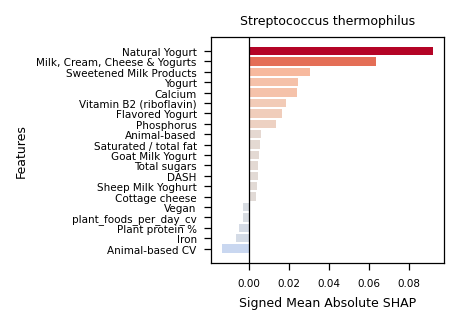

In [ ]:
plot_species_mean_abs_shap("Streptococcus thermophilus", title=None, directional=True)

In [ ]:
map_df.head(15)

,index,Microbe_Name,Pearson Correlation,targets,prevalence_count,prevalence_pct
index,,,,,,
594,594,Lawsonibacter asaccharolyticus,0.426409,fBin__541|gBin__2135|sBin__3290,8631,85.73
46,46,Streptococcus thermophilus,0.423344,fBin__187|gBin__748|sBin__1116,3937,39.10
223,223,UBA11774 sp003507655,0.376008,fBin__367|gBin__1458|sBin__2166,7312,72.63
34,34,Bifidobacterium longum,0.361910,fBin__121|gBin__572|sBin__848,7194,71.45
221,221,Pararoseburia lenta,0.324238,fBin__367|gBin__1456|sBin__2163,3801,37.75
507,507,Ruthenibacterium lactatiformans,0.319985,fBin__536|gBin__2029|sBin__3098,7789,77.36
32,32,Bifidobacterium adolescentis,0.312853,fBin__121|gBin__568|sBin__842,6038,59.97
586,586,Flavonifractor plautii,0.306736,fBin__541|gBin__2125|sBin__3275,6358,63.15
309,309,Blautia_A sp000436615,0.306629,fBin__376|gBin__1557|sBin__2330,4199,41.71


Lawsonibacter asaccharolyticus
594    0.426409
Name: 0, dtype: float64


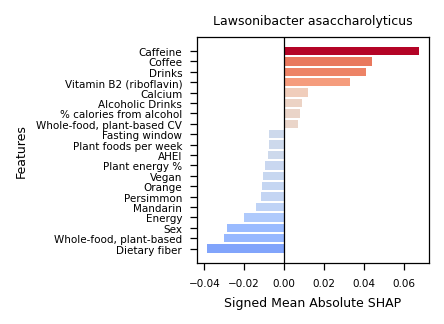

In [ ]:
plot_species_mean_abs_shap("Lawsonibacter asaccharolyticus", title=None, directional=True)

Bifidobacterium longum
34    0.36191
Name: 0, dtype: float64


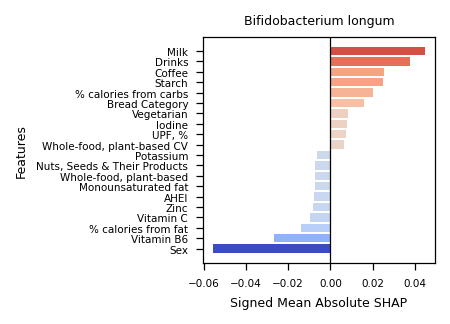

In [ ]:
plot_species_mean_abs_shap("Bifidobacterium longum", title=None, directional=True)

Bifidobacterium adolescentis
32    0.312853
Name: 0, dtype: float64


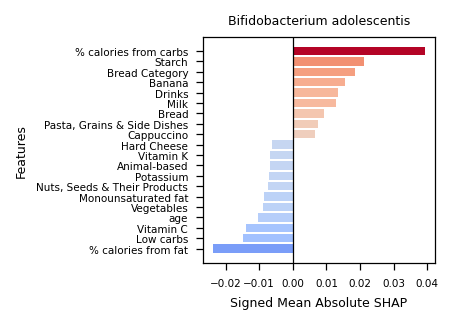

In [ ]:
plot_species_mean_abs_shap("Bifidobacterium adolescentis", title=None, directional=True)

UBA11774 sp003507655
223    0.376008
Name: 0, dtype: float64


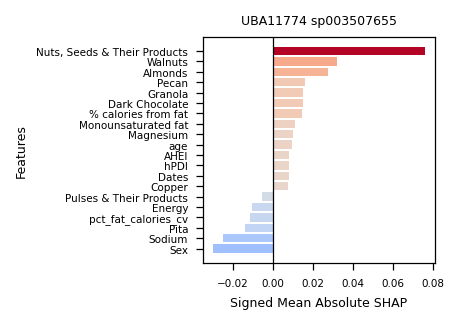

In [ ]:
plot_species_mean_abs_shap("UBA11774 sp003507655", title=None, directional=True)

Clostridium sp900539375
76    0.279224
Name: 0, dtype: float64


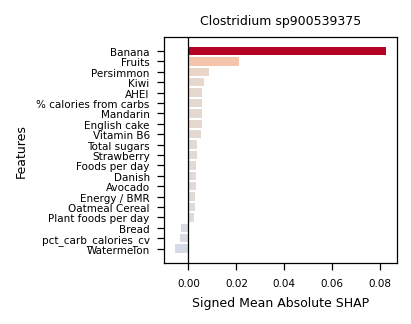

In [ ]:
plot_species_mean_abs_shap("Clostridium sp900539375", title=None, directional=True)

In [ ]:
def plot_div_target_mean_abs_shap(div_index, title=None, directional=False):
    plt.style.use(single_style)
    if title is None:
        title = str(div_index)

    # --- single diversity target SHAP vector ---
    col_key = str(div_index)
    if col_key not in mean_abs_shap_lgbm_div.columns:
        raise KeyError(f"Column '{col_key}' not found in mean_abs_shap_lgbm_div.")
    shap_vec = mean_abs_shap_lgbm_div[col_key].copy()

    # helper for pretty labels
    def pretty_labels(index_like):
        idx = pd.Index(index_like)
        def _to_int_if_possible(x):
            try:
                return int(x)
            except (ValueError, TypeError):
                return x
        idx_int = idx.map(_to_int_if_possible)

        base_names = pd.Series(all_features)
        mapped = base_names.reindex(idx_int)
        pretty = [diet_rename_dict.get(str(name), diet_rename_dict.get(name, str(name))) for name in mapped.values]
        return pretty

    import os

    save_dir = os.path.join(home_path, f"SHAP_plots/{PROBLEM}/{SPECIES}/pretty")
    os.makedirs(save_dir, exist_ok=True)

    # 3) Use save_dir for all saves
    png_path = os.path.join(save_dir, f"{diversity_targets[div_index]}_summary_plot.png")
    pdf_path = os.path.join(save_dir, f"{diversity_targets[div_index]}_summary_plot.pdf")

    if directional:
        if col_key not in correlation_matrix_div.columns:
            raise KeyError(f"Column '{col_key}' not found in correlation_matrix_div for directional mode.")
        direction = np.sign(correlation_matrix_div[col_key]).reindex(shap_vec.index).fillna(0)
        directional_abs = shap_vec * direction

        # top 20 by absolute value
        top_n = 20
        top_idx = directional_abs.abs().sort_values(ascending=False).head(top_n).index
        combined = directional_abs.loc[top_idx].sort_values()

        labels = pretty_labels(combined.index)

        # use coolwarm colormap
        norm = mcolors.Normalize(vmin=-abs(combined).max(), vmax=abs(combined).max())
        cmap = cm.get_cmap("coolwarm")
        colors = [cmap(norm(val)) for val in combined.values]

        plt.figure()
        plt.barh(labels, combined.values, color=colors, edgecolor='none')
        plt.axvline(0, color="black", linewidth=0.6)
        plt.xlabel('Signed Mean Absolute SHAP')
        plt.ylabel('Features')
        plt.savefig(home_path + f"SHAP_plots/{PROBLEM}/{SPECIES}/pretty/{diversity_targets[div_index]}_summary_plot.png",
            dpi=400, facecolor='white', transparent=False, bbox_inches='tight')
        plt.savefig(home_path + f"SHAP_plots/{PROBLEM}/{SPECIES}/pretty/{diversity_targets[div_index]}_summary_plot.pdf",
                dpi=400, facecolor='white', transparent=False, bbox_inches='tight', format='pdf')
        plt.show()

    else:
        # top 20 by absolute shap only
        top_n = 20
        top_idx = shap_vec.abs().sort_values(ascending=False).head(top_n).index
        vals = shap_vec.loc[top_idx].sort_values()
        labels = pretty_labels(vals.index)

        plt.figure()
        plt.barh(labels, vals.values, color='cadetblue', edgecolor='none')
        plt.xlabel('Mean Absolute SHAP Value')
        plt.ylabel('Features')
        plt.savefig(home_path + f"SHAP_plots/{PROBLEM}/{SPECIES}/pretty/{diversity_targets[div_index]}_summary_plot.png",
            dpi=400, facecolor='white', transparent=False, bbox_inches='tight')
        plt.savefig(home_path + f"SHAP_plots/{PROBLEM}/{SPECIES}/pretty/{diversity_targets[div_index]}_summary_plot.pdf",
                dpi=400, facecolor='white', transparent=False, bbox_inches='tight', format='pdf')
        plt.show()


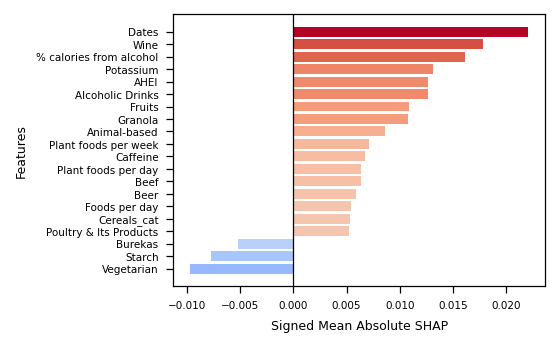

In [ ]:
plot_div_target_mean_abs_shap(0, title=None, directional=True)

### Probiotics
* Summary plots of the strains
* Mean shap values of bifidobacterium and of lactobacillus.

In [ ]:
print(mb_names['species_new'][mb_names['species_new'].str.contains("Bi")])

fBin__121|gBin__564|sBin__834             Bifidobacterium animalis_B
fBin__121|gBin__566|sBin__836              Bifidobacterium angulatum
fBin__121|gBin__568|sBin__838      Bifidobacterium pseudocatenulatum
fBin__121|gBin__568|sBin__840            Bifidobacterium catenulatum
fBin__121|gBin__568|sBin__841            Bifidobacterium ruminantium
fBin__121|gBin__568|sBin__842           Bifidobacterium adolescentis
fBin__121|gBin__571|sBin__846                Bifidobacterium bifidum
fBin__121|gBin__572|sBin__848                 Bifidobacterium longum
fBin__508|gBin__1896|sBin__2745                Bilophila sp900550745
fBin__508|gBin__1896|sBin__2746                Bilophila wadsworthia
Name: species_new, dtype: object


In [ ]:
# probiotics = ["Lactobacillus acidophilus", "Lactobacillus rhamnosus", "Lactobacillus casei", "Lactobacillus plantarum", "Bifidobacterium longum", "Bifidobacterium bifidum", "Bifidobacterium lactis", "Streptococcus thermophilus", "Saccharomyces boulardii", "Escherichia coli Nissle 1917", "Enterococcus faecium"]
# probiotics_indices = []

print(mb_names["species_new"][mb_names["species_new"].str.contains("oul")])

# for probiotic in probiotics:
#     mb_code = mb_names[mb_names['species_new'] == probiotic].index
#     print(mb_code)
#     print(mb_code[0])
#     probiotics_indices.append(targets.index(mb_code[0]))

# print(probiotics_indices)

Series([], Name: species_new, dtype: object)


In [ ]:
def analyze_genus(genus, title=None, directional=False):
    if title is None:
        title = genus

    genus_indices = map_df[map_df["Microbe_Name"].str.contains(genus)]["index"]
    for genus_index in genus_indices:
        print(map_df.loc[int(genus_index)]["Microbe_Name"])

    # Pearson's correlations
    bifido_corr = lgbm_diet_scores.loc[genus_indices]
    print(bifido_corr)

    genus_indices = [str(x) for x in genus_indices]

    # Subset mean absolute and signed SHAP
    mean_abs_shap_genus = mean_abs_shap_lgbm_abundance.loc[:, genus_indices]
    corr_matrix_genus = correlation_matrix.loc[:, genus_indices]

    # Mean across microbes -> bar heights
    mean_abs_shap_genus['mean_abs_shap'] = mean_abs_shap_genus.mean(axis=1)

    # unified scatter style
    dot_color = '0.2'   # dark gray
    dot_alpha = 0.35

    if directional:
        corr_matrix_genus['mean_corr'] = corr_matrix_genus.mean(axis=1)
        direction = np.sign(corr_matrix_genus['mean_corr']).reset_index(drop=True)
        directional_abs_shap = mean_abs_shap_genus['mean_abs_shap'] * direction

        # Get top and bottom
        top_n = 10
        top_features = directional_abs_shap.sort_values(ascending=False).head(top_n)
        bottom_features = directional_abs_shap.sort_values(ascending=True).head(top_n)
        combined = pd.concat([top_features, bottom_features])
        feature_names = pd.Series(all_features).loc[combined.index]

        shap_data = pd.DataFrame({
            'Feature': feature_names.values,
            'Directional SHAP Value': combined.values
        }, index=combined.index)

        shap_data = shap_data.sort_values(by='Directional SHAP Value')
        colors = ['cadetblue' if val > 0 else 'salmon' for val in shap_data['Directional SHAP Value']]

        # Bars
        plt.figure(figsize=(8, 8))
        plt.barh(shap_data['Feature'], shap_data['Directional SHAP Value'],
                 color=colors, edgecolor='none')

        # scatter - same color for all dots
        vals = mean_abs_shap_genus.drop(columns=['mean_abs_shap'])
        signed_vals = vals.mul(direction, axis=0).loc[shap_data.index]
        y = np.arange(len(shap_data))
        for col in signed_vals.columns:
            plt.scatter(
                signed_vals[col].values, y,
                s=14, zorder=3, color=dot_color, alpha=dot_alpha, edgecolors='none'
            )

        plt.xlabel('Signed Mean SHAP Value', fontsize=14)
        plt.ylabel('Features', fontsize=14)
        plt.title(f"Directional SHAP for {title}", fontsize=14)
        
        plt.show()

    else:
        # Top features by mean|SHAP|
        top_shap_genus = mean_abs_shap_genus['mean_abs_shap'].sort_values(ascending=False).head(10).index
        top_fnames_shap_genus = pd.Series(all_features).loc[top_shap_genus]

        shap_data = pd.concat([
            top_fnames_shap_genus,
            mean_abs_shap_genus['mean_abs_shap'].loc[top_shap_genus]
        ], axis=1)
        shap_data.columns = ['Feature', 'Mean Absolute SHAP Value']
        shap_data = shap_data.sort_values(by='Mean Absolute SHAP Value', ascending=True)

        # Bars
        plt.figure(figsize=(8, 6))
        plt.barh(shap_data['Feature'], shap_data['Mean Absolute SHAP Value'],
                 color='cadetblue', edgecolor='none')

        # scatter - same color for all dots
        vals = mean_abs_shap_genus.drop(columns=['mean_abs_shap']).loc[top_shap_genus]
        vals = vals.loc[shap_data.index]
        y = np.arange(len(shap_data))
        for col in vals.columns:
            plt.scatter(
                vals[col].values, y,
                s=14, zorder=3, color=dot_color, alpha=dot_alpha, edgecolors='none'
            )

        plt.xlabel('Mean Absolute SHAP Value', fontsize=14)
        plt.ylabel('Features', fontsize=14)
        plt.title(f"Top Features for {title}", fontsize=14)
        
        plt.show()


In [ ]:
def analyze_genus_ranks(genus, title=None):
    if title is None:
        title = genus

    # genus_names = mb_names[mb_names['species_new'].str.contains(genus, regex=True)].index
    # if genus_names.empty:
    #     print("Genus not found.")
    #     return
    
    # genus_names = [name for name in genus_names if name in significant_targets]
    # genus_indices = map_df[map_df["targets"].isin(genus_names)]["index"]
    genus_indices = map_df[map_df["Microbe_Name"].str.contains(genus)]["index"]
    print(genus_indices)
    for genus_index in genus_indices:
        print(map_df.loc[int(genus_index)]["Microbe_Name"])

    # Pearson's correlations
    bifido_corr = lgbm_diet_scores.loc[genus_indices]
    print(bifido_corr)

    genus_indices = [str(x) for x in genus_indices]
    shap_values_genus = mean_abs_shap_lgbm_abundance.loc[:, list(genus_indices)]

    # Calculate ranks for each target (column)
    ranks = shap_values_genus.rank(ascending=False)
    
    # Calculate mean rank across all targets for each feature
    mean_ranks = ranks.mean(axis=1)
    
    # Get top 10 features by mean rank
    top_features = mean_ranks.sort_values().head(10)
    
    # Get actual feature names
    top_fnames_shap_genus = pd.Series(all_features).loc[top_features.index]
    
    # Sort features by rank (highest to lowest)
    sorted_indices = np.argsort(top_features.values)[::-1]
    sorted_features = top_fnames_shap_genus.iloc[sorted_indices]
    sorted_values = top_features.values[sorted_indices]
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    bars = plt.barh(
        y=np.arange(len(sorted_features)),
        width=sorted_values,
        color='cadetblue',
        edgecolor=None
    )
    
    # Customize the plot
    plt.ylabel('Features')
    plt.xlabel('Mean Rank')
    plt.title(f'Mean SHAP Rank for {title}')
    
    # Add feature names as y-tick labels
    plt.yticks(np.arange(len(sorted_features)), sorted_features)
    
    # Add value labels on the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                 f'{width:.1f}',
                 ha='left', va='center')
    
    # Adjust layout to prevent label cutoff
    
    
    # Save the figure
    # plt.savefig(home_path + f"figures/{PROBLEM}/mean_shap_ranks_{title}.png", 
    #             dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
    
    # Show the plot
    plt.show()
    
    # Create summary DataFrame
    summary_df = pd.DataFrame({
        'Feature': sorted_features.values,
        'Mean_Rank': sorted_values,
        'Std_Rank': ranks.loc[top_features.index].std(axis=1).values,
        'Min_Rank': ranks.loc[top_features.index].min(axis=1).values,
        'Max_Rank': ranks.loc[top_features.index].max(axis=1).values
    })
    
    return summary_df


Bifidobacterium longum
Bifidobacterium adolescentis
Bifidobacterium bifidum
Bifidobacterium catenulatum
Bifidobacterium angulatum
Bifidobacterium animalis_B
Bifidobacterium pseudocatenulatum
Bifidobacterium ruminantium
34    0.361910
32    0.312853
33    0.251557
30    0.246444
28    0.215582
27    0.183629
29    0.159093
31    0.053079
Name: 0, dtype: float64


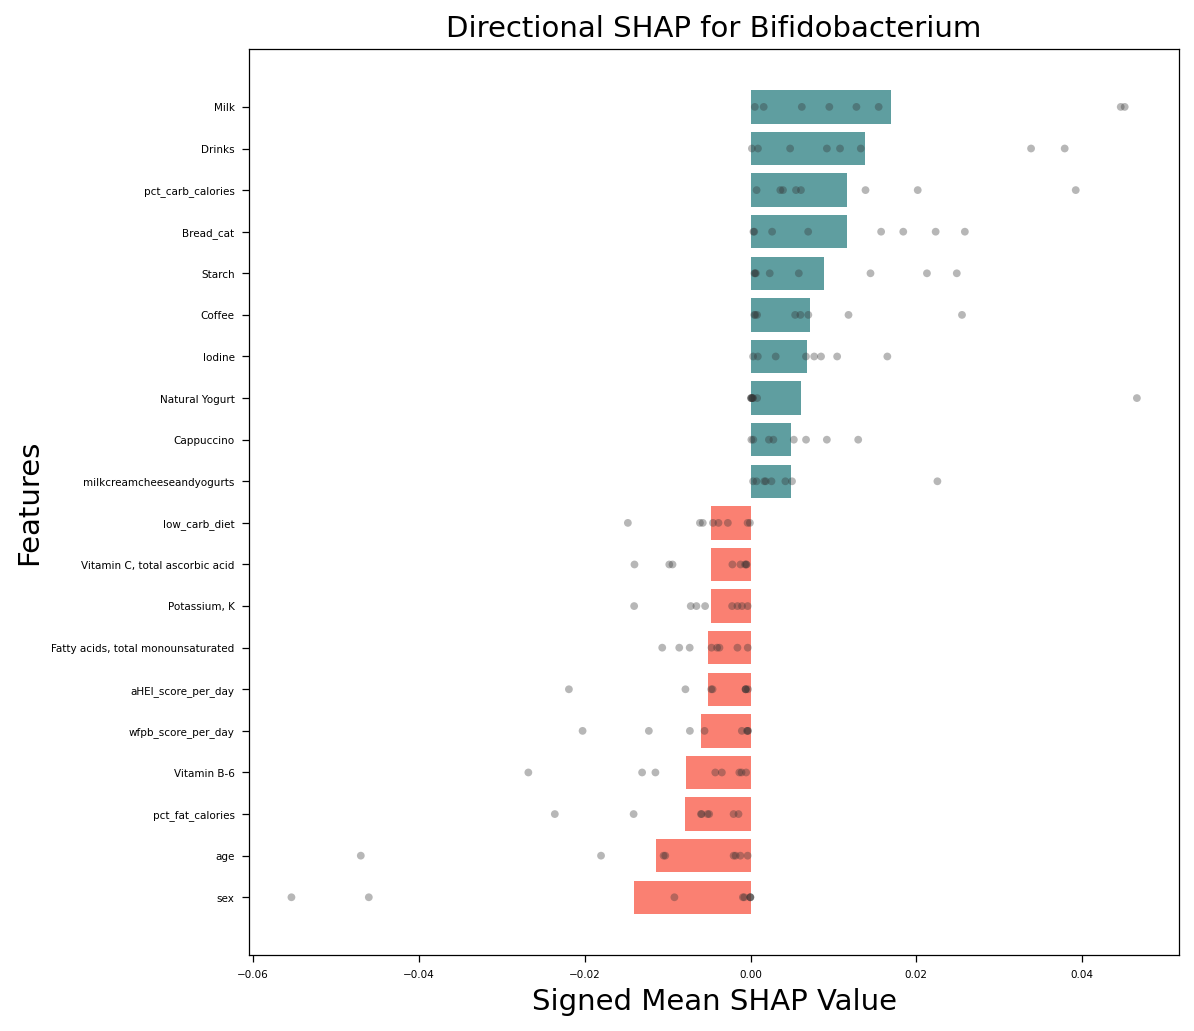

In [ ]:
analyze_genus("Bifidobacterium", directional=True)

Bifidobacterium longum
Bifidobacterium adolescentis
Bifidobacterium bifidum
Bifidobacterium catenulatum
Bifidobacterium angulatum
Bifidobacterium animalis_B
Bifidobacterium pseudocatenulatum
Bifidobacterium ruminantium
34    0.361910
32    0.312853
33    0.251557
30    0.246444
28    0.215582
27    0.183629
29    0.159093
31    0.053079
Name: 0, dtype: float64


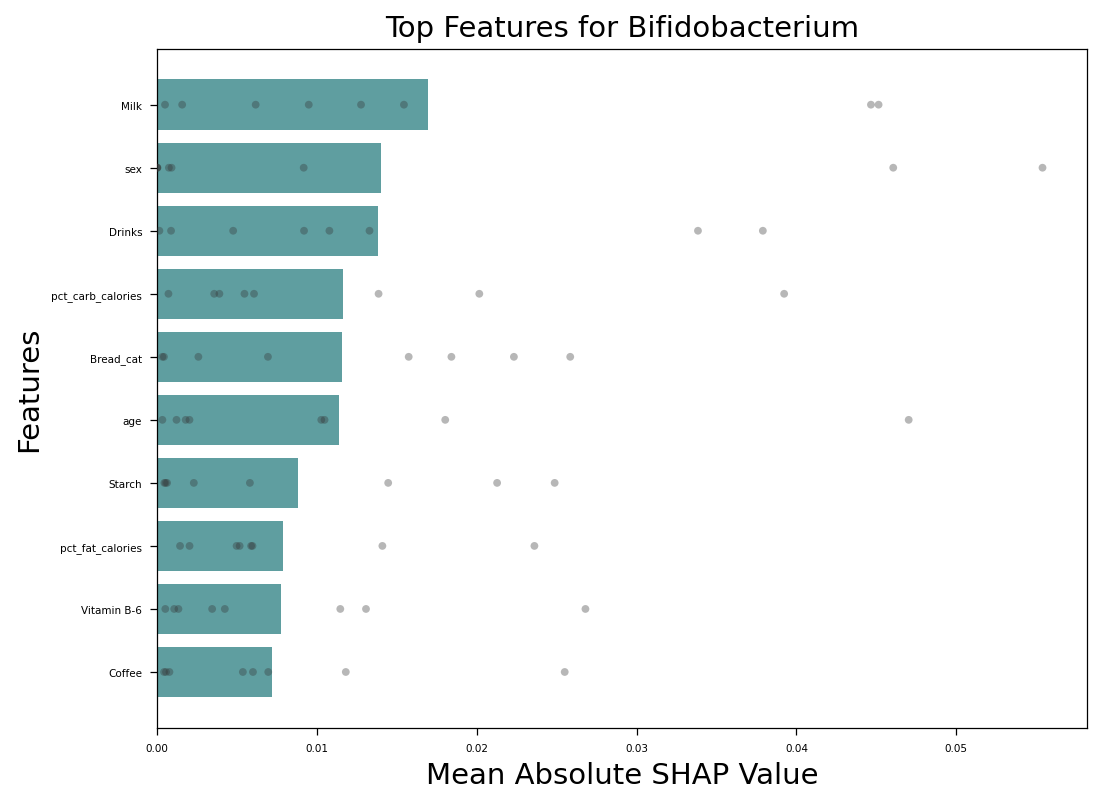

In [ ]:
analyze_genus("Bifidobacterium")


Ligilactobacillus ruminis
Lactococcus lactis
43    0.207802
53    0.146306
Name: 0, dtype: float64


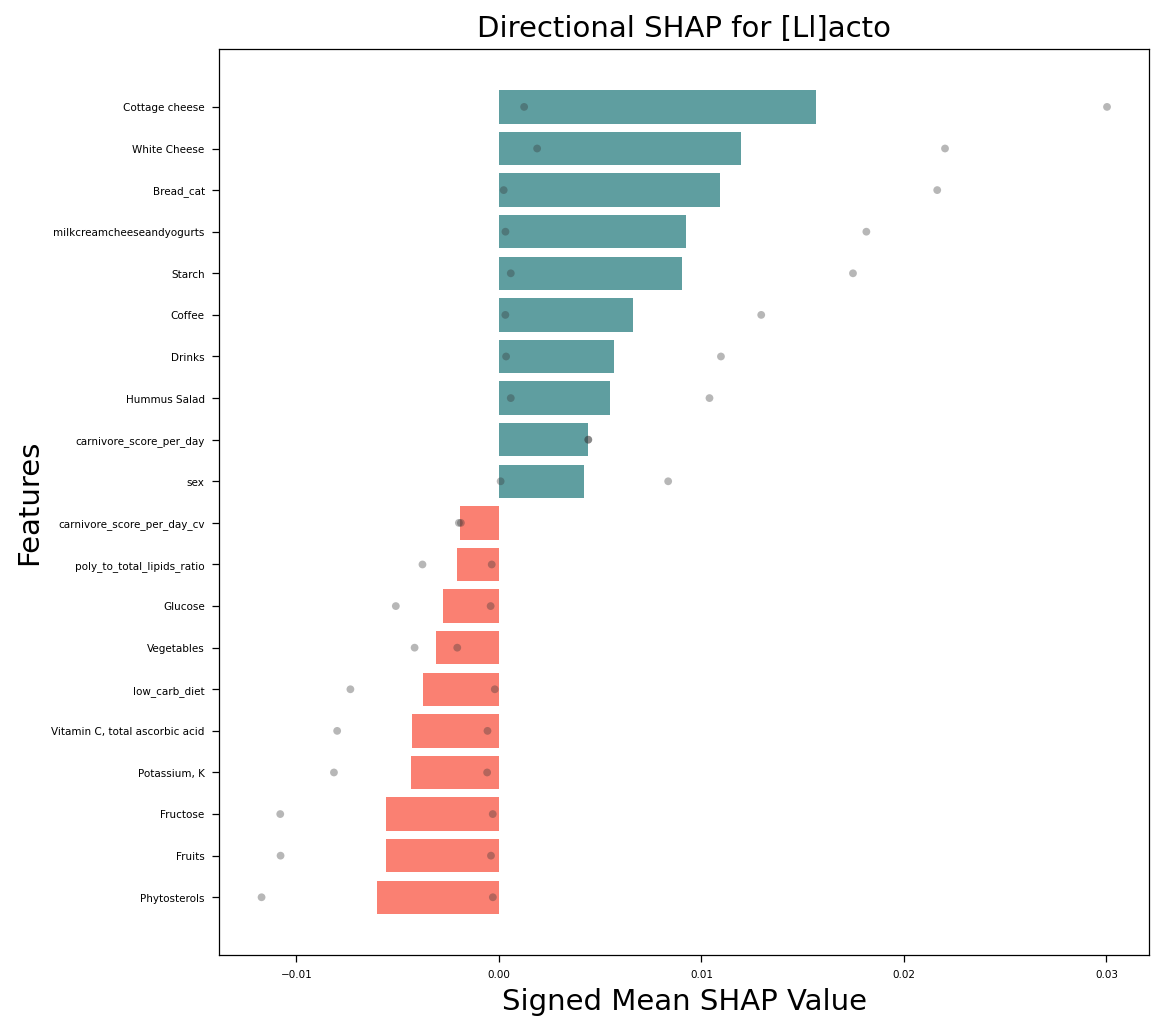

In [ ]:
analyze_genus('[Ll]acto', directional=True)

Ligilactobacillus ruminis
Lactococcus lactis
43    0.207802
53    0.146306
Name: 0, dtype: float64


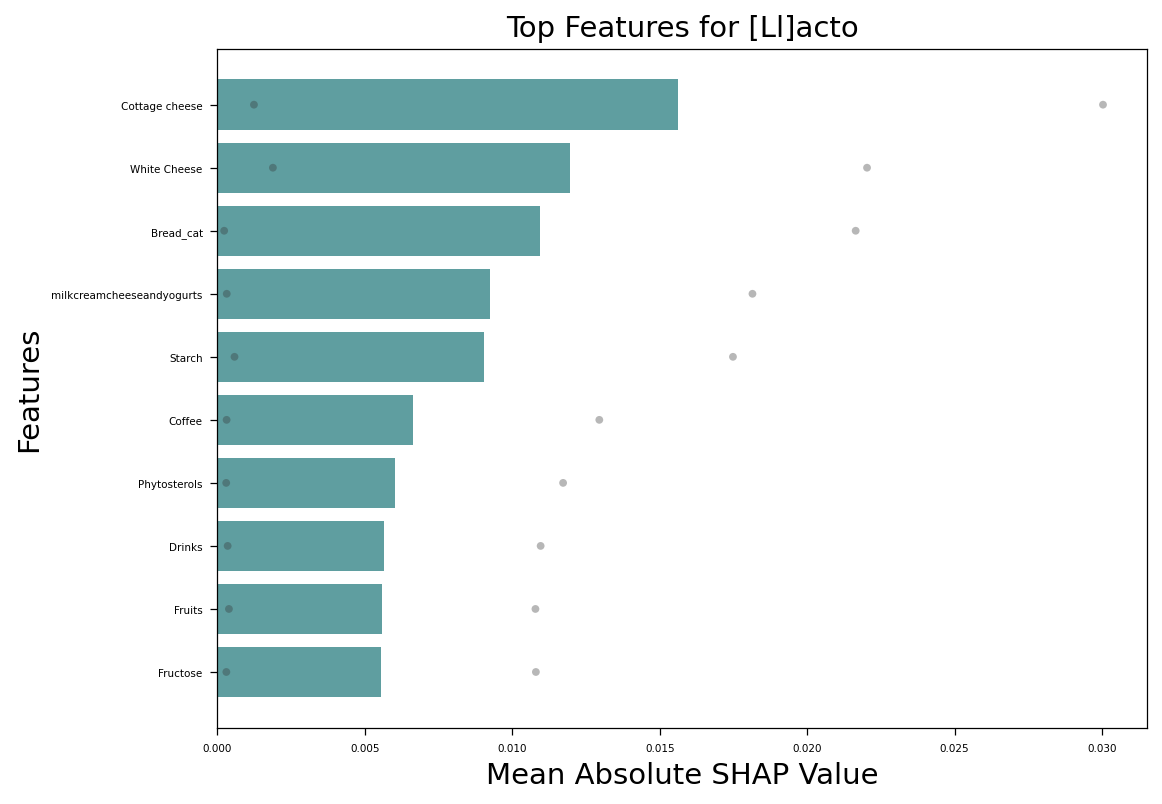

In [ ]:
analyze_genus('[Ll]acto')

Akkermansia muciniphila
Akkermansia massiliensis
9     0.170306
10    0.051211
Name: 0, dtype: float64


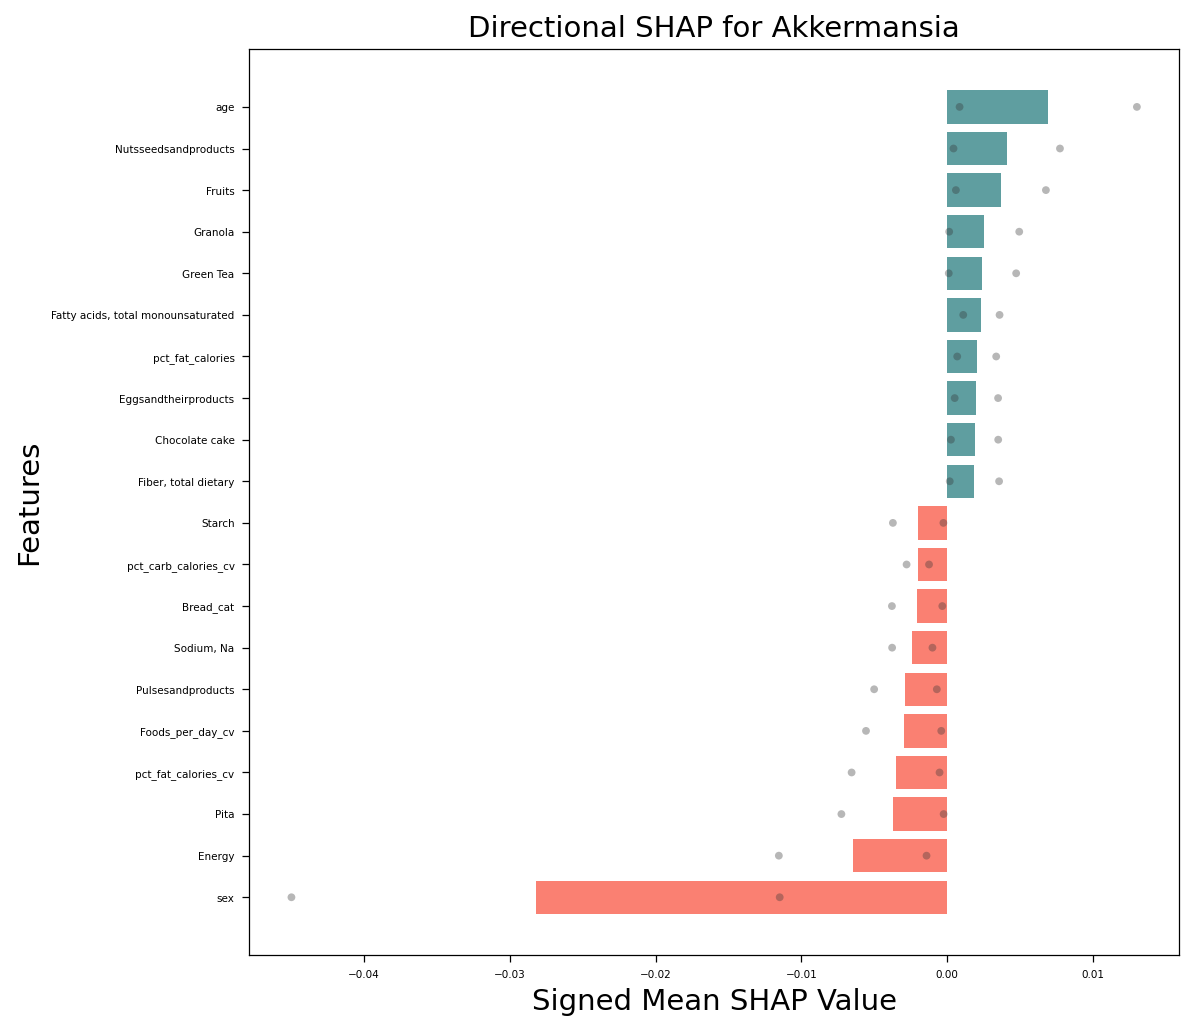

In [ ]:
analyze_genus('Akkermansia', directional=True)

Streptococcus thermophilus
Streptococcus salivarius
Streptococcus sp001556435
Streptococcus sp902463925
Streptococcus caecimuris
Streptococcus parasanguinis_C
Streptococcus parasanguinis
46    0.423344
49    0.131387
48    0.107203
47    0.080875
51    0.069564
52    0.065755
50    0.047883
Name: 0, dtype: float64


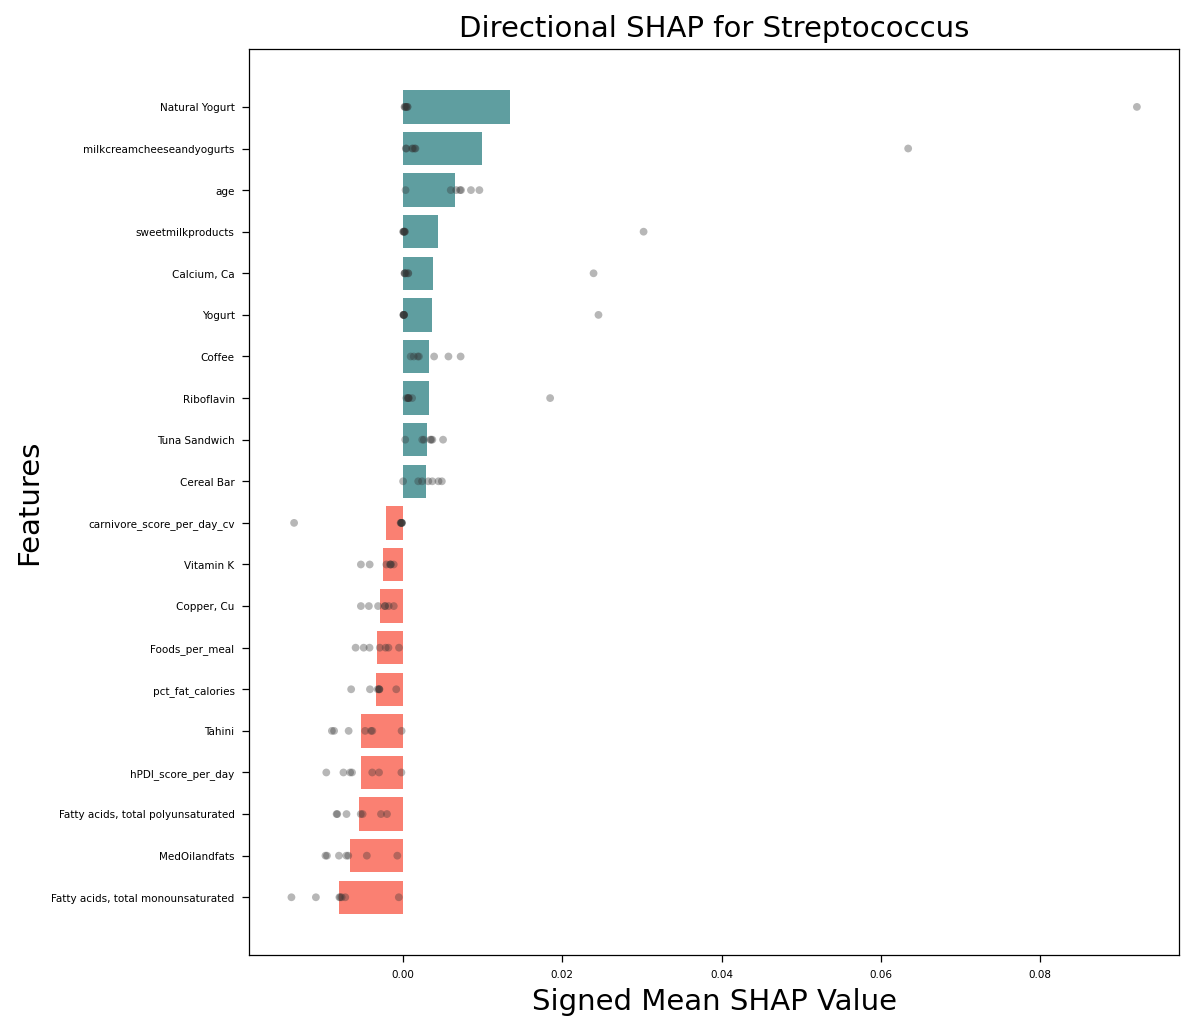

In [ ]:
analyze_genus('Streptococcus', directional=True)

Faecalibacterium sp900758465
Faecalibacterium sp900539885
Faecalibacterium prausnitzii_E
Faecalibacterium prausnitzii_J
Faecalibacterium prausnitzii
Faecalibacterium sp900539945
Faecalibacterium hattorii
Faecalibacterium prausnitzii_I
Faecalibacterium sp900765105
Faecalibacterium duncaniae
Faecalibacterium sp900772565
Faecalibacterium longum
Faecalibacterium prausnitzii_A
Faecalibacterium sp003449675
Faecalibacterium prausnitzii_D
Faecalibacterium prausnitzii_F
Faecalibacterium sp900765705
Faecalibacterium prausnitzii
Faecalibacterium sp934503275
480    0.231970
502    0.173766
486    0.170518
490    0.166413
493    0.165343
498    0.156272
485    0.124989
483    0.124413
503    0.116079
484    0.106984
491    0.098280
481    0.095264
494    0.091038
492    0.079589
501    0.076398
500    0.068010
487    0.049493
497    0.032182
489    0.026625
Name: 0, dtype: float64


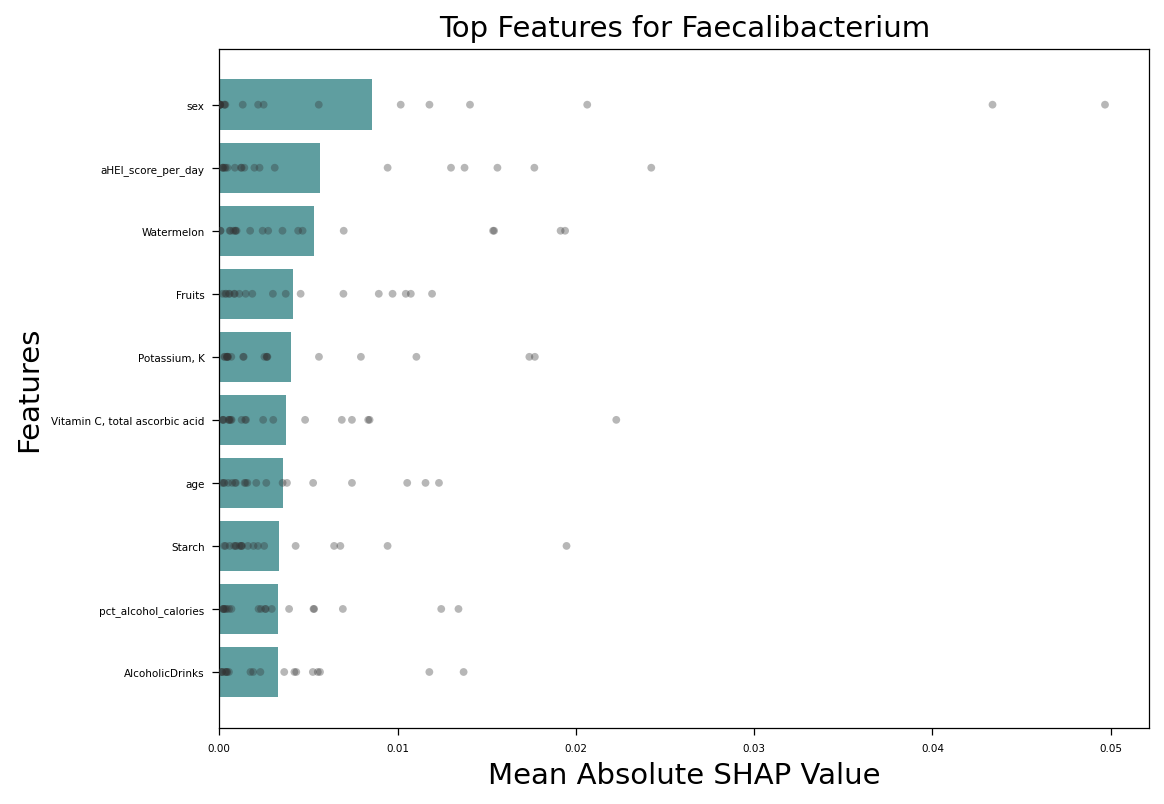

In [ ]:
analyze_genus('Faecalibacterium')

Faecalibacterium prausnitzii_E
Faecalibacterium prausnitzii_J
Faecalibacterium prausnitzii
Faecalibacterium prausnitzii_I
Faecalibacterium prausnitzii_A
Faecalibacterium prausnitzii_D
Faecalibacterium prausnitzii_F
Faecalibacterium prausnitzii
486    0.170518
490    0.166413
493    0.165343
483    0.124413
494    0.091038
501    0.076398
500    0.068010
497    0.032182
Name: 0, dtype: float64


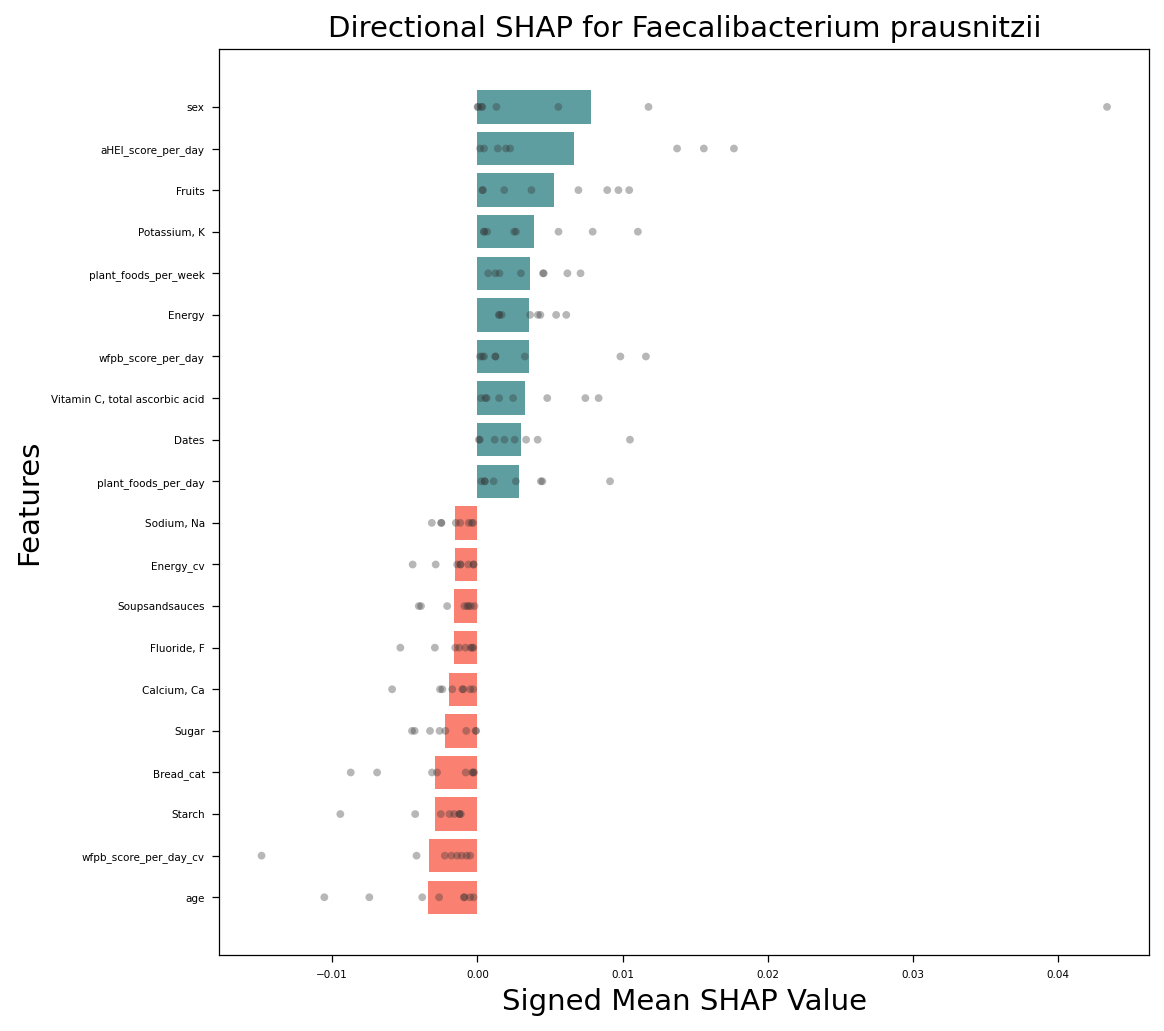

In [ ]:
analyze_genus('Faecalibacterium prausnitzii', directional=True)

Bacteroides cellulosilyticus
Bacteroides_F pectinophilus
Bacteroides uniformis
Bacteroides nordii
Bacteroides clarus
Bacteroides salyersiae
Bacteroides stercoris
Bacteroides thetaiotaomicron
Bacteroides zhangwenhongii
Bacteroides sp900552405
Bacteroides eggerthii
Bacteroides fragilis
Bacteroides faecis
Bacteroides bouchesdurhonensis
Bacteroides intestinalis
Bacteroides caccae
Bacteroides sp900759525
Bacteroides sp900556215
Bacteroides ovatus
666    0.195286
322    0.154126
673    0.143329
678    0.136957
671    0.135063
677    0.110130
670    0.108304
681    0.100146
682    0.099278
664    0.083193
669    0.073893
675    0.064710
680    0.062884
679    0.061439
667    0.054774
688    0.047800
665    0.046303
668    0.029919
687    0.029729
Name: 0, dtype: float64


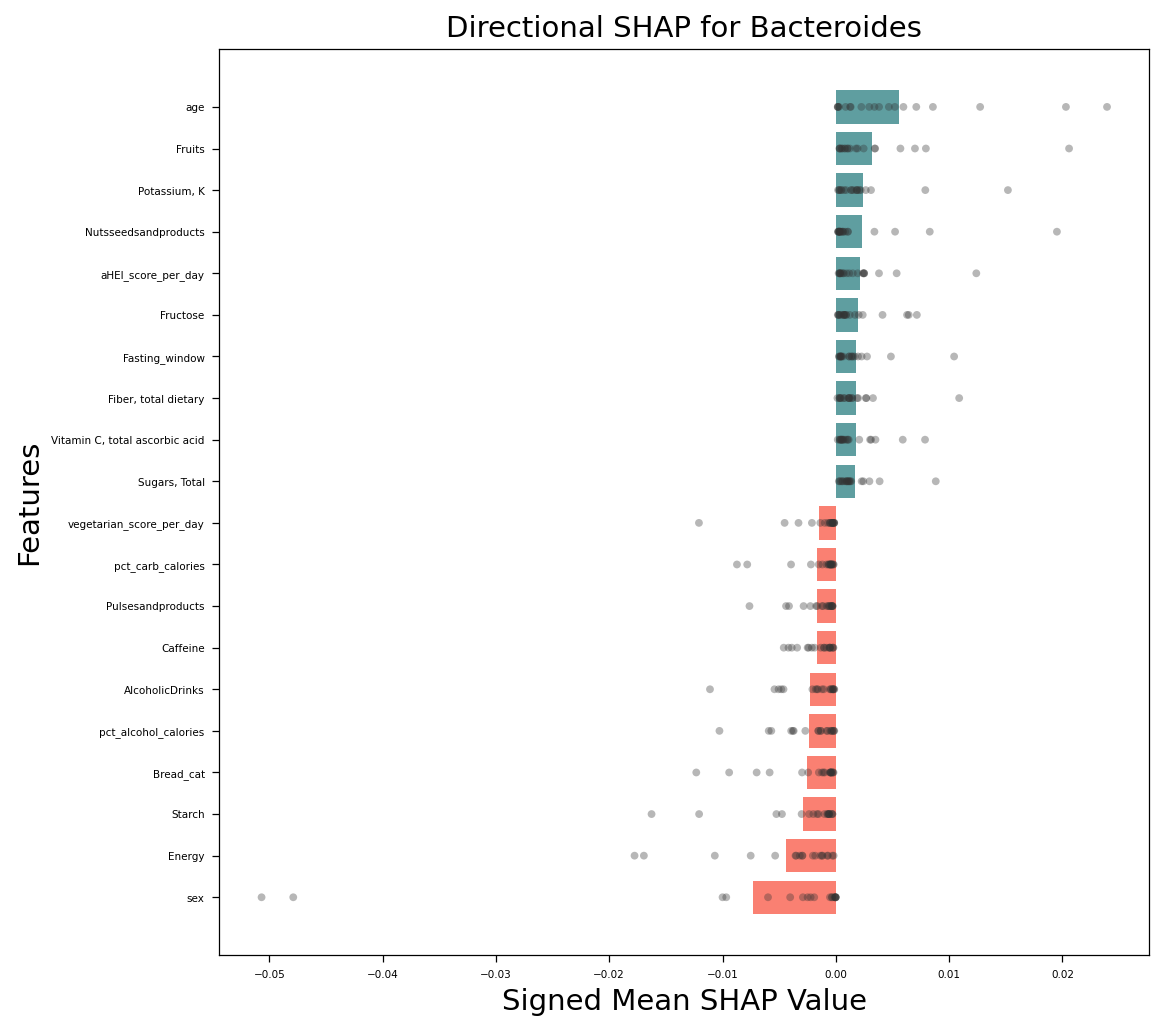

In [ ]:
analyze_genus('Bacteroides', directional=True)

Eubacterium_G ventriosum
Eubacterium_I ramulus_A
Eubacterium_I ramulus
Eubacterium_F sp000433735
Eubacterium_F sp003491505
Eubacterium_F sp900539115
Eubacterium_G segne
Eubacterium_R sp000434995
Eubacterium_G sp000434315
Eubacterium_R sp003526845
Eubacterium_R sp000433975
Eubacterium_F sp000434115
319    0.203653
291    0.183653
290    0.180270
332    0.164064
333    0.152289
334    0.111289
317    0.106220
639    0.095340
318    0.091004
641    0.081876
638    0.040498
335    0.027513
Name: 0, dtype: float64


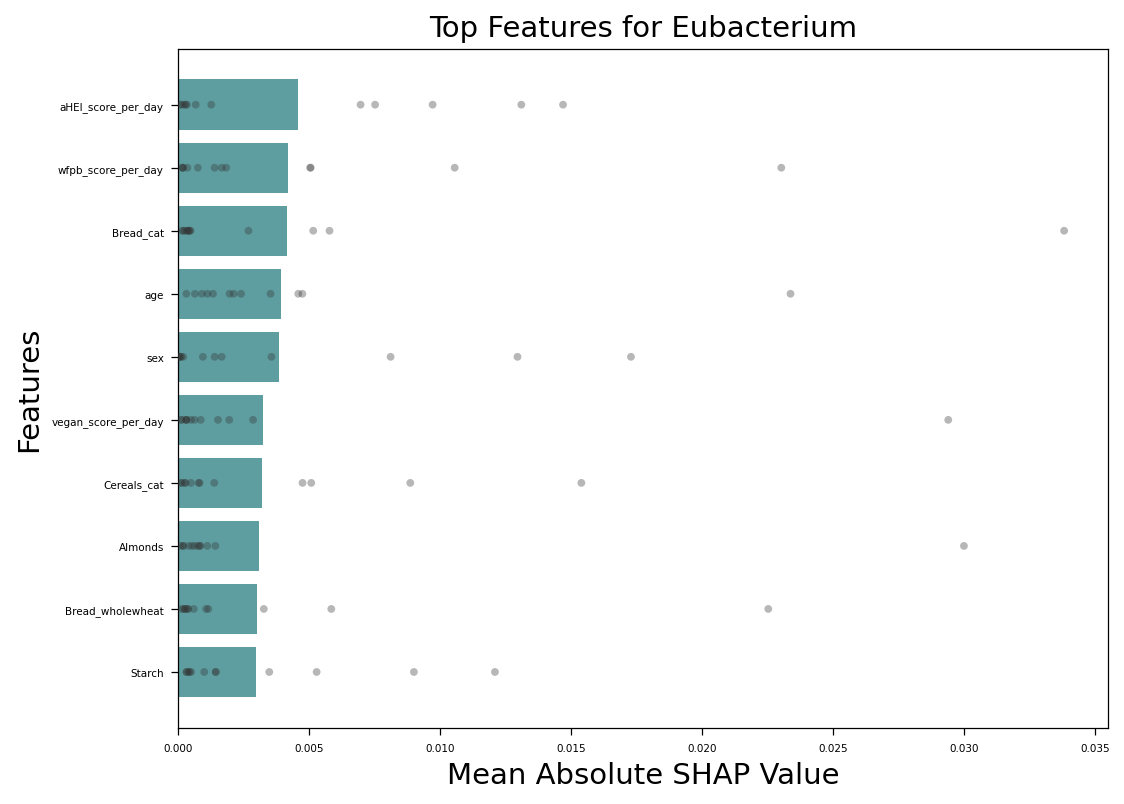

In [ ]:
analyze_genus('Eubacterium')

Streptococcus thermophilus
Bifidobacterium longum
Bifidobacterium adolescentis
Bifidobacterium bifidum
Bifidobacterium catenulatum
Bifidobacterium angulatum
Bifidobacterium animalis_B
Faecalibacterium prausnitzii_E
Akkermansia muciniphila
Faecalibacterium prausnitzii_J
Faecalibacterium prausnitzii
Bifidobacterium pseudocatenulatum
Lactococcus lactis
Streptococcus salivarius
Faecalibacterium prausnitzii_I
Faecalibacterium prausnitzii_A
Faecalibacterium prausnitzii_D
Faecalibacterium prausnitzii_F
Bifidobacterium ruminantium
Faecalibacterium prausnitzii
46     0.423344
34     0.361910
32     0.312853
33     0.251557
30     0.246444
28     0.215582
27     0.183629
486    0.170518
9      0.170306
490    0.166413
493    0.165343
29     0.159093
53     0.146306
49     0.131387
483    0.124413
494    0.091038
501    0.076398
500    0.068010
31     0.053079
497    0.032182
Name: 0, dtype: float64


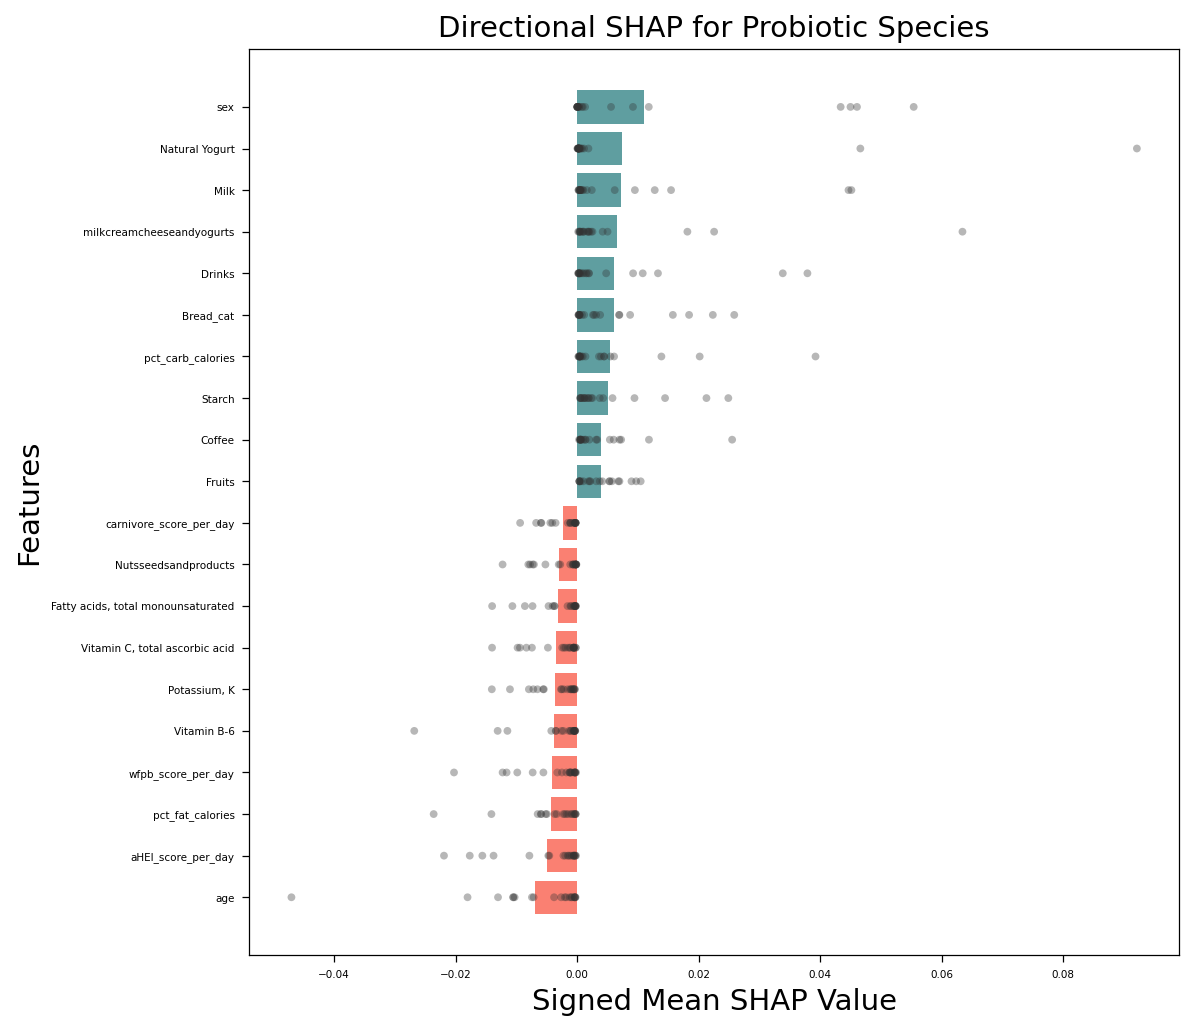

In [ ]:
# Probiotic species
probiotics_pattern = (
    r'Bifidobacterium|'
    r'Streptococcus thermophilus|Streptococcus salivarius|'
    r'Akkermansia muciniphila|'
    r'Faecalibacterium prausnitzii|'
    r'Lactococcus lactis'
    # r'Bacteroides'
)

# r'Bacteroides fragilis|Bacteroides vulgatus|': Two pathogenic bacteroides to remove if I include Bacteroides genus as probiotics.

analyze_genus(probiotics_pattern, title="Probiotic Species", directional=True)

Streptococcus thermophilus
Bifidobacterium longum
Bifidobacterium adolescentis
Bifidobacterium bifidum
Bifidobacterium catenulatum
Faecalibacterium sp900758465
Bifidobacterium angulatum
Ligilactobacillus ruminis
Bacteroides cellulosilyticus
Bifidobacterium animalis_B
Faecalibacterium sp900539885
Faecalibacterium prausnitzii_E
Akkermansia muciniphila
Faecalibacterium prausnitzii_J
Faecalibacterium prausnitzii
Bifidobacterium pseudocatenulatum
Faecalibacterium sp900539945
Bacteroides_F pectinophilus
Lactococcus lactis
Bacteroides uniformis
Bacteroides nordii
Bacteroides clarus
Streptococcus salivarius
Faecalibacterium hattorii
Faecalibacterium prausnitzii_I
Faecalibacterium sp900765105
Bacteroides salyersiae
Bacteroides stercoris
Streptococcus sp001556435
Faecalibacterium duncaniae
Bacteroides thetaiotaomicron
Bacteroides zhangwenhongii
Faecalibacterium sp900772565
Faecalibacterium longum
Faecalibacterium prausnitzii_A
Bacteroides sp900552405
Streptococcus sp902463925
Faecalibacterium sp

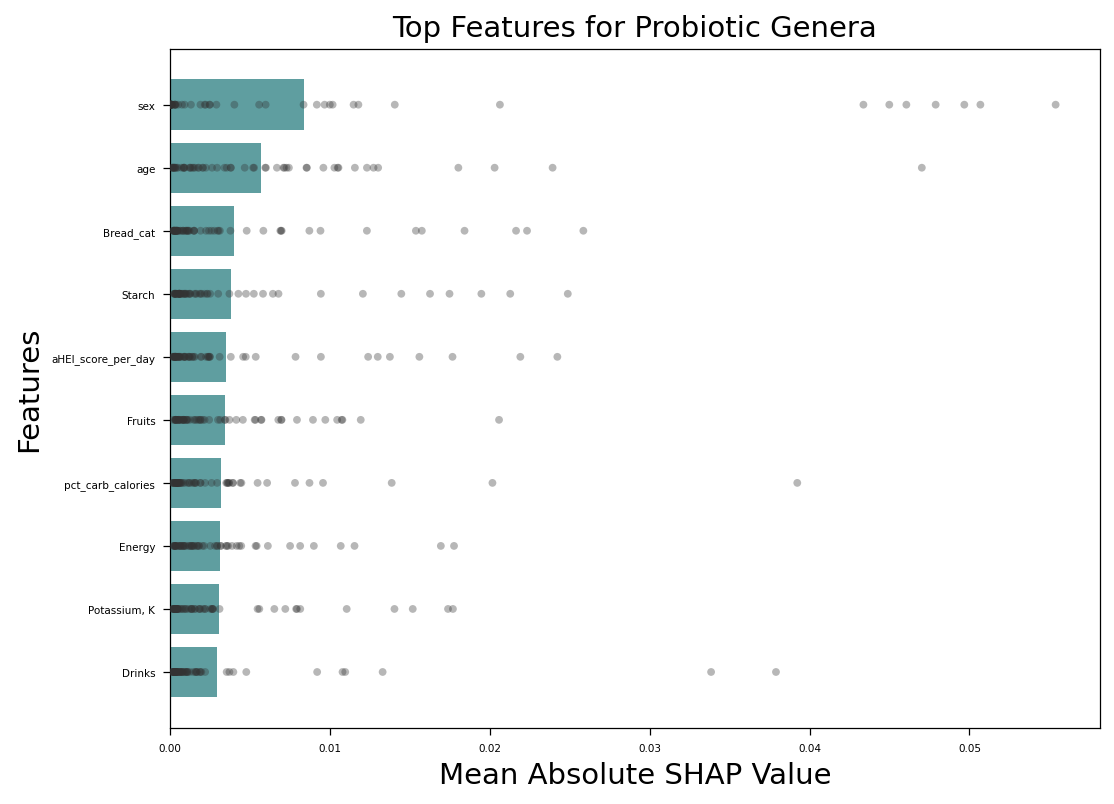

In [ ]:
# Probiotic genera
probiotic_genera_pattern = (
    r'Bifidobacterium|'
    r'Streptococcus|'
    r'Akkermansia|'
    r'Faecalibacterium|'
    r'[Ll]acto|'
    r'Bacteroides'
)

analyze_genus(probiotic_genera_pattern, title="Probiotic Genera")

### Short Chain Fatty Acids producers

Lawsonibacter asaccharolyticus
Roseburia hominis
Anaerostipes hadrus
Roseburia inulinivorans
Anaerostipes amylophilus
Eubacterium_G ventriosum
Butyricicoccus_A intestinisimiae
Eubacterium_I ramulus_A
Eubacterium_I ramulus
Agathobaculum hominis
Faecalibacterium prausnitzii_E
Faecalibacterium prausnitzii_J
Faecalibacterium prausnitzii
Roseburia intestinalis
Ruminococcus_E bromii_B
Agathobaculum butyriciproducens
Faecalibacterium prausnitzii_I
Coprococcus sp000154245
Anaerobutyricum soehngenii
Faecalibacterium duncaniae
Coprococcus sp000433075
Faecalibacterium prausnitzii_A
Faecalibacterium prausnitzii_D
Anaerobutyricum hallii
Faecalibacterium prausnitzii_F
Coprococcus eutactus
Coprococcus sp900548215
Faecalibacterium prausnitzii
Ruminococcus_E intestinalis
594    0.426409
239    0.227815
272    0.224165
230    0.209359
274    0.204266
319    0.203653
468    0.198822
291    0.183653
290    0.180270
471    0.179593
486    0.170518
490    0.166413
493    0.165343
233    0.151717
626    0.13

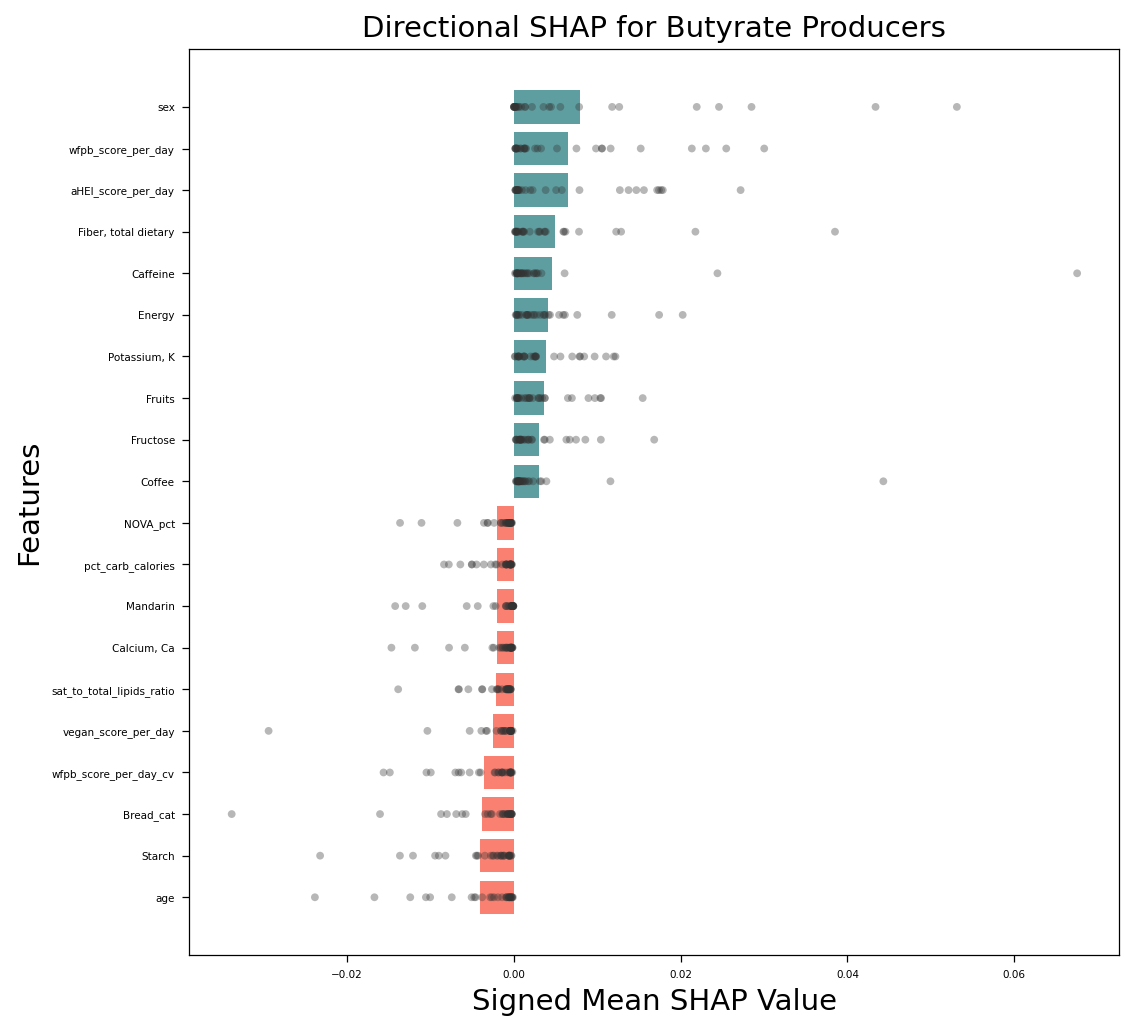

In [ ]:
butyrate_pattern = (
    r'Anaerobutyricum hallii|Anaerobutyricum soehngenii|'
    r'Anaerostipes hadrus|Anaerostipes amylophilus|'
    r'Agathobaculum butyriciproducens|Agathobaculum hominis|'
    r'Coprococcus eutactus|Coprococcus sp000154245|Coprococcus sp000433075|Coprococcus sp900548215|'
    r'Eubacterium_G ventriosum|Eubacterium_I ramulus|'
    r'Faecalibacterium prausnitzii|Faecalibacterium duncaniae|'
    r'Roseburia hominis|Roseburia intestinalis|Roseburia inulinivorans|'
    r'Ruminococcus_E bromii_B|Ruminococcus_E intestinalis|'
    r'Butyricicoccus_A intestinisimiae|Lawsonibacter asaccharolyticus'
)

analyze_genus(butyrate_pattern, title="Butyrate Producers", directional=True)

Streptococcus thermophilus
Bifidobacterium longum
Bifidobacterium adolescentis
Bifidobacterium bifidum
Roseburia hominis
Eubacterium_G ventriosum
Blautia_A wexlerae_C
Faecalibacterium prausnitzii_E
Akkermansia muciniphila
Faecalibacterium prausnitzii_J
Faecalibacterium prausnitzii
Roseburia intestinalis
Lactococcus lactis
Phascolarctobacterium faecium
Faecalibacterium prausnitzii_I
Escherichia coli
Blautia_A wexlerae
Blautia_A obeum
Bacteroides thetaiotaomicron
Blautia_A wexlerae_B
Faecalibacterium prausnitzii_A
Collinsella bouchesdurhonensis
Faecalibacterium prausnitzii_D
Faecalibacterium prausnitzii_F
Bacteroides fragilis
Coprococcus eutactus
Faecalibacterium prausnitzii
Bacteroides ovatus
46     0.423344
34     0.361910
32     0.312853
33     0.251557
239    0.227815
319    0.203653
304    0.198040
486    0.170518
9      0.170306
490    0.166413
493    0.165343
233    0.151717
53     0.146306
160    0.132476
483    0.124413
37     0.118969
303    0.112128
310    0.107909
681    0.10

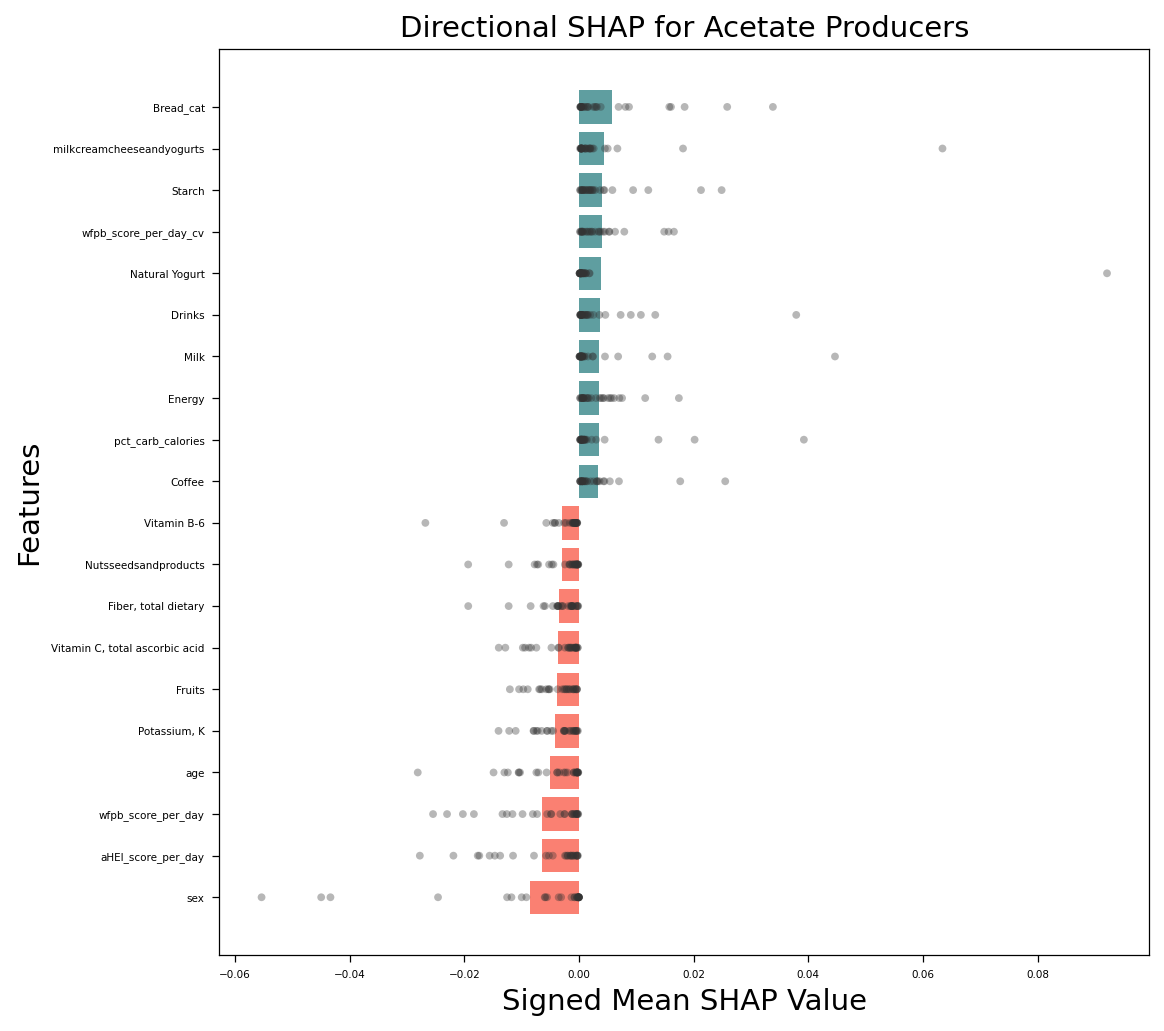

In [ ]:
acetate_pattern = (
    r'Akkermansia muciniphila|'
    r'Bacteroides thetaiotaomicron|Bacteroides fragilis|Bacteroides ovatus|'
    r'Bifidobacterium adolescentis|Bifidobacterium bifidum|Bifidobacterium longum|'
    r'Blautia_A obeum|Blautia_A wexlerae|'
    r'Collinsella bouchesdurhonensis|'
    r'Coprococcus eutactus|'
    r'Eubacterium_G ventriosum|'
    r'Escherichia coli|'
    r'Faecalibacterium prausnitzii|'
    r'Lactococcus lactis|'
    r'Phascolarctobacterium faecium|'
    r'Roseburia hominis|Roseburia intestinalis|'
    r'Streptococcus thermophilus'
)

analyze_genus(acetate_pattern, title="Acetate Producers", directional=True)

Roseburia inulinivorans
Akkermansia muciniphila
Dialister hominis
Bacteroides uniformis
Prevotella copri_B
Phascolarctobacterium faecium
Bacteroides thetaiotaomicron
Bacteroides fragilis
Veillonella atypica
Coprococcus eutactus
Prevotella copri_A
Dialister sp000434475
Bacteroides ovatus
230    0.209359
9      0.170306
166    0.168089
673    0.143329
380    0.141731
160    0.132476
681    0.100146
675    0.064710
162    0.053034
219    0.050532
383    0.050379
167    0.046289
687    0.029729
Name: 0, dtype: float64


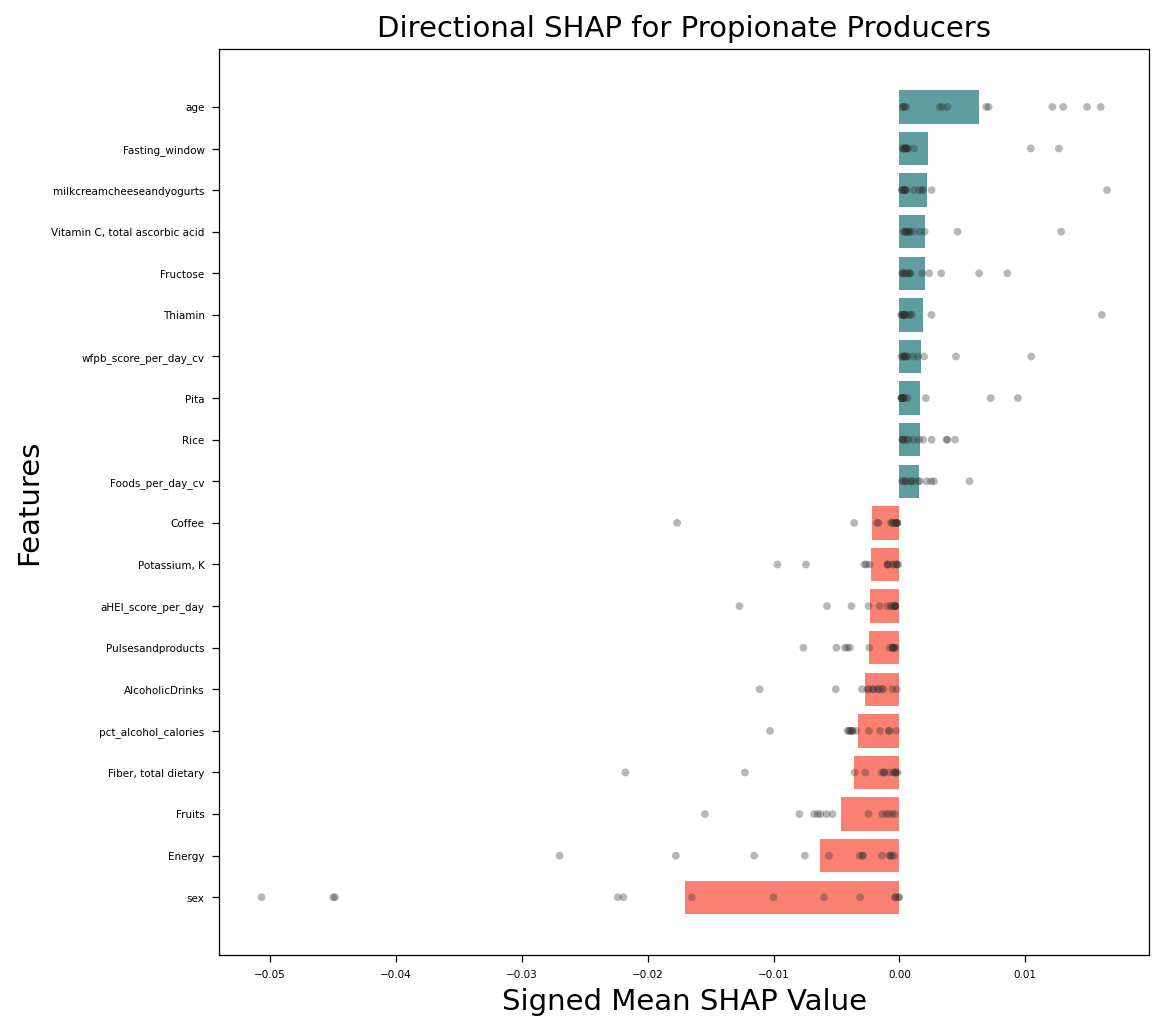

In [ ]:
propionate_pattern = (
    r'Akkermansia muciniphila|'
    r'Bacteroides fragilis|Bacteroides thetaiotaomicron|Bacteroides ovatus|'
    r'Bacteroides vulgatus|Bacteroides uniformis|'
    r'Coprococcus eutactus|'
    r'Dialister hominis|Dialister sp000434475|Dialister sp900543455|'
    r'Phascolarctobacterium faecium|'
    r'Roseburia inulinivorans|'
    r'Prevotella copri|'
    r'Veillonella atypica'
)

analyze_genus(propionate_pattern, title="Propionate Producers", directional=True)

Bifidobacterium longum
Bifidobacterium adolescentis
Bifidobacterium bifidum
Roseburia hominis
Anaerostipes hadrus
Roseburia inulinivorans
Anaerostipes amylophilus
Eubacterium_G ventriosum
Butyricicoccus_A intestinisimiae
Blautia_A wexlerae_C
Eubacterium_I ramulus_A
Eubacterium_I ramulus
Agathobaculum hominis
Faecalibacterium prausnitzii_E
Dialister hominis
Faecalibacterium prausnitzii_J
Faecalibacterium prausnitzii
Roseburia intestinalis
Lactococcus lactis
Bacteroides uniformis
Prevotella copri_B
Ruminococcus_E bromii_B
Phascolarctobacterium faecium
Agathobaculum butyriciproducens
Faecalibacterium prausnitzii_I
Coprococcus sp000154245
Escherichia coli
Anaerobutyricum soehngenii
Blautia_A wexlerae
Blautia_A obeum
Faecalibacterium duncaniae
Bacteroides thetaiotaomicron
Coprococcus sp000433075
Blautia_A wexlerae_B
Faecalibacterium prausnitzii_A
Collinsella bouchesdurhonensis
Faecalibacterium prausnitzii_D
Anaerobutyricum hallii
Faecalibacterium prausnitzii_F
Bacteroides fragilis
Veillonel

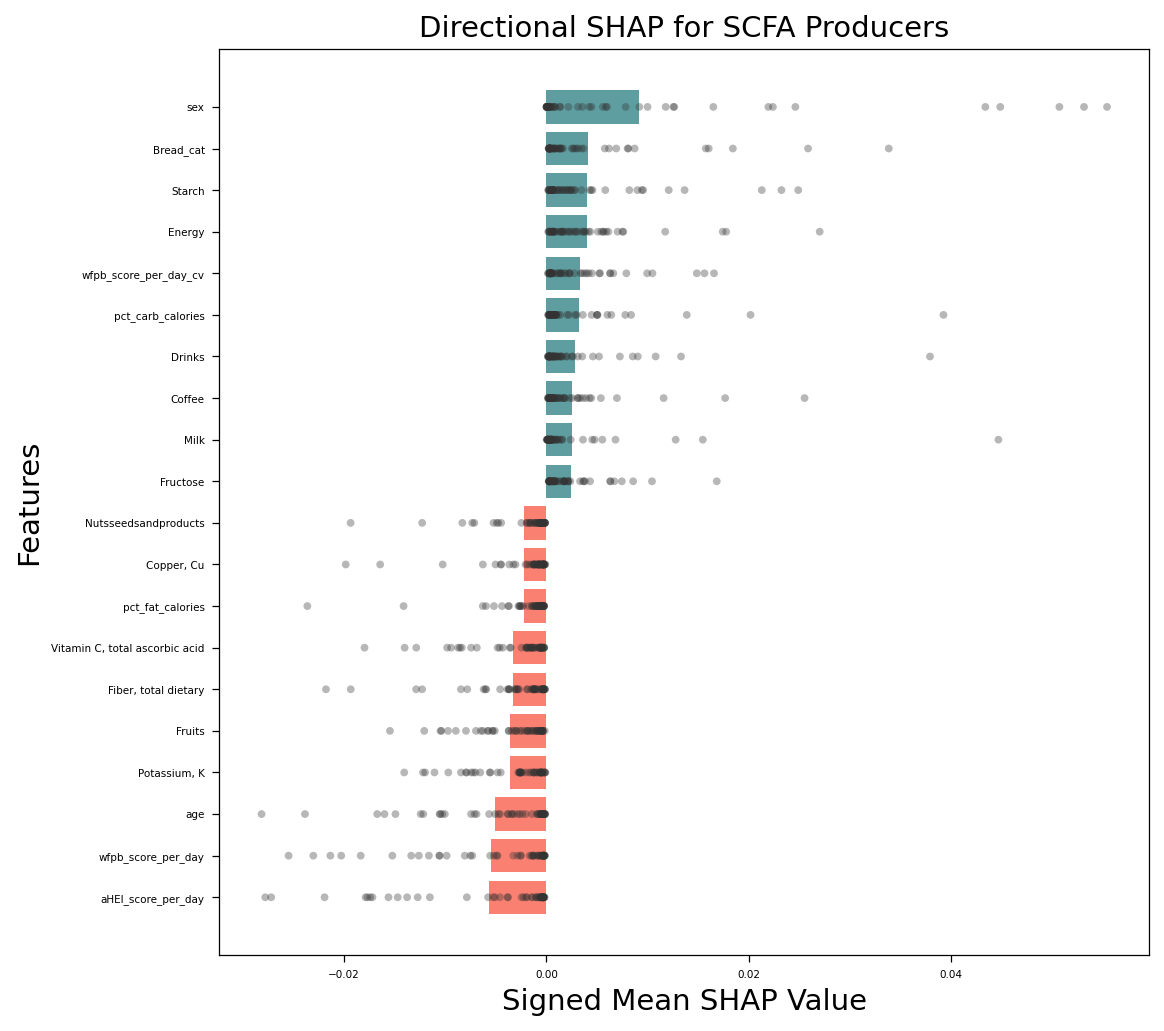

In [ ]:
scfa_pattern = butyrate_pattern + acetate_pattern + propionate_pattern

analyze_genus(scfa_pattern, title="SCFA Producers", directional=True)

Agathobacter rectalis
Roseburia hominis
Roseburia inulinivorans
Faecalibacterium prausnitzii_E
Faecalibacterium prausnitzii_J
Faecalibacterium prausnitzii
Odoribacter splanchnicus
Roseburia intestinalis
Bacteroides uniformis
Agathobaculum butyriciproducens
Fusicatenibacter saccharivorans
Faecalibacterium prausnitzii_I
Alistipes finegoldii
Faecalibacterium prausnitzii_A
Alistipes putredinis
Alistipes shahii
Faecalibacterium prausnitzii_D
Anaerobutyricum hallii
Adlercreutzia equolifaciens
Faecalibacterium prausnitzii_F
Faecalibacterium prausnitzii
237    0.302236
239    0.227815
230    0.209359
486    0.170518
490    0.166413
493    0.165343
136    0.162606
233    0.151717
673    0.143329
469    0.132392
266    0.126071
483    0.124413
712    0.109773
494    0.091038
706    0.090235
709    0.080984
501    0.076398
271    0.074573
438    0.074369
500    0.068010
497    0.032182
Name: 0, dtype: float64


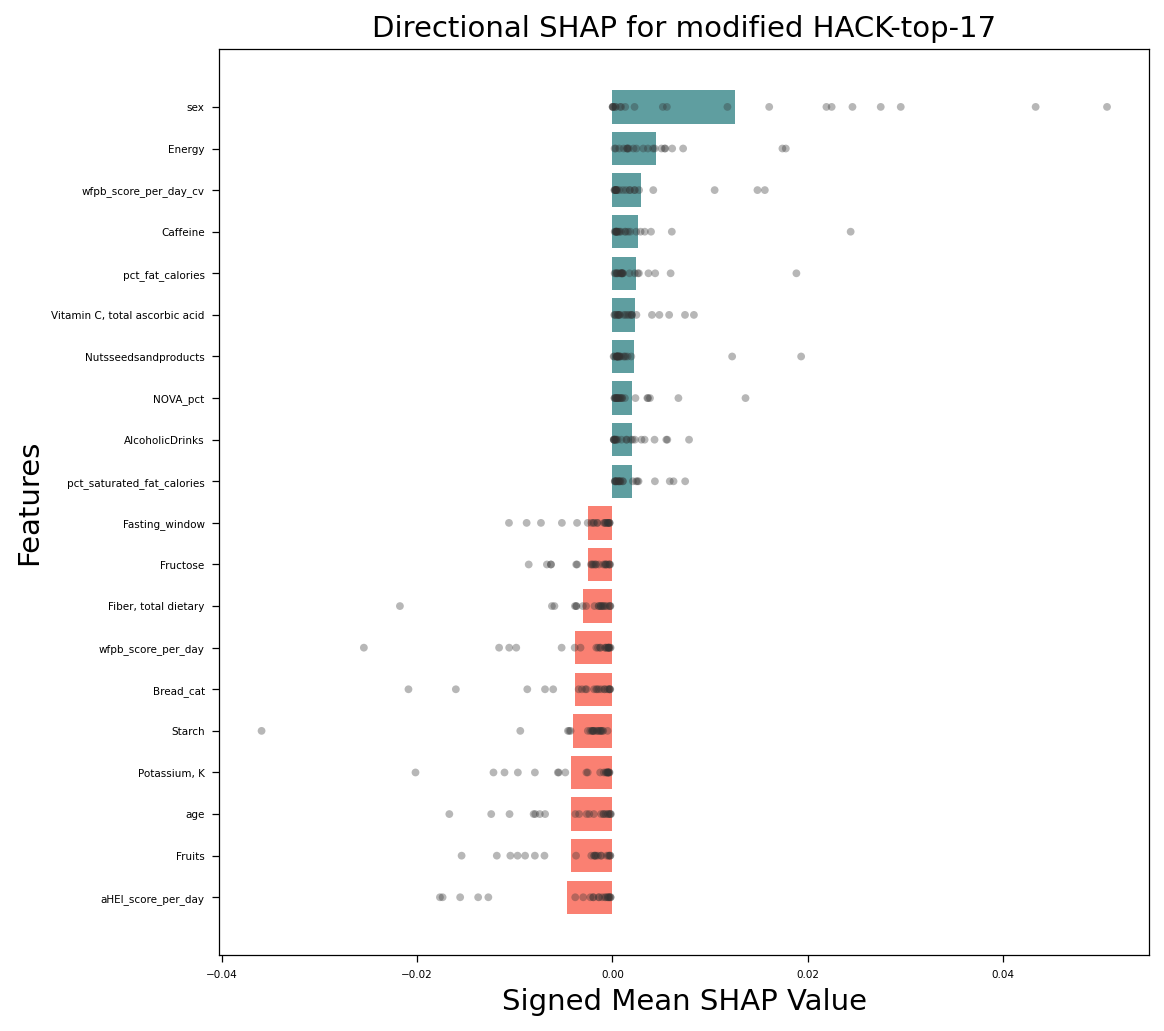

In [ ]:
HACK_pattern = (
    r'Faecalibacterium prausnitzii|'
    r'Bacteroides uniformis|'
    r'Lachnospira eligens_a|'
    r'Roseburia hominis|'
    r'Roseburia inulinivorans|'
    r'Agathobacter rectalis|'
    r'Alistipes putredinis|'
    r'Alistipes shahii|'
    r'Coprococcus_a catus|'
    r'Coprococcus_a catus_a|'
    r'Odoribacter splanchnicus|'
    r'Agathobaculum butyriciproducens|'
    r'Fusicatenibacter saccharivorans|'
    r'Roseburia intestinalis|'
    r'Alistipes finegoldii|'
    r'Anaerobutyricum hallii|'
    r'Adlercreutzia equolifaciens'
)

analyze_genus(HACK_pattern, title="modified HACK-top-17", directional=True)

### Disease promoting genera

Desulfovibrio sp900556755
Desulfovibrio sp900319575
Desulfovibrio piger_A
Desulfovibrio fairfieldensis
421    0.075691
425    0.062474
420    0.038868
422    0.032068
Name: 0, dtype: float64


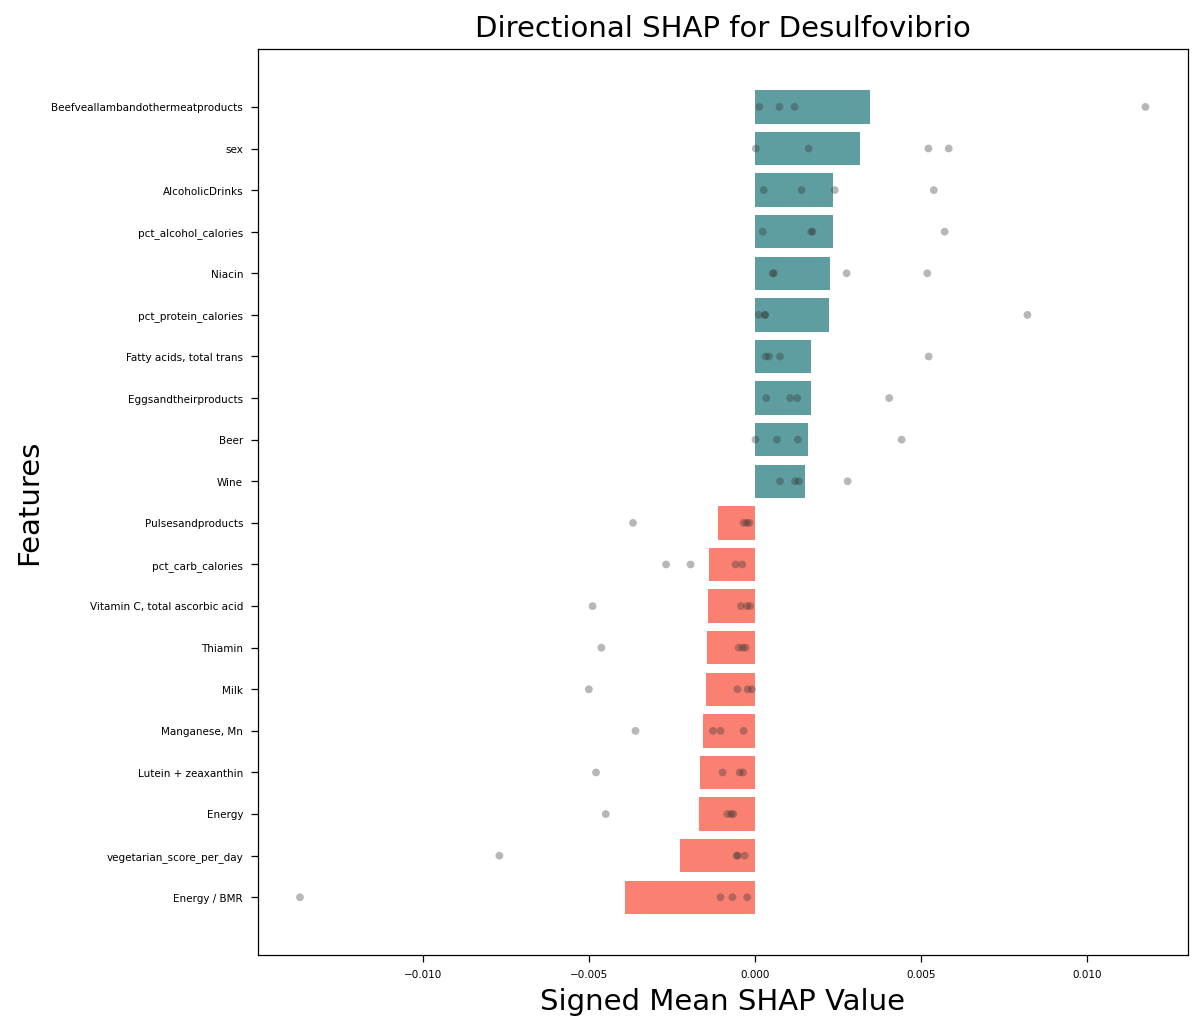

In [ ]:
analyze_genus('Desulfovibrio', title="Desulfovibrio", directional=True)

Bilophila wadsworthia
Lawsonibacter faecis
Parabacteroides distasonis
Odoribacter splanchnicus
Prevotella copri_B
Phascolarctobacterium faecium
Parabacteroides merdae
Escherichia coli
Eggerthella lenta
Holdemania filiformis
Klebsiella pneumoniae
Desulfovibrio sp900556755
Enterobacter hormaechei_B
Clostridium lentum
Streptococcus parasanguinis_C
Bacteroides fragilis
Desulfovibrio sp900319575
Veillonella atypica
Prevotella copri_A
Streptococcus parasanguinis
Desulfovibrio piger_A
Desulfovibrio fairfieldensis
424    0.169711
593    0.169462
695    0.163690
136    0.162606
380    0.141731
160    0.132476
698    0.119015
37     0.118969
439    0.109554
55     0.108328
38     0.096201
421    0.075691
39     0.075663
73     0.071808
52     0.065755
675    0.064710
425    0.062474
162    0.053034
383    0.050379
50     0.047883
420    0.038868
422    0.032068
Name: 0, dtype: float64


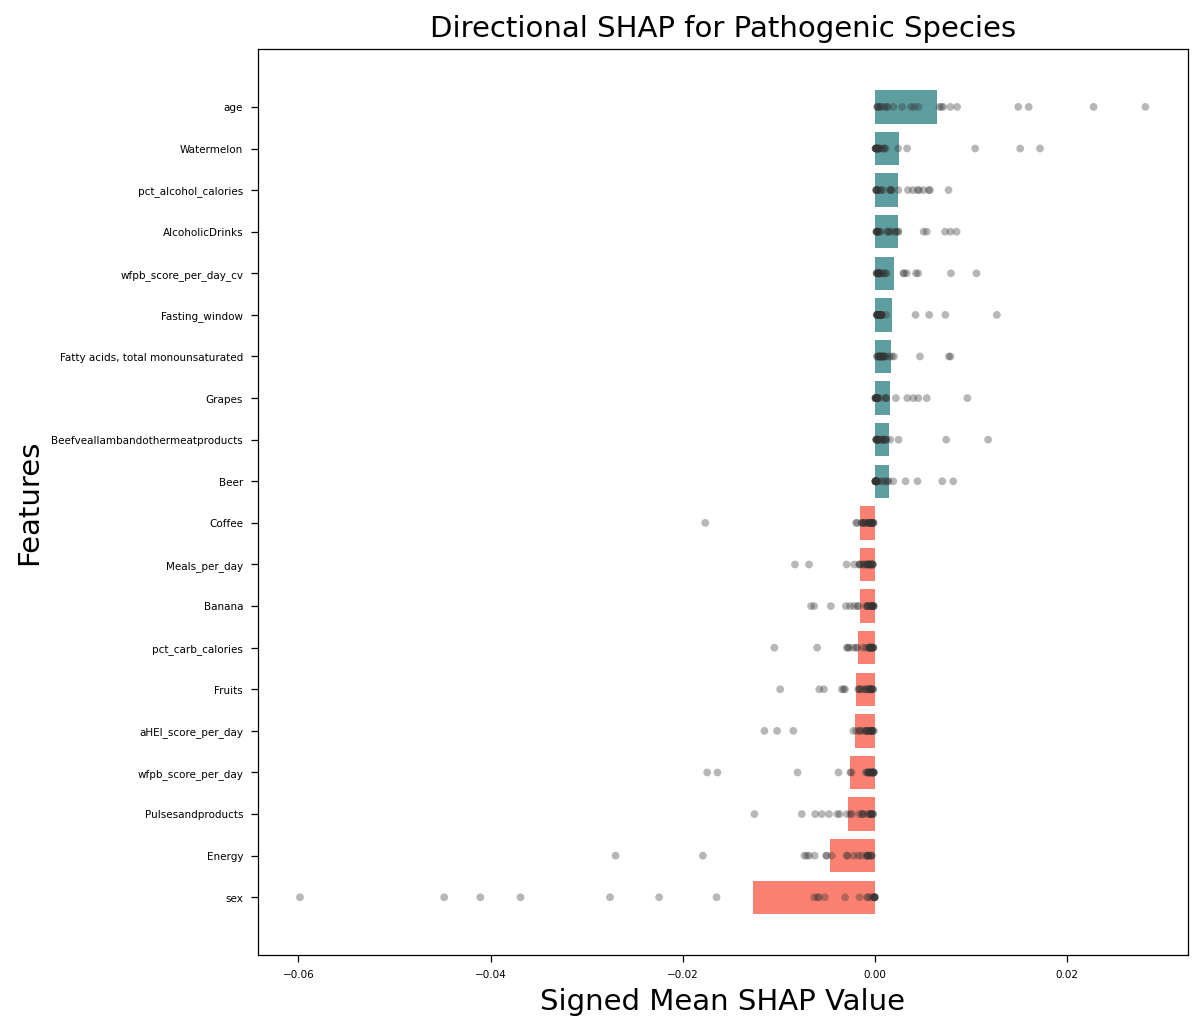

In [ ]:
pathogenic_pattern = (
    r'Clostridium difficile|Clostridium perfringens|Clostridium septicum|'
    r'Clostridium sordellii|Clostridium botulinum|Clostridium tetani|'
    r'Escherichia coli|Enterotoxigenic E\. coli|Enteropathogenic E\. coli|'
    r'Enterohemorrhagic E\. coli|Enteroaggregative E\. coli|Uropathogenic E\. coli|'
    r'Enterobacter cloacae|Enterobacter aerogenes|Enterobacter hormaechei|'
    r'Klebsiella pneumoniae|Klebsiella oxytoca|'
    r'Proteus mirabilis|Proteus vulgaris|'
    r'Salmonella|'
    r'Shigella|'
    r'Campylobacter jejuni|Campylobacter coli|'
    r'Helicobacter pylori|Helicobacter hepaticus|'
    r'Fusobacterium nucleatum|Fusobacterium varium|'
    r'Bacteroides fragilis|Bacteroides vulgatus|'
    r'Bilophila wadsworthia|'
    r'Clostridium lentum|'
    r'Eggerthella lenta|'
    r'Holdemania filiformis|'
    r'Lawsonibacter faecis|'
    r'Methanobrevibacter smithii|'
    r'Odoribacter splanchnicus|'
    r'Parabacteroides distasonis|Parabacteroides merdae|'
    r'Phascolarctobacterium faecium|'
    r'Prevotella copri|'
    r'Ruminococcus gnavus|Ruminococcus torques|'
    r'Streptococcus gallolyticus|Streptococcus mutans|Streptococcus pyogenes|'
    r'Streptococcus parasanguinis|'
    r'Staphylococcus aureus|'
    r'Veillonella parvula|Veillonella atypica|'
    r'Morganella morganii|'
    r'Eubacterium rectale|'
    r'Hafnia alvei|'
    r'Pseudomonas aeruginosa|'
    r'Mycobacterium avium paratuberculosis|'
    r'Desulfovibrio'
)


analyze_genus(pathogenic_pattern, title="Pathogenic Species", directional=True)

Bilophila wadsworthia
Escherichia coli
Eggerthella lenta
Klebsiella pneumoniae
Desulfovibrio piger_A
424    0.169711
37     0.118969
439    0.109554
38     0.096201
420    0.038868
Name: 0, dtype: float64


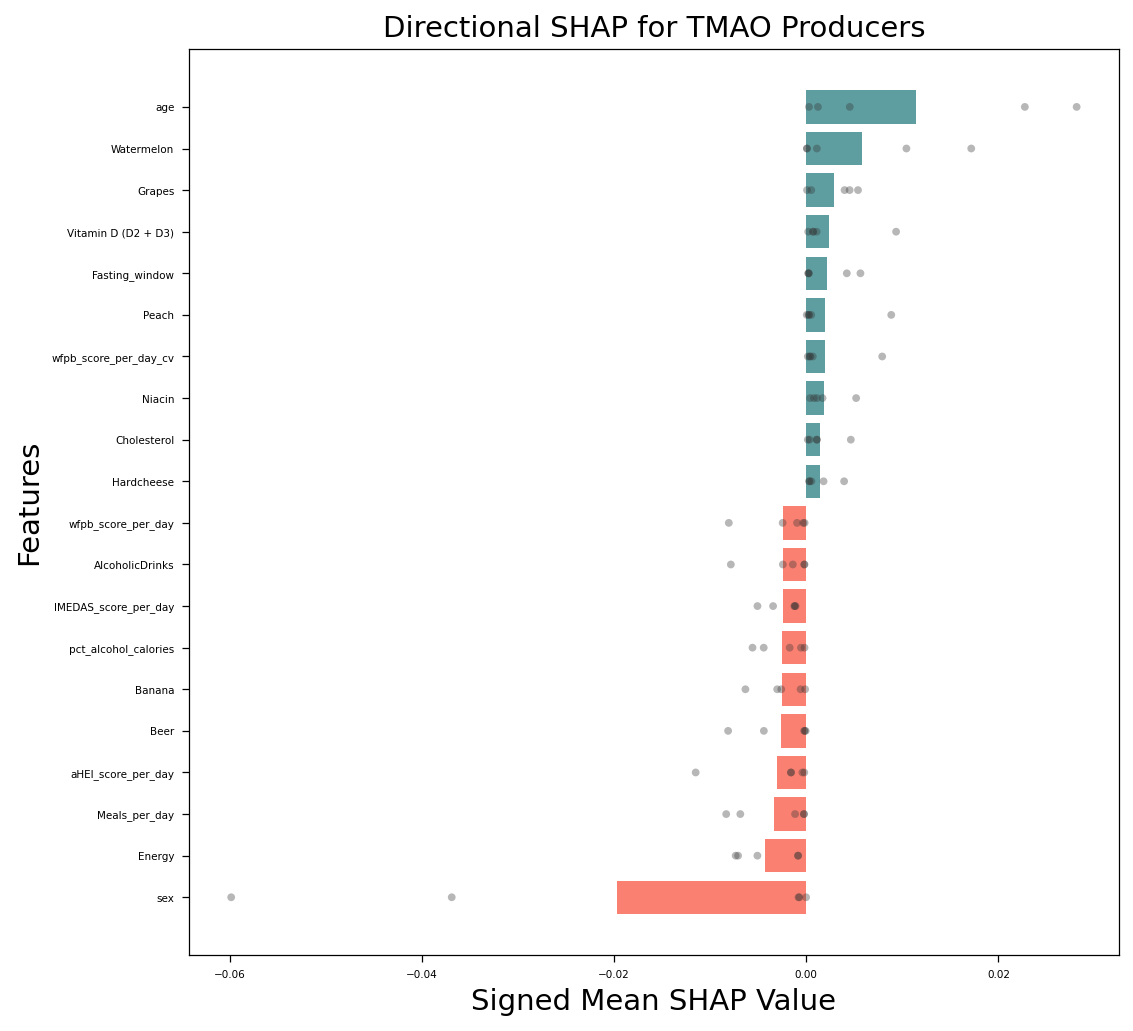

In [ ]:
tmao_pattern = (
    r'Bilophila wadsworthia|'
    r'Desulfovibrio piger|'
    r'Escherichia coli|'
    r'Eggerthella lenta|'
    r'Klebsiella pneumoniae|'
    r'Proteus mirabilis|Proteus vulgaris|'
    r'Ruminococcus gnavus|'
    r'Salmonella'
)

analyze_genus(tmao_pattern, title="TMAO Producers", directional=True)

### Noam's Plots - Finding Main Predictors

In [ ]:
mean_abs_shap_lgbm_abundance

,0,1,3,4,5,6,7,9,10,11,...,713,715,716,717,718,719,720,721,722,723
0,0.000007,0.000007,0.000031,0.000131,0.000016,0.000337,0.000000,0.000007,0.001650,0.000051,...,0.000007,0.000016,0.000000,0.000039,0.000000,0.000000,0.000000,0.000157,0.000017,0.000000
1,0.000071,0.000016,0.000054,0.000046,0.000024,0.000000,0.000018,0.000097,0.000000,0.000003,...,0.000020,0.000007,0.000106,0.000021,0.000223,0.000000,0.000000,0.000000,0.000018,0.000000
2,0.000360,0.000000,0.000031,0.000161,0.000752,0.000014,0.000038,0.000107,0.000467,0.000147,...,0.000483,0.000845,0.000285,0.000029,0.000481,0.000153,0.000013,0.001172,0.000389,0.000322
3,0.000158,0.000000,0.000000,0.000000,0.000021,0.000000,0.000005,0.000022,0.000000,0.000016,...,0.000000,0.000000,0.000010,0.000585,0.000026,0.000101,0.000000,0.000000,0.000032,0.000000
4,0.000020,0.000000,0.000000,0.000004,0.000107,0.000014,0.000028,0.000055,0.000794,0.000000,...,0.000093,0.000026,0.000032,0.000110,0.000030,0.000137,0.000000,0.000094,0.000013,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000402,0.000178,0.000174,0.000469,0.000113,0.001995,0.000250,0.000965,0.000170,0.000104,...,0.001293,0.000436,0.000258,0.000148,0.000074,0.000150,0.000247,0.000081,0.000150,0.000068
696,0.000421,0.001009,0.000665,0.000460,0.000843,0.001028,0.001824,0.001686,0.001293,0.000652,...,0.002112,0.000195,0.003634,0.002033,0.005783,0.000336,0.000594,0.000722,0.000173,0.001049
697,0.003380,0.010083,0.017522,0.003861,0.000958,0.006327,0.006545,0.013022,0.000856,0.001152,...,0.000559,0.001344,0.007692,0.002013,0.000813,0.000584,0.000918,0.000388,0.000917,0.000210
698,0.000208,0.000063,0.029013,0.003368,0.006677,0.003824,0.024507,0.044985,0.011485,0.000027,...,0.054918,0.000569,0.045005,0.000138,0.000074,0.000843,0.000039,0.005119,0.003938,0.000108


Top 100 indices from lgbm_diet_scores: Int64Index([594,  46, 223,  34, 221, 507,  32, 586, 309, 237, 579, 201,  76,
            191, 190, 610, 573, 242,  33, 297, 203,  30, 186, 451, 282, 611,
            155, 480, 246, 284, 574, 239, 517, 272, 243, 280, 511, 225, 226,
            200, 609, 196, 254,  28, 584, 457, 608, 231, 238, 467],
           dtype='int64')
Subset of mean_abs_shap using top 100 indices:
           594        46       223        34       221       507        32  \
0   -0.000000  0.000000  0.000000 -0.000007  0.000005  0.000015 -0.000009   
1   -0.000000 -0.000000  0.000049 -0.000000  0.000023 -0.000000 -0.000000   
2   -0.000040 -0.000019  0.000065 -0.000196  0.000048  0.000173 -0.000032   
3    0.000000 -0.000000  0.000193 -0.000000  0.000035  0.000000 -0.000000   
4   -0.000017 -0.000006  0.000000 -0.000000  0.000021 -0.000026 -0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
695  0.000351  0.030206 -0.000073  0.000465 -0.00

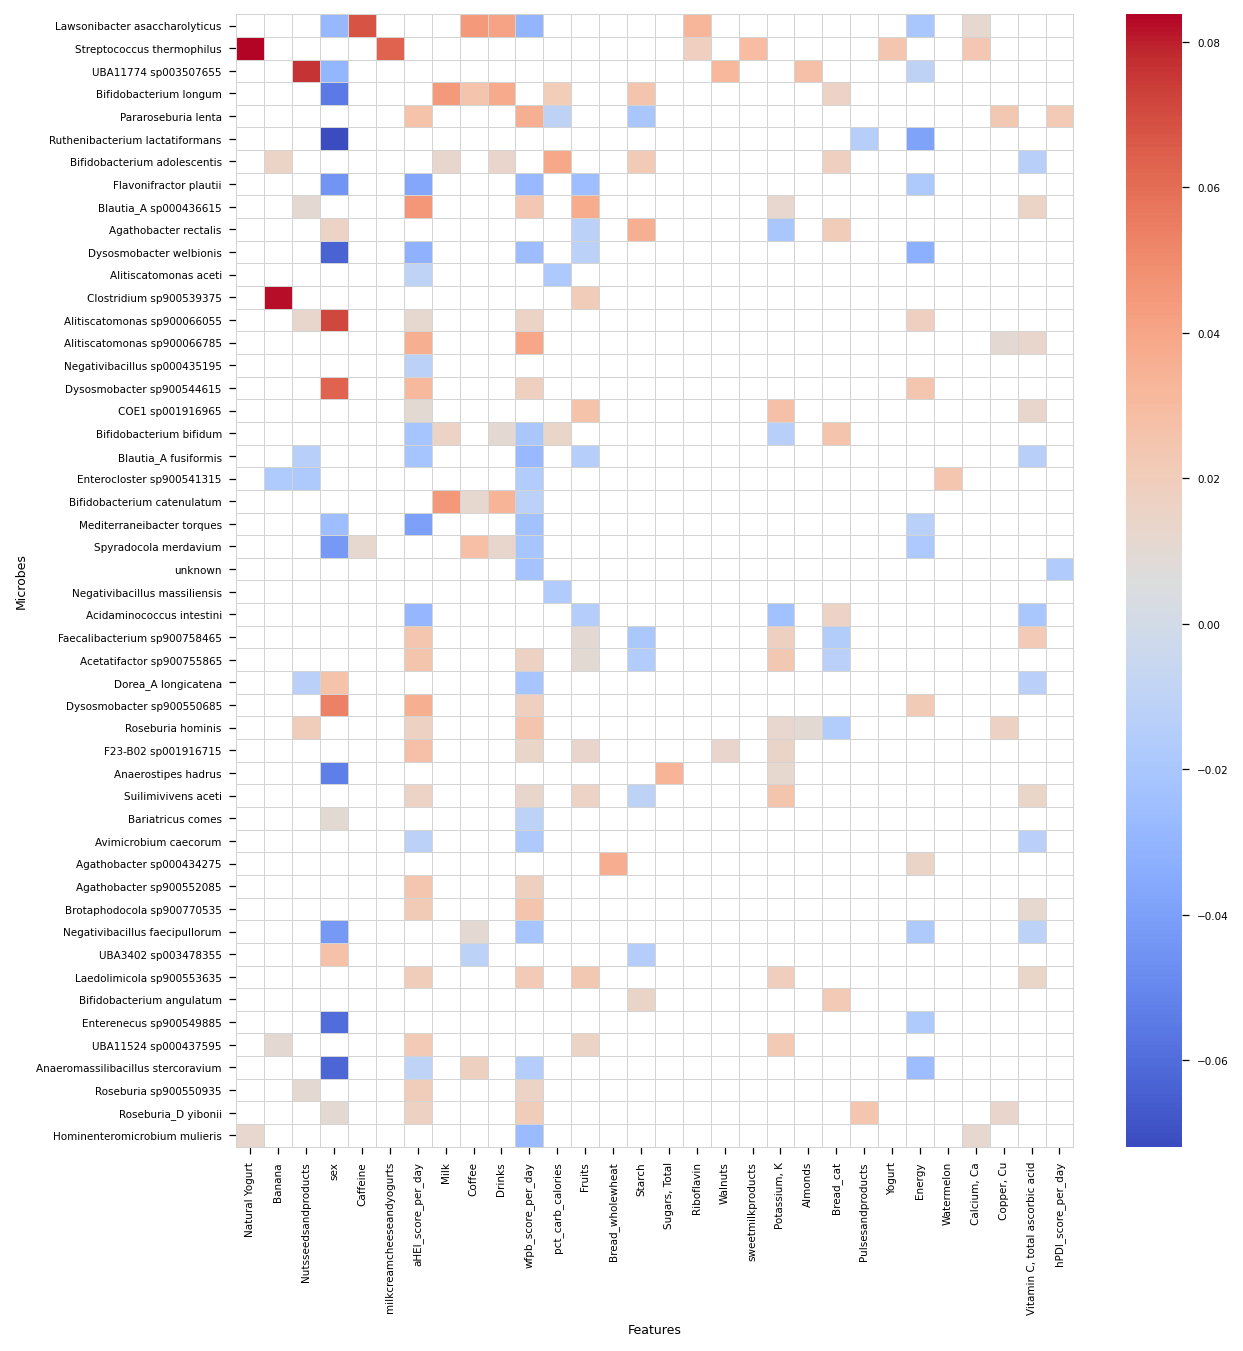

In [ ]:
def main_predictors_heatmap(mean_abs_df, cluster=False):  
    plt.style.use(double_style)
    # Step 1: Extract the indices of the top 100 highest correlated microbes
    # top_100_indices = predictive_gain.sort_values(ascending=False)
    top_100_indices = lgbm_diet_scores.sort_values(ascending=False)
    top_100_indices = top_100_indices.head(50).index
    print("Top 100 indices from lgbm_diet_scores:", top_100_indices)

    # Step 2: Subset mean_abs_shap using these indices
    # mean_abs_shap_top_100 = mean_abs_shap_lgbm_abundance.iloc[top_100_indices]
    top_100_indices_str = [str(i) for i in top_100_indices]
    mean_abs_shap_top_100 = mean_abs_df[top_100_indices_str]
    print("Subset of mean_abs_shap using top 100 indices:\n", mean_abs_shap_top_100)

    # selected_columns = (
    #     mean_abs_shap_lgbm_abundance.max().nlargest(100).index
    # )

    # # Creating a new DataFrame with the selected columns
    # mean_abs_shap_top_100 = mean_abs_shap_lgbm_abundance[selected_columns]
    # print("Subset of mean_abs_shap using 100 microbes with highest max shap:\n", mean_abs_shap_top_100)

    # Step 3: Identify the 30 features with the highest maximum mean_abs_shap values
    top_30_features = mean_abs_shap_top_100.max(axis=1).nlargest(30).index
    print("Top 30 features with highest max mean_abs_shap values:", top_30_features)

    # Step 4: Subset the DataFrame to include only the selected features
    # heatmap_data = mean_abs_shap_top_100[top_30_features]
    heatmap_data = mean_abs_shap_top_100.iloc[top_30_features]
    print("Final heatmap data shape:", heatmap_data.shape)
    print("Sample of heatmap data:\n", heatmap_data.head())

    percentile_99 = heatmap_data.quantile(0.99).max()
    percentile_1 = heatmap_data.quantile(0.01).min()
    print("99th percentile value:", percentile_99)
    print("1st percentile value:", percentile_1)


    # Step 5: Rename the axis labels
    heatmap_data = heatmap_data.T
    # Replace x-axis (columns) with corresponding feature names
    heatmap_data.columns = [all_features[int(i)] for i in top_30_features]

    # Replace y-axis (rows) with corresponding target names
    heatmap_data.index = [map_df.loc[int(i), 'Microbe_Name'] for i in top_100_indices]

    print("Updated column labels (features):", heatmap_data.columns.tolist())
    print("Updated row labels (targets):", heatmap_data.index.tolist())

    # Step 6: Plot the heatmap
    # Define a threshold below which values are considered "gray" and should be white
    zero_threshold = 0.01  # you can increase this to 1e-3 or 1e-2 if your values are small

    # Create a mask for values below the threshold
    mask = heatmap_data.abs() < zero_threshold

    # Plot with mask
    if cluster:
        cell_height = 0.2  # try 0.2–0.3
        fig_height = len(heatmap_data) * cell_height
        # fig_width = len(heatmap_data.columns) * cell_width
        fig_width = plt.rcParams['figure.figsize'][0]  # use default width
        cell_width = fig_width / len(heatmap_data.columns)

        plt.figure(figsize=(fig_width, fig_height))
        ax = sns.clustermap(
            heatmap_data,
            cmap="coolwarm",
            annot=False,
            vmax=percentile_99,
            vmin=percentile_1,
            mask=mask,
            cbar=True,
            linewidths=0.5,
            linecolor='lightgray'
        )
    else:
        cell_height = 0.2  # try 0.2–0.3
        cell_width = 0.3
        fig_height = len(heatmap_data) * cell_height
        fig_width = len(heatmap_data.columns) * cell_width

        plt.figure(figsize=(fig_width, fig_height))
        ax = sns.heatmap(
            heatmap_data,
            cmap="coolwarm",
            annot=False,
            vmax=percentile_99,
            vmin=percentile_1,
            mask=mask,
            cbar=True,
            linewidths=0.4,
            linecolor='lightgray'
        )
    
    # Set labels and ticks using the correct axes object 'ax'
    ax.set_xlabel("Features")
    ax.set_ylabel("Microbes")
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    
    # Modify the color bar ticks
    ax.figure.axes[-1].tick_params()

    # Now this loop is guaranteed to modify the heatmap's border
    for spine in ax.spines.values():
        spine.set_visible(True) # Ensure the spine is visible
        spine.set_edgecolor('lightgray')
        spine.set_linewidth(0.5)

    if cluster:
        plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/shap_main_predictors_mean_abs{aggregation}_clustered.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight', pad_inches=0.02)
        plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/shap_main_predictors_mean_abs{aggregation}_clustered.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight', pad_inches=0.02, format='pdf')
    else:
        plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/shap_main_predictors_mean_abs{aggregation}.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
        plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/shap_main_predictors_mean_abs{aggregation}.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight',format='pdf')
    plt.show()


if aggregate_features:
    mean_abs_df = mean_abs_shap_lgbm_abundance_agg
else:
    # mean_abs_df = mean_abs_shap_lgbm_abundance
    mean_abs_df = signed_mean_abs_shap


main_predictors_heatmap(mean_abs_df, cluster=False)


Top 30 indices from lgbm_diet_scores: Int64Index([594,  46, 223,  34, 221, 507,  32, 586, 309, 237, 579, 201,  76,
            191, 190, 610, 573, 242,  33, 297, 203,  30, 186, 451, 282, 611,
            155, 480, 246, 284, 574, 239, 517, 272, 243, 280, 511, 225, 226,
            200],
           dtype='int64')
Subset of mean_abs_shap using top 30 indices:
           594        46       223        34       221       507        32  \
0   -0.000000  0.000000  0.000000 -0.000007  0.000005  0.000015 -0.000009   
1   -0.000000 -0.000000  0.000049 -0.000000  0.000023 -0.000000 -0.000000   
2   -0.000040 -0.000019  0.000065 -0.000196  0.000048  0.000173 -0.000032   
3    0.000000 -0.000000  0.000193 -0.000000  0.000035  0.000000 -0.000000   
4   -0.000017 -0.000006  0.000000 -0.000000  0.000021 -0.000026 -0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
695  0.000351  0.030206 -0.000073  0.000465 -0.000051  0.000774  0.000329   
696  0.000688 -0.000268 

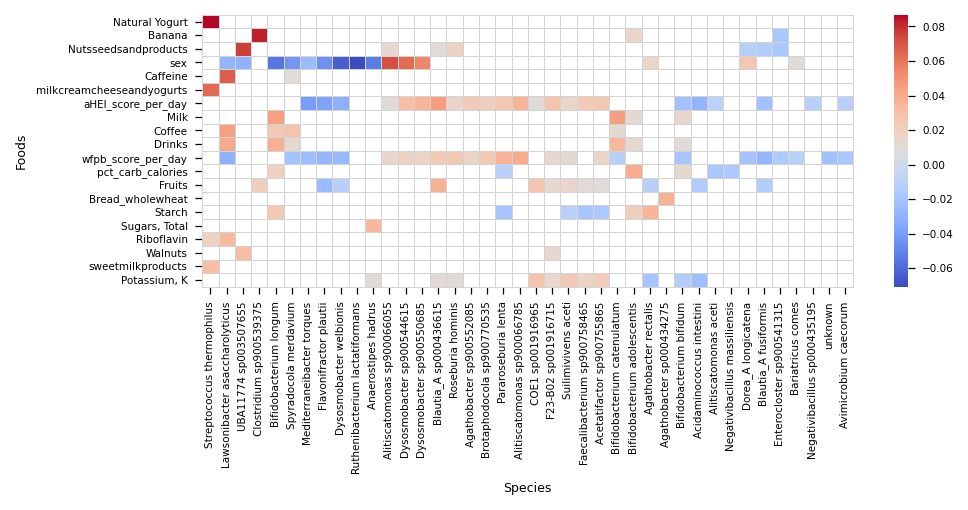

In [ ]:
def main_predictors_heatmap_flat(mean_abs_df, cluster=False):
    plt.style.use(double_style)
    # Step 1: Extract the indices of the top 30 highest scoring microbes
    top_30_indices = lgbm_diet_scores.sort_values(ascending=False).head(40).index
    print("Top 30 indices from lgbm_diet_scores:", top_30_indices)

    # Step 2: Subset mean_abs_df using these microbe indices (columns)
    top_30_indices_str = [str(i) for i in top_30_indices]
    mean_abs_shap_top = mean_abs_df[top_30_indices_str]
    print("Subset of mean_abs_shap using top 30 indices:\n", mean_abs_shap_top)

    # Step 3: Identify the 20 foods (features) with the highest maximum mean_abs_shap across the selected microbes
    top_20_features = mean_abs_shap_top.max(axis=1).nlargest(20).index
    print("Top 20 features with highest max mean_abs_shap values:", top_20_features)

    # Step 4: Subset the DataFrame to include only the selected foods (rows)
    heatmap_data = mean_abs_shap_top.loc[top_20_features]
    print("Final heatmap data shape (foods x species):", heatmap_data.shape)
    print("Sample of heatmap data:\n", heatmap_data.head())

    percentile_99 = heatmap_data.quantile(0.99).max()
    percentile_1 = heatmap_data.quantile(0.01).min()
    print("99th percentile value:", percentile_99)
    print("1st percentile value:", percentile_1)

    # Step 5: Rename the axis labels - foods as rows, species as columns
    # Foods (rows)
    heatmap_data.index = [all_features[int(i)] for i in top_20_features]
    # Species (columns)
    heatmap_data.columns = [map_df.loc[int(i), 'Microbe_Name'] for i in top_30_indices]

    print("Updated row labels (foods):", heatmap_data.index.tolist())
    print("Updated column labels (species):", heatmap_data.columns.tolist())

    # Step 6: Optional clustering - columns only (species). Do not change rows order.
    if cluster and heatmap_data.shape[1] > 1:
        from scipy.cluster.hierarchy import linkage, leaves_list
        from scipy.spatial.distance import pdist

        col_dist = pdist(heatmap_data.values.T, metric='euclidean')
        Zc = linkage(col_dist, method='average')
        col_order = leaves_list(Zc)
        heatmap_data = heatmap_data.iloc[:, col_order]

    # Plot (keep same figure shape behavior)
    zero_threshold = 0.01
    mask = heatmap_data.abs() < zero_threshold

    plt.figure()
    ax = sns.heatmap(
        heatmap_data,
        cmap="coolwarm",
        annot=False,
        vmax=percentile_99,
        vmin=percentile_1,
        mask=mask,
        cbar=True,
        linewidths=0.4,
        linecolor='lightgray'
    )

    # Axes and colorbar handles
    heat_ax = ax
    cbar_ax = ax.figure.axes[-1]

    heat_ax.set_xlabel("Species")
    heat_ax.set_ylabel("Foods")
    heat_ax.tick_params(axis='x')
    heat_ax.tick_params(axis='y')

    # Colorbar ticks
    cbar_ax.tick_params()

    # Heatmap border
    for spine in heat_ax.spines.values():
        spine.set_visible(True)
        spine.set_edgecolor('lightgray')
        spine.set_linewidth(0.5)

    # Updated save names
    if cluster:
        plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/shap_main_predictors{aggregation}_clustered_flat.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight', pad_inches=0.02)
        plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/shap_main_predictors{aggregation}_clustered_flat.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight', pad_inches=0.02, format='pdf')
    else:
        plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/shap_main_predictors{aggregation}.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
        plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/shap_main_predictors{aggregation}.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight', format='pdf')
    plt.show()


# keep your existing selection logic
if aggregate_features:
    mean_abs_df = mean_abs_shap_lgbm_abundance_agg
else:
    mean_abs_df = signed_mean_abs_shap

# call with cluster=True to apply the flat clustering without dendrogram
main_predictors_heatmap_flat(mean_abs_df, cluster=True)


Top 30 indices from lgbm_diet_scores: Int64Index([594,  46, 223,  34, 221, 507,  32, 586, 309, 237, 579, 201,  76,
            191, 190, 610, 573, 242,  33, 297, 203,  30, 186, 451, 282, 611,
            155, 480, 246, 284, 574, 239, 517, 272, 243, 280, 511, 225, 226,
            200],
           dtype='int64')
Subset of mean_abs_shap using top 30 indices:
           594        46       223        34       221       507        32  \
0   -0.000000  0.000000  0.000000 -0.000007  0.000005  0.000015 -0.000009   
1   -0.000000 -0.000000  0.000049 -0.000000  0.000023 -0.000000 -0.000000   
2   -0.000040 -0.000019  0.000065 -0.000196  0.000048  0.000173 -0.000032   
3    0.000000 -0.000000  0.000193 -0.000000  0.000035  0.000000 -0.000000   
4   -0.000017 -0.000006  0.000000 -0.000000  0.000021 -0.000026 -0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
695  0.000351  0.030206 -0.000073  0.000465 -0.000051  0.000774  0.000329   
696  0.000688 -0.000268 

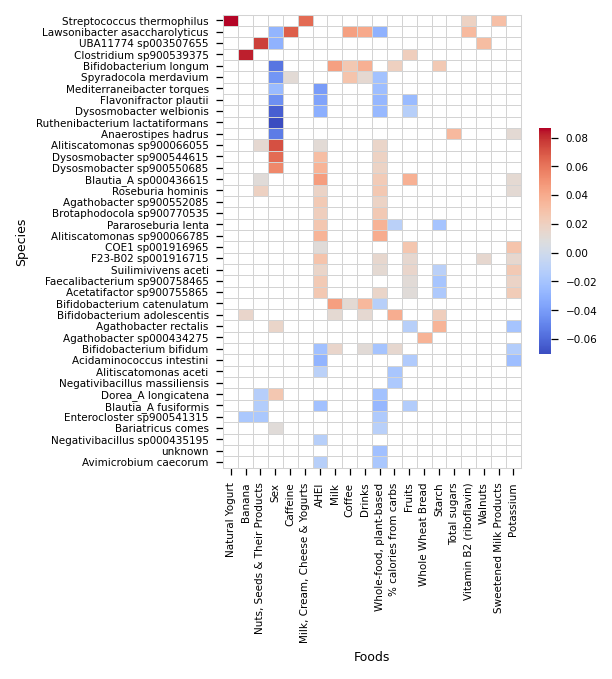

In [ ]:
def main_predictors_heatmap_long(mean_abs_df, cluster=False):
    plt.style.use(single_style)
    # Step 1: Extract the indices of the top 30 highest scoring microbes
    top_30_indices = lgbm_diet_scores.sort_values(ascending=False).head(40).index
    print("Top 30 indices from lgbm_diet_scores:", top_30_indices)

    # Step 2: Subset mean_abs_df using these microbe indices (columns)
    top_30_indices_str = [str(i) for i in top_30_indices]
    mean_abs_shap_top = mean_abs_df[top_30_indices_str]
    print("Subset of mean_abs_shap using top 30 indices:\n", mean_abs_shap_top)

    # Step 3: Identify the 20 foods (features) with the highest maximum mean_abs_shap across the selected microbes
    top_20_features = mean_abs_shap_top.max(axis=1).nlargest(20).index
    print("Top 20 features with highest max mean_abs_shap values:", top_20_features)

    # Step 4: Subset the DataFrame to include only the selected foods (rows)
    heatmap_data = mean_abs_shap_top.loc[top_20_features]
    print("Final heatmap data shape before transpose (foods x species):", heatmap_data.shape)
    print("Sample of heatmap data:\n", heatmap_data.head())

    percentile_99 = heatmap_data.quantile(0.99).max()
    percentile_1 = heatmap_data.quantile(0.01).min()
    print("99th percentile value:", percentile_99)
    print("1st percentile value:", percentile_1)

    # ---- Change to long: species as rows, foods as columns ----
    heatmap_data = heatmap_data.T  # now species x foods
    print("Final heatmap data shape after transpose (species x foods):", heatmap_data.shape)

    # Rename the axis labels - species as rows, foods as columns
    # Species (rows)
    heatmap_data.index = [map_df.loc[int(i), 'Microbe_Name'] for i in top_30_indices]
    # Foods (columns)
    heatmap_data.columns = [all_features[int(i)] for i in top_20_features]
    heatmap_data.columns = [diet_rename_dict.get(c, c) for c in heatmap_data.columns]

    print("Updated row labels (species):", heatmap_data.index.tolist())
    print("Updated column labels (foods):", heatmap_data.columns.tolist())

    # Optional clustering - rows only (species). Do not change columns order.
    if cluster and heatmap_data.shape[0] > 1:
        from scipy.cluster.hierarchy import linkage, leaves_list
        from scipy.spatial.distance import pdist

        row_dist = pdist(heatmap_data.values, metric='euclidean')
        Zr = linkage(row_dist, method='average')
        row_order = leaves_list(Zr)
        heatmap_data = heatmap_data.iloc[row_order, :]  # reorders rows only

    # Plot (keep same figure shape behavior)
    zero_threshold = 0.01
    mask = heatmap_data.abs() < zero_threshold

    cell_height = 0.1  # try 0.2–0.3
    fig_height = len(heatmap_data) * cell_height
    fig_width = plt.rcParams['figure.figsize'][0]  # use default width
    plt.figure(figsize=(fig_width, fig_height))
    ax = sns.heatmap(
        heatmap_data,
        cmap="coolwarm",
        annot=False,
        vmax=percentile_99,
        vmin=percentile_1,
        mask=mask,
        cbar=True,
        cbar_kws={"shrink": 0.5},
        linewidths=0.4,
        linecolor='lightgray'
    )

    # Axes and colorbar handles
    heat_ax = ax
    cbar_ax = ax.figure.axes[-1]

    heat_ax.set_xlabel("Foods")
    heat_ax.set_ylabel("Species")
    heat_ax.tick_params(axis='x', labelsize=5)
    heat_ax.tick_params(axis='y', labelsize=5)
    

    # Colorbar ticks
    cbar_ax.tick_params()

    # Heatmap border
    for spine in heat_ax.spines.values():
        spine.set_visible(True)
        spine.set_edgecolor('lightgray')
        spine.set_linewidth(0.5)

    # Updated save names
    if cluster:
        plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/shap_main_predictors{aggregation}_clustered.png", dpi=400, facecolor="white", transparent=False, bbox_inches='tight', pad_inches=0.02)
        plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/shap_main_predictors{aggregation}_clustered.pdf", dpi=400, facecolor="white", transparent=False, bbox_inches='tight', pad_inches=0.02, format='pdf')
    else:
        plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/shap_main_predictors{aggregation}.png", dpi=400, facecolor="white", transparent=False, bbox_inches='tight')
        plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/shap_main_predictors{aggregation}.pdf", dpi=400, facecolor="white", transparent=False, bbox_inches='tight', format='pdf')
    plt.show()


# keep your existing selection logic
if aggregate_features:
    mean_abs_df = mean_abs_shap_lgbm_abundance_agg
else:
    mean_abs_df = signed_mean_abs_shap

# call with cluster=True to apply the flat clustering without dendrogram
main_predictors_heatmap_long(mean_abs_df, cluster=True)


In [ ]:
# # Assume `mean_abs_shap_lgbm_abundance` and `lgbm_diet_scores` DataFrames are already loaded

# # Step 1: Extract the indices of the top 100 highest correlated microbes
# top_100_indices = lgbm_diet_scores.sort_values(ascending=False).head(100).index
# print("Top 100 indices from lgbm_diet_scores:", top_100_indices)

# # Step 2: Subset mean_abs_shap using these indices
# top_100_indices_str = [str(i) for i in top_100_indices]
# shap_values_top_100 = mean_abs_shap_lgbm_abundance[top_100_indices_str]
# print("Subset of mean_abs_shap using top 100 indices:\n", shap_values_top_100)

# # Step 3: Compute ranks
# ranks = shap_values_top_100.rank(ascending=False)

# # # Step 4: Identify the 30 features with the lowest average ranks
# # # top_30_features = ranks.mean(axis=1).nsmallest(30).index
# # top_30_features = ranks.min(axis=1).nsmallest(30).index
# # print("Top 30 features with lowest mean ranks:", top_30_features)

# top_30_features = ranks[ranks.min(axis=1) <= 2].index
# print("Features with a min rank of 1.0:", top_30_features)


# # Step 5: Subset the DataFrame to include only the selected features
# heatmap_data = shap_values_top_100.loc[top_30_features]
# print("Final heatmap data shape:", heatmap_data.shape)
# print("Sample of heatmap data:\n", heatmap_data.head())

# # Step 6: Rename the axis labels
# heatmap_data = heatmap_data.T
# # Replace x-axis (columns) with corresponding feature names
# heatmap_data.columns = [all_features[int(i)] for i in top_30_features]

# # Replace y-axis (rows) with corresponding target names
# heatmap_data.index = [map_df.loc[int(i), 'Microbe_Name'] for i in top_100_indices]

# print("Updated column labels (features):", heatmap_data.columns.tolist())
# print("Updated row labels (targets):", heatmap_data.index.tolist())

# # Step 7: Plot the heatmap
# plt.figure(figsize=(12, 20))
# sns.heatmap(heatmap_data, cmap="viridis", annot=False)
# plt.title("Top 100 Correlated Microbes vs. Top Features (Based on Minimum Rank)")
# plt.xlabel("Features")
# plt.ylabel("Microbes")
# # plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/shap_main_predictors_mean_rank.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
# plt.show()


### Count Main Predictors

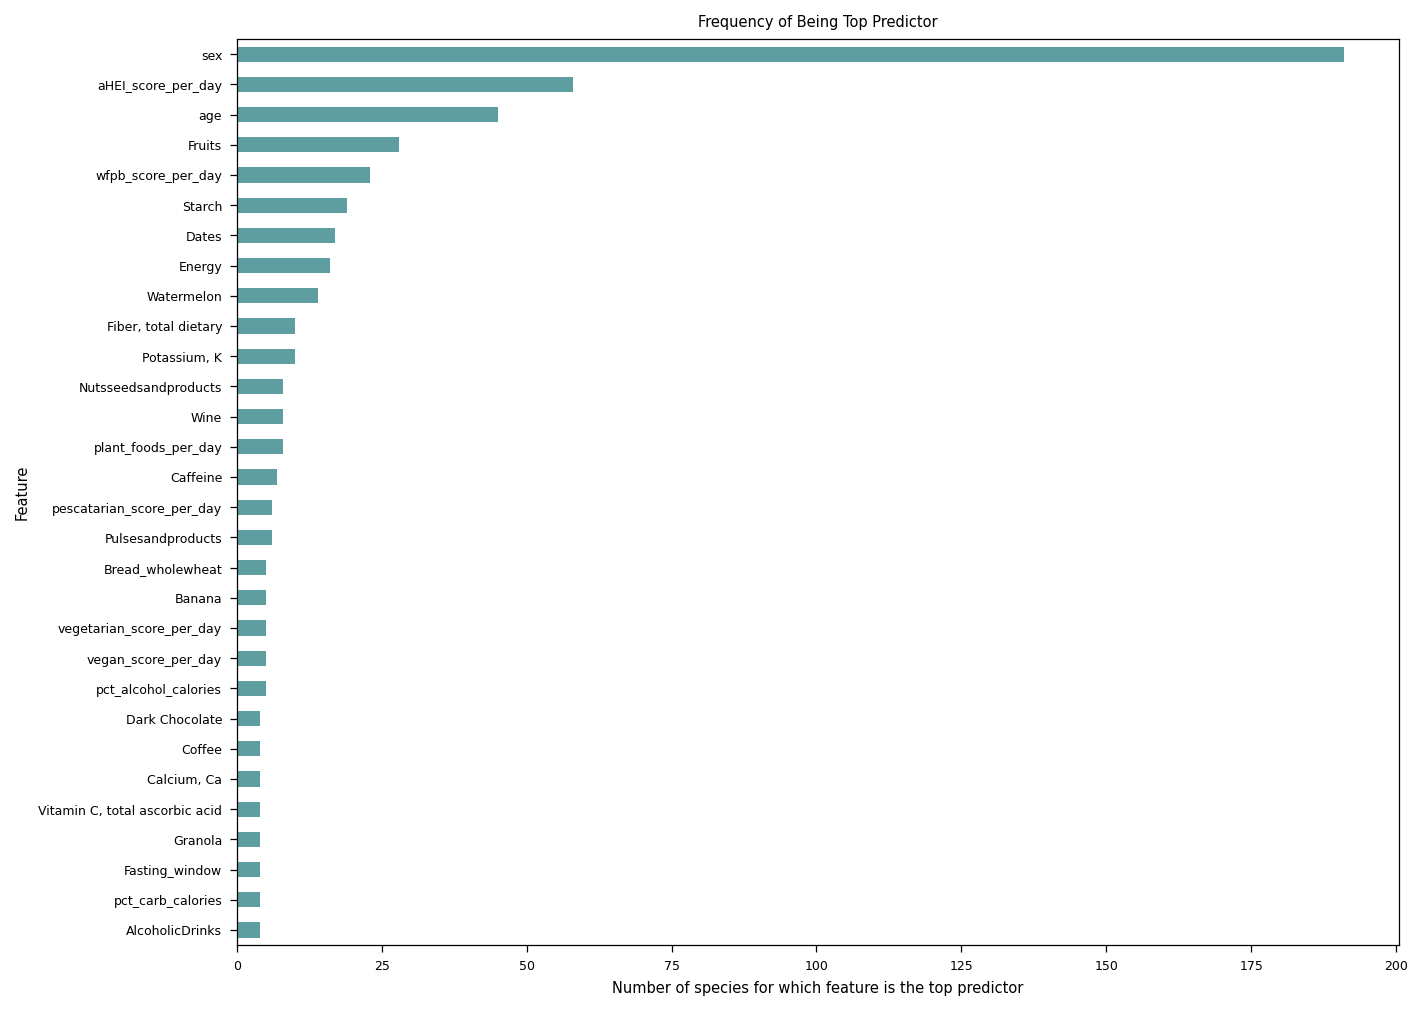

In [ ]:
# Step 1: For each target (column), find the feature (row) with the max SHAP value
top_predictors = mean_abs_shap_lgbm_abundance.idxmax(axis=0)

# Step 2: Count how many times each feature was a top predictor
top_counts = top_predictors.value_counts()

# Step 3: Get top 30 features by count
top_30_features = top_counts.head(30)

# Step 4: Map feature indices to their names
top_30_features.index = [all_features[int(i)] for i in top_30_features.index]

# Step 5: Plot
plt.figure(figsize=(10, 8))
top_30_features.sort_values().plot(kind='barh', color='cadetblue')
plt.xlabel("Number of species for which feature is the top predictor")
plt.ylabel("Feature")
plt.title("Frequency of Being Top Predictor")

plt.show()


### Diet contributions

/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


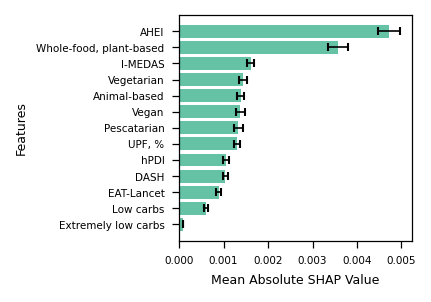

In [ ]:
diet_scores_features = [
    'vegetarian_score_per_day', 'wfpb_score_per_day', 'vegan_score_per_day', 
    'pescatarian_score_per_day', 'carnivore_score_per_day',
    'IMEDAS_score_per_day', 'eatLANCET_score_per_day', 'aHEI_score_per_day', 'hPDI_score_per_day', 
    'DASH_score', 'keto', 'low_carb_diet', 'NOVA_pct'
]

shap_data = process_mean_abs_shap(
    mean_abs_shap_df = mean_abs_shap_lgbm_abundance, 
    all_features = all_features, 
    top_n = 20,
    selected_features=diet_scores_features,
    file_name="mean_abs_shap_diet_scores"
    )

In [ ]:
map_df.loc[map_df['targets'].str.contains('fBin__108|gBin__525|sBin__778')]

,index,Microbe_Name,Pearson Correlation,targets,prevalence_count,prevalence_pct
index,,,,,,
22,22,CALXWF01 sp944391355,0.097659,fBin__108|gBin__521|sBin__773,826,8.20
24,24,Scatacola_A faecigallinarum,0.097258,fBin__108|gBin__525|sBin__778,2548,25.31
20,20,CAG-267 sp001917135,0.094331,fBin__108|gBin__515|sBin__767,2795,27.76
23,23,MGBC133411 sp900540425,0.085892,fBin__108|gBin__523|sBin__776,1254,12.46
26,26,51-20 sp001917175,0.076857,fBin__108|gBin__531|sBin__787,3025,30.05
21,21,CAZU01 sp000432275,0.055247,fBin__108|gBin__517|sBin__769,1500,14.90
25,25,Scatocola faecipullorum,0.046315,fBin__108|gBin__526|sBin__779,1888,18.75
19,19,CAG-267 sp900551865,0.033423,fBin__108|gBin__515|sBin__766,1158,11.50


In [ ]:
mean_abs_shap_lgbm_abundance

,0,1,3,4,5,6,7,9,10,11,...,715,716,717,718,719,720,721,722,723,mean_abs_shap
0,0.000007,0.000007,0.000031,0.000131,0.000016,0.000337,0.000000,0.000007,0.001650,0.000051,...,0.000016,0.000000,0.000039,0.000000,0.000000,0.000000,0.000157,0.000017,0.000000,0.000097
1,0.000071,0.000016,0.000054,0.000046,0.000024,0.000000,0.000018,0.000097,0.000000,0.000003,...,0.000007,0.000106,0.000021,0.000223,0.000000,0.000000,0.000000,0.000018,0.000000,0.000046
2,0.000360,0.000000,0.000031,0.000161,0.000752,0.000014,0.000038,0.000107,0.000467,0.000147,...,0.000845,0.000285,0.000029,0.000481,0.000153,0.000013,0.001172,0.000389,0.000322,0.000218
3,0.000158,0.000000,0.000000,0.000000,0.000021,0.000000,0.000005,0.000022,0.000000,0.000016,...,0.000000,0.000010,0.000585,0.000026,0.000101,0.000000,0.000000,0.000032,0.000000,0.000073
4,0.000020,0.000000,0.000000,0.000004,0.000107,0.000014,0.000028,0.000055,0.000794,0.000000,...,0.000026,0.000032,0.000110,0.000030,0.000137,0.000000,0.000094,0.000013,0.000000,0.000159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000402,0.000178,0.000174,0.000469,0.000113,0.001995,0.000250,0.000965,0.000170,0.000104,...,0.000436,0.000258,0.000148,0.000074,0.000150,0.000247,0.000081,0.000150,0.000068,0.000334
696,0.000421,0.001009,0.000665,0.000460,0.000843,0.001028,0.001824,0.001686,0.001293,0.000652,...,0.000195,0.003634,0.002033,0.005783,0.000336,0.000594,0.000722,0.000173,0.001049,0.001231
697,0.003380,0.010083,0.017522,0.003861,0.000958,0.006327,0.006545,0.013022,0.000856,0.001152,...,0.001344,0.007692,0.002013,0.000813,0.000584,0.000918,0.000388,0.000917,0.000210,0.003292
698,0.000208,0.000063,0.029013,0.003368,0.006677,0.003824,0.024507,0.044985,0.011485,0.000027,...,0.000569,0.045005,0.000138,0.000074,0.000843,0.000039,0.005119,0.003938,0.000108,0.010581


Find species that are highly predicted by a certain food

In [ ]:
food = "milkcreamcheeseandyogurts"
rank = 5

# 1. Find all microbes (i.e. columns) where food is in the top <rank> features by mean‐abs‐SHAP
food_index = all_features.index(food)

selected = []
for microbe in mean_abs_shap_lgbm_abundance.columns:
    # get the series of mean‐abs‐SHAP values for this microbe
    shap_s = mean_abs_shap_lgbm_abundance[microbe]
    # pick the top rank for this food
    top5 = shap_s.nlargest(rank).index
    if food_index in top5:
        selected.append(int(microbe))

mask = map_df.index.isin(selected)

ordered_species = map_df.loc[mask]

print("Microbes highly predicted by", food, ":")
ordered_species.head(20)


Microbes highly predicted by milkcreamcheeseandyogurts :


,index,Microbe_Name,Pearson Correlation,targets,prevalence_count,prevalence_pct
index,,,,,,
46,46,Streptococcus thermophilus,0.423344,fBin__187|gBin__748|sBin__1116,3937,39.10
230,230,Roseburia inulinivorans,0.209359,fBin__367|gBin__1465|sBin__2177,8880,88.20
587,587,Intestinimonas butyriciproducens,0.207222,fBin__541|gBin__2127|sBin__3277,3225,32.03
588,588,Intestinimonas massiliensis,0.190842,fBin__541|gBin__2128|sBin__3278,2273,22.58
27,27,Bifidobacterium animalis_B,0.183629,fBin__121|gBin__564|sBin__834,725,7.20
224,224,Agathobacter faecis,0.157173,fBin__367|gBin__1461|sBin__2170,8610,85.52
233,233,Roseburia intestinalis,0.151717,fBin__367|gBin__1467|sBin__2180,7721,76.69
326,326,Lachnospira pectinoschiza_A,0.149066,fBin__384|gBin__1586|sBin__2369,6229,61.87
53,53,Lactococcus lactis,0.146306,fBin__188|gBin__761|sBin__1162,852,8.46


### cFMD

In [ ]:
cFMD_taxa = pd.read_csv(home_path + "/data/cFMD_taxa_filtered.tsv", sep='\t').set_index('sample')
cFMD_meta = pd.read_csv(home_path + "/data/cFMD_metadata_filtered.tsv", sep='\t').set_index('sample')
cFMD_to_features_map = pd.read_csv(home_path + "/data/cFMD_to_features_mapping.csv")
cFMD_taxa


,YapM_2020__YapM_2020__ERR4142722,YapM_2020__YapM_2020__ERR4142723,YapM_2020__YapM_2020__ERR4142724,LiZ_2018__LiZ_2018__SRS2920553,LiZ_2018__LiZ_2018__SRS2920552,LiZ_2018__LiZ_2018__SRS2920550,PfeferT_xxxx__PfeferT_xxxx__SRS2870602,PfeferT_xxxx__PfeferT_xxxx__SRS2870601,PfeferT_xxxx__PfeferT_xxxx__SRS2870600,PfeferT_xxxx__PfeferT_xxxx__SRS2870599,...,MASTER_WP4_CSIC_1__MASTER_WP4_CSIC_1__P2147_73322,MASTER_WP4_CSIC_1__MASTER_WP4_CSIC_1__P2146_73322,MASTER_WP4_CSIC_1__MASTER_WP4_CSIC_1__P2145_73322,MASTER_WP4_CSIC_1__MASTER_WP4_CSIC_1__P2144_73322,MASTER_WP4_CSIC_1__MASTER_WP4_CSIC_1__P2143_73322,MASTER_WP4_CSIC_1__MASTER_WP4_CSIC_1__P2142_73322,MASTER_WP4_CSIC_1__MASTER_WP4_CSIC_1__P2139_73322,MASTER_WP4_CSIC_1__MASTER_WP4_CSIC_1__P2138_73322,MASTER_WP4_CSIC_1__MASTER_WP4_CSIC_1__P2137_73322,MASTER_WP4_CSIC_1__MASTER_WP4_CSIC_1__P2134_73322
sample,,,,,,,,,,,,,,,,,,,,,
s__Agathobaculum_butyriciproducens,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000
s__Akkermansia_muciniphila,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000
s__Alistipes_communis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000
s__Alistipes_finegoldii,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000
s__Alistipes_onderdonkii,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s__Streptococcus_salivarius,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000
s__Streptococcus_thermophilus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.95277,53.34325,63.28831,62.17146,76.20382,49.3825,0.78927,0.05354,1.97114,1.15024
s__Sutterella_SGB9281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000


In [ ]:
# Initialize an empty set to collect columns that match the conditions
matched_columns = set()

# Loop over each row of the mapping DataFrame
for _, row in cFMD_to_features_map.iterrows():
    match_row = row["match_row"]
    match_name = row["match_name"]
    
    # Find columns where the metadata row `match_row` has the value `match_name`
    matching = cFMD_meta.columns[cFMD_meta.loc[match_row] == match_name]
    matched_columns.update(matching)

# Filter both taxa and meta by the matched columns
matched_columns = list(matched_columns)
filtered_cFMD_taxa = cFMD_taxa[matched_columns]
filtered_cFMD_meta = cFMD_meta[matched_columns]
filtered_cFMD_taxa

,MASTER_WP4_UNINA_2__MASTER_WP4_UNINA_2__M-20,MASTER_WP4_FFoQSI_3__MASTER_WP4_FFoQSI_3__VB14-20,YasirM_2022__YasirM_2022__SRR18335001,MASTER_WP4_FFoQSI_1__MASTER_WP4_FFoQSI_1__RC17-04-AC,SequinoG_2024_b__SequinoG_2024_b__SRR27278228,MotaGutierrezJ_2021__MotaGutierrezJ_2021__SRR11602153,MASTER_WP4_UNINA_2__MASTER_WP4_UNINA_2__D-20,SequinoG_2024_b__SequinoG_2024_b__SRR27278128,MASTER_WP4_UNINA_2__MASTER_WP4_UNINA_2__R-32,SulaimanJ_2014__SulaimanJ_2014__SRS398267,...,MASTER_WP4_FFoQSI_3__MASTER_WP4_FFoQSI_3__VB07-23,ShangpliangH_2023_a__ShangpliangH_2023_a__SRR22851168,MASTER_WP4_UNINA_2__MASTER_WP4_UNINA_2__T-20,MASTER_WP4_FFoQSI_3__MASTER_WP4_FFoQSI_3__VB12-23,LordanR_2019__LordanR_2019__ERS2955447,MotaGutierrezJ_2021__MotaGutierrezJ_2021__SRR11602150,SulaimanJ_2014__SulaimanJ_2014__SRS398268,LeechJ_2020__LeechJ_2020__ERS3967718,PasolliE_2020__PasolliE_2020__SRS6525475,MotaGutierrezJ_2021__MotaGutierrezJ_2021__SRR11602155
sample,,,,,,,,,,,,,,,,,,,,,
s__Agathobaculum_butyriciproducens,0.00000,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.0,...,0.00000,0.00000,0.0000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0.0
s__Akkermansia_muciniphila,0.00000,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.0,...,0.00000,0.00000,0.0000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0.0
s__Alistipes_communis,0.00000,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.0,...,0.00000,0.00000,0.0000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0.0
s__Alistipes_finegoldii,0.00000,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.0,...,0.00000,0.00000,0.0000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0.0
s__Alistipes_onderdonkii,0.00000,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.0,...,0.00000,0.00000,0.0000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s__Streptococcus_salivarius,0.00000,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.0,...,0.00000,0.01278,0.0000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0.0
s__Streptococcus_thermophilus,0.56747,15.02514,0.0,2.07586,0.95861,0.0,1.13907,1.24807,17.63967,0.0,...,23.21776,53.73461,1.6928,31.46644,97.60534,0.0,0.0,97.80783,99.63953,0.0
s__Sutterella_SGB9281,0.00000,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.0,...,0.00000,0.00000,0.0000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0.0


cFMD heatmap

In [ ]:
# Normalize case and whitespace in both sets
filtered_species = filtered_cFMD_taxa.index.str.strip().str.lower().str.replace("s__", "")
map_species = map_df["Microbe_Name"].str.strip().str.lower()

# Step 1: Find overlapping names using normalized strings
shared_microbes_norm = filtered_species.intersection(map_species)

# Step 2: Get the original names from map_df that match the normalized shared names
subset = map_df[map_df["Microbe_Name"].str.strip().str.lower().isin(shared_microbes_norm)]

cFMD_indices = subset.index
cFMD_indices

Int64Index([523, 208,  45,  41, 123,  93,  43,  58,   2,  44,
            ...
            178, 504, 257,  57, 287, 393, 479, 167, 368, 419],
           dtype='int64', name='index', length=148)

In [ ]:
food_indices = [all_features.index(food) for food in cFMD_to_features_map["food"] if food in all_features]
food_indices

[446,
 389,
 561,
 336,
 236,
 227,
 456,
 457,
 277,
 208,
 217,
 506,
 468,
 387,
 176,
 255,
 37,
 556,
 152,
 158,
 68,
 329,
 432,
 45,
 202,
 226,
 130,
 319,
 441,
 235,
 666,
 112,
 167,
 494]

In [ ]:
### Presence matrix

# 1. Build a dict: food → list of experiment‐columns that correspond to that food
food_to_exp_cols = {}
for _, row in cFMD_to_features_map.iterrows():
    food       = row['food']
    match_row  = row['match_row']
    match_name = row['match_name']
    # select those columns in filtered_cFMD_meta where [match_row] == match_name
    exp_cols = filtered_cFMD_meta.columns[
        filtered_cFMD_meta.loc[match_row] == match_name
    ]
    food_to_exp_cols[food] = exp_cols

# 2. Initialize a boolean presence DataFrame
presence_matrix = pd.DataFrame(
    False,
    index=filtered_cFMD_taxa.index,
    columns=food_to_exp_cols.keys()
)

# 3. Fill it: for each food, mark True if microbe abundance > 0 in **any** of its experiments
for food, cols in food_to_exp_cols.items():
    # this gives you a Series indexed by microbe, True if any col > 0
    present = (filtered_cFMD_taxa[cols] > 0).any(axis=1)
    presence_matrix.loc[present, food] = True

# 4. (Optional) if you prefer 1/0 instead of True/False:
presence_matrix = presence_matrix.astype(int)

dense_presence_matrix = presence_matrix.loc[~(presence_matrix == 0).all(axis=1), ~(presence_matrix == 0).all(axis=0)]

# Quick check
print(presence_matrix.shape)       # -> (n_microbes, n_foods)
presence_matrix


(153, 36)


,Sauerkraut,Pickled vegetables,Kefir,Yogurt,Natural Yogurt,Greek Yogurt,Goat Milk Yogurt,Sheep Milk Yoghurt,Sheep milk Labaneh,Labneh Cheese,...,Feta Cheese,Goat Cheese,Coffee,Milk,Salmon,Grapes,Beefveallambandothermeatproducts,Chocolate,Dark Chocolate,Sweetened Cocoa Powder
sample,,,,,,,,,,,,,,,,,,,,,
s__Agathobaculum_butyriciproducens,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s__Akkermansia_muciniphila,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
s__Alistipes_communis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
s__Alistipes_finegoldii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
s__Alistipes_onderdonkii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s__Streptococcus_salivarius,0,0,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
s__Streptococcus_thermophilus,1,1,0,1,1,1,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
s__Sutterella_SGB9281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [ ]:
dense_presence_matrix

,Sauerkraut,Pickled vegetables,Yogurt,Natural Yogurt,Greek Yogurt,Goat Milk Yogurt,Sheep Milk Yoghurt,Flavored Yogurt,Fruit flavored Yogurt,Soy sauce,Cottage cheese,Milk,Beefveallambandothermeatproducts,Chocolate,Dark Chocolate,Sweetened Cocoa Powder
sample,,,,,,,,,,,,,,,,
s__Akkermansia_muciniphila,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
s__Alistipes_communis,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
s__Alistipes_finegoldii,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
s__Alistipes_onderdonkii,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
s__Alistipes_putredinis,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
s__Alistipes_shahii,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
s__Bacteroides_ovatus,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
s__Bacteroides_uniformis,1,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1
s__Bifidobacterium_adolescentis,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1


In [ ]:
food_indices

[446,
 389,
 561,
 336,
 236,
 227,
 456,
 457,
 277,
 208,
 217,
 506,
 468,
 387,
 176,
 255,
 37,
 556,
 152,
 158,
 68,
 329,
 432,
 45,
 202,
 226,
 130,
 319,
 441,
 235,
 666,
 112,
 167,
 494]

In [ ]:
signed_mean_abs_shap

,0,1,3,4,5,6,7,9,10,11,...,713,715,716,717,718,719,720,721,722,723
0,0.000007,0.000007,-0.000031,0.000131,0.000016,0.000337,-0.000000,0.000007,0.001650,0.000051,...,0.000007,-0.000016,-0.000000,0.000039,-0.000000,-0.000000,-0.000000,0.000157,0.000017,-0.000000
1,-0.000071,-0.000016,-0.000054,0.000046,0.000024,0.000000,0.000018,0.000097,-0.000000,-0.000003,...,-0.000020,-0.000007,0.000106,-0.000021,0.000223,-0.000000,-0.000000,-0.000000,0.000018,-0.000000
2,-0.000360,-0.000000,-0.000031,-0.000161,-0.000752,-0.000014,-0.000038,-0.000107,0.000467,-0.000147,...,0.000483,-0.000845,-0.000285,0.000029,0.000481,0.000153,-0.000013,0.001172,0.000389,0.000322
3,0.000158,-0.000000,-0.000000,-0.000000,-0.000021,-0.000000,0.000005,0.000022,0.000000,0.000016,...,0.000000,-0.000000,-0.000010,0.000585,-0.000026,0.000101,-0.000000,-0.000000,0.000032,-0.000000
4,0.000020,-0.000000,0.000000,-0.000004,0.000107,-0.000014,-0.000028,-0.000055,0.000794,0.000000,...,-0.000093,-0.000026,-0.000032,0.000110,0.000030,0.000137,-0.000000,-0.000094,-0.000013,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-0.000402,0.000178,-0.000174,0.000469,-0.000113,0.001995,0.000250,0.000965,-0.000170,0.000104,...,0.001293,0.000436,0.000258,-0.000148,-0.000074,0.000150,-0.000247,-0.000081,0.000150,-0.000068
696,0.000421,-0.001009,-0.000665,-0.000460,-0.000843,-0.001028,-0.001824,0.001686,0.001293,0.000652,...,0.002112,0.000195,0.003634,-0.002033,0.005783,-0.000336,0.000594,0.000722,-0.000173,0.001049
697,0.003380,0.010083,-0.017522,-0.003861,-0.000958,-0.006327,-0.006545,0.013022,-0.000856,0.001152,...,0.000559,-0.001344,0.007692,0.002013,0.000813,0.000584,0.000918,0.000388,-0.000917,-0.000210
698,-0.000208,-0.000063,0.029013,0.003368,0.006677,0.003824,0.024507,-0.044985,-0.011485,0.000027,...,-0.054918,0.000569,-0.045005,0.000138,-0.000074,0.000843,0.000039,-0.005119,-0.003938,0.000108


In [237]:
from matplotlib.colors import TwoSlopeNorm

def cFMD_heatmap(mean_abs_df,
                 cFMD_indices,
                 food_indices,
                 presence_matrix,
                 cluster=False,
                 dense=True):
    # Step 1: top 100 correlated microbes
    if dense:
        top_100_indices = cFMD_indices[:100]
    else:
        top_100_indices = cFMD_indices

    # Step 2: subset SHAP
    top_100_str = [str(i) for i in top_100_indices]
    mean_abs_top100 = mean_abs_df[top_100_str]

    print(top_100_indices)

    # Step 3: subset features
    heatmap_data = mean_abs_top100.iloc[food_indices]

    # percentiles
    p99 = heatmap_data.quantile(0.99).max()
    p01 = heatmap_data.quantile(0.01).min()

    # rename axes
    heatmap_data = heatmap_data.T
    heatmap_data.columns = [all_features[i] for i in food_indices]
    heatmap_data.index   = [map_df.loc[i, 'Microbe_Name'] for i in top_100_indices]

    print("heatmap_data pre-filter:", heatmap_data.shape)
    print("microbes example:", list(heatmap_data.index[:5]))
    print("foods example:", list(heatmap_data.columns[:5]))
    print("presence_matrix shape:", presence_matrix.shape)
    print("presence_matrix microbes example:", list(presence_matrix.index[:5]))
    print("presence_matrix foods example:", list(presence_matrix.columns[:5]))

    # Align safely and inspect coverage
    pres = presence_matrix.reindex(index=heatmap_data.index,
                                columns=heatmap_data.columns).fillna(False)
    print("pres aligned shape:", pres.shape)
    print("rows with any True:", pres.any(axis=1).sum(), "/", pres.shape[0])
    print("cols with any True:", pres.any(axis=0).sum(), "/", pres.shape[1])

    # Show mismatches if everything is False
    missing_rows = [m for m in heatmap_data.index if m not in presence_matrix.index]
    missing_cols = [f for f in heatmap_data.columns if f not in presence_matrix.columns]
    print("missing microbe names:", missing_rows[:10])
    print("missing food names:", missing_cols[:10])


    if dense:
        # Filter heatmap_data to include foods and microbes present in the presence_matrix
        pres = presence_matrix.loc[heatmap_data.index, heatmap_data.columns]

        keep_rows = pres.any(axis=1)
        keep_cols = pres.any(axis=0)

        heatmap_data = heatmap_data.loc[keep_rows, keep_cols]
        pres          = pres.loc[keep_rows, keep_cols]

        # sort foods by max SHAP
        food_order = heatmap_data.max(axis=0).sort_values(ascending=False).index
        heatmap_data = heatmap_data[food_order]
        pres          = pres[food_order]

    # mask near-zero
    zero_thresh = 0.001
    mask = heatmap_data.abs() < zero_thresh

    # plot
    if cluster:
        g = sns.clustermap(
            heatmap_data,
            cmap="coolwarm",
            vmin=p01, center=0, vmax=p99,
            mask=mask,
            cbar=True,
            linewidths=0.5, linecolor='lightgray',
            figsize=(heatmap_data.shape[1],heatmap_data.shape[0])
        )
        ax = g.ax_heatmap
    else:
        print("shape:", heatmap_data.shape)
        print("any finite:", np.isfinite(heatmap_data.to_numpy()).any())
        print("p01,p99:", p01, p99)

        plt.figure(figsize=(heatmap_data.shape[1] / 2,heatmap_data.shape[0] / 3))
        ax = sns.heatmap(
            heatmap_data,
            cmap="coolwarm",
            vmin=p01, center=0, vmax=p99,
            mask=mask,
            cbar=True,
            annot=False,
            linewidths=0.5, linecolor='lightgray'
        )

    # overlay stars from external presence_matrix
    # ensure the presence_matrix is indexed by (Microbe_Name, food)
    for i, microbe in enumerate(heatmap_data.index):
        for j, feature in enumerate(heatmap_data.columns):
            if presence_matrix.loc[microbe, feature]:
                ax.text(
                    j+0.5, i+0.5, '*',
                    ha='center', va='center',
                    color='black', fontsize='large'
                )

    ax.set_xlabel("Foods")
    ax.set_ylabel("Microbes")

    plt.savefig(
        home_path + f"figures/{PROBLEM}/{SPECIES}/shap_cFMD{aggregation}.png",
        dpi=400, facecolor="white", transparent=False, bbox_inches='tight'
    )
    plt.savefig(
        home_path + f"figures/{PROBLEM}/{SPECIES}/shap_cFMD{aggregation}.pdf",
        dpi=400, facecolor="white", transparent=False, bbox_inches='tight', format='pdf'
    )
    plt.show()

if SPECIES == "mpa_species":
    cFMD_heatmap(
        mean_abs_df=signed_mean_abs_shap,
        cFMD_indices=cFMD_indices,
        food_indices=food_indices,
        presence_matrix=presence_matrix,
        cluster=False,
        dense=True
    )

KeyError: "['2', '496', '113', '495', '14', '509', '387', '482', '530', '215', '405', '320'] not in index"

In [ ]:
# Filter cFMD_meta DataFrame to find all columns where in row index type == "milk"
cFMD_meta[cFMD_meta.columns[cFMD_meta.loc["type"] == "cocoa_beans"]].loc["subtype"]

MotaGutierrezJ_2021__MotaGutierrezJ_2021__SRR11602138    cocoa_pulp_bean_mass
MotaGutierrezJ_2021__MotaGutierrezJ_2021__SRR11602141    cocoa_pulp_bean_mass
MotaGutierrezJ_2021__MotaGutierrezJ_2021__SRR11602145    cocoa_pulp_bean_mass
MotaGutierrezJ_2021__MotaGutierrezJ_2021__SRR11602147    cocoa_pulp_bean_mass
MotaGutierrezJ_2021__MotaGutierrezJ_2021__SRR11602148    cocoa_pulp_bean_mass
MotaGutierrezJ_2021__MotaGutierrezJ_2021__SRR11602149    cocoa_pulp_bean_mass
MotaGutierrezJ_2021__MotaGutierrezJ_2021__SRR11602150    cocoa_pulp_bean_mass
MotaGutierrezJ_2021__MotaGutierrezJ_2021__SRR11602153    cocoa_pulp_bean_mass
MotaGutierrezJ_2021__MotaGutierrezJ_2021__SRR11602155    cocoa_pulp_bean_mass
LimaC_2020__LimaC_2020__SRR9640344                          chocolate_starter
LimaC_2020__LimaC_2020__SRR9640345                          chocolate_starter
LimaC_2020__LimaC_2020__SRR9640351                          chocolate_starter
LimaC_2020__LimaC_2020__SRR9640352                          choc

Distribution of SHAP values when present in food VS not

In [ ]:
len(significant_targets)

664

In [ ]:
mean_abs_shap_lgbm_abundance_named = mean_abs_shap_lgbm_abundance.drop("mean_abs_shap", axis=1).copy()
mean_abs_shap_lgbm_abundance_named.index = all_features
mean_abs_shap_lgbm_abundance_named.columns = significant_targets
mean_abs_shap_lgbm_abundance_named

,fBin__100|gBin__473|sBin__693,fBin__100|gBin__473|sBin__694,fBin__100|gBin__477|sBin__698,fBin__100|gBin__481|sBin__704,fBin__100|gBin__481|sBin__705,fBin__100|gBin__481|sBin__706,fBin__100|gBin__483|sBin__709,fBin__102|gBin__490|sBin__721,fBin__102|gBin__490|sBin__722,fBin__103|gBin__491|sBin__727,...,fBin__86|gBin__423|sBin__620,fBin__86|gBin__429|sBin__631,fBin__88|gBin__434|sBin__637,fBin__94|gBin__448|sBin__654,fBin__94|gBin__449|sBin__656,fBin__95|gBin__450|sBin__659,fBin__96|gBin__457|sBin__669,fBin__97|gBin__462|sBin__676,fBin__97|gBin__462|sBin__678,fBin__99|gBin__469|sBin__687
Acorn squash,0.000007,0.000007,0.000031,0.000131,0.000016,0.000337,0.000000,0.000007,0.001650,0.000051,...,0.000007,0.000016,0.000000,0.000039,0.000000,0.000000,0.000000,0.000157,0.000017,0.000000
Alfalfa sprouts,0.000071,0.000016,0.000054,0.000046,0.000024,0.000000,0.000018,0.000097,0.000000,0.000003,...,0.000020,0.000007,0.000106,0.000021,0.000223,0.000000,0.000000,0.000000,0.000018,0.000000
Almond Beverage,0.000360,0.000000,0.000031,0.000161,0.000752,0.000014,0.000038,0.000107,0.000467,0.000147,...,0.000483,0.000845,0.000285,0.000029,0.000481,0.000153,0.000013,0.001172,0.000389,0.000322
Almond flour,0.000158,0.000000,0.000000,0.000000,0.000021,0.000000,0.000005,0.000022,0.000000,0.000016,...,0.000000,0.000000,0.000010,0.000585,0.000026,0.000101,0.000000,0.000000,0.000032,0.000000
Almond spread,0.000020,0.000000,0.000000,0.000004,0.000107,0.000014,0.000028,0.000055,0.000794,0.000000,...,0.000093,0.000026,0.000032,0.000110,0.000030,0.000137,0.000000,0.000094,0.000013,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sweetmilkproducts,0.000402,0.000178,0.000174,0.000469,0.000113,0.001995,0.000250,0.000965,0.000170,0.000104,...,0.001293,0.000436,0.000258,0.000148,0.000074,0.000150,0.000247,0.000081,0.000150,0.000068
sweets,0.000421,0.001009,0.000665,0.000460,0.000843,0.001028,0.001824,0.001686,0.001293,0.000652,...,0.002112,0.000195,0.003634,0.002033,0.005783,0.000336,0.000594,0.000722,0.000173,0.001049
age,0.003380,0.010083,0.017522,0.003861,0.000958,0.006327,0.006545,0.013022,0.000856,0.001152,...,0.000559,0.001344,0.007692,0.002013,0.000813,0.000584,0.000918,0.000388,0.000917,0.000210
sex,0.000208,0.000063,0.029013,0.003368,0.006677,0.003824,0.024507,0.044985,0.011485,0.000027,...,0.054918,0.000569,0.045005,0.000138,0.000074,0.000843,0.000039,0.005119,0.003938,0.000108


In [ ]:
presence_matrix

,Sauerkraut,Pickled vegetables,Kefir,Yogurt,Natural Yogurt,Greek Yogurt,Goat Milk Yogurt,Sheep Milk Yoghurt,Sheep milk Labaneh,Labneh Cheese,...,Feta Cheese,Goat Cheese,Coffee,Milk,Salmon,Grapes,Beefveallambandothermeatproducts,Chocolate,Dark Chocolate,Sweetened Cocoa Powder
sample,,,,,,,,,,,,,,,,,,,,,
s__Agathobaculum_butyriciproducens,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s__Akkermansia_muciniphila,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
s__Alistipes_communis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
s__Alistipes_finegoldii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
s__Alistipes_onderdonkii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s__Streptococcus_salivarius,0,0,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
s__Streptococcus_thermophilus,1,1,0,1,1,1,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
s__Sutterella_SGB9281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [ ]:
presence_matrix.columns[presence_matrix.loc["s__Streptococcus_thermophilus"] == 1]

Index(['Sauerkraut', 'Pickled vegetables', 'Yogurt', 'Natural Yogurt',
       'Greek Yogurt', 'Goat Milk Yogurt', 'Sheep Milk Yoghurt',
       'Flavored Yogurt', 'Fruit flavored Yogurt', 'Cottage cheese', 'Milk',
       'Beefveallambandothermeatproducts'],
      dtype='object')

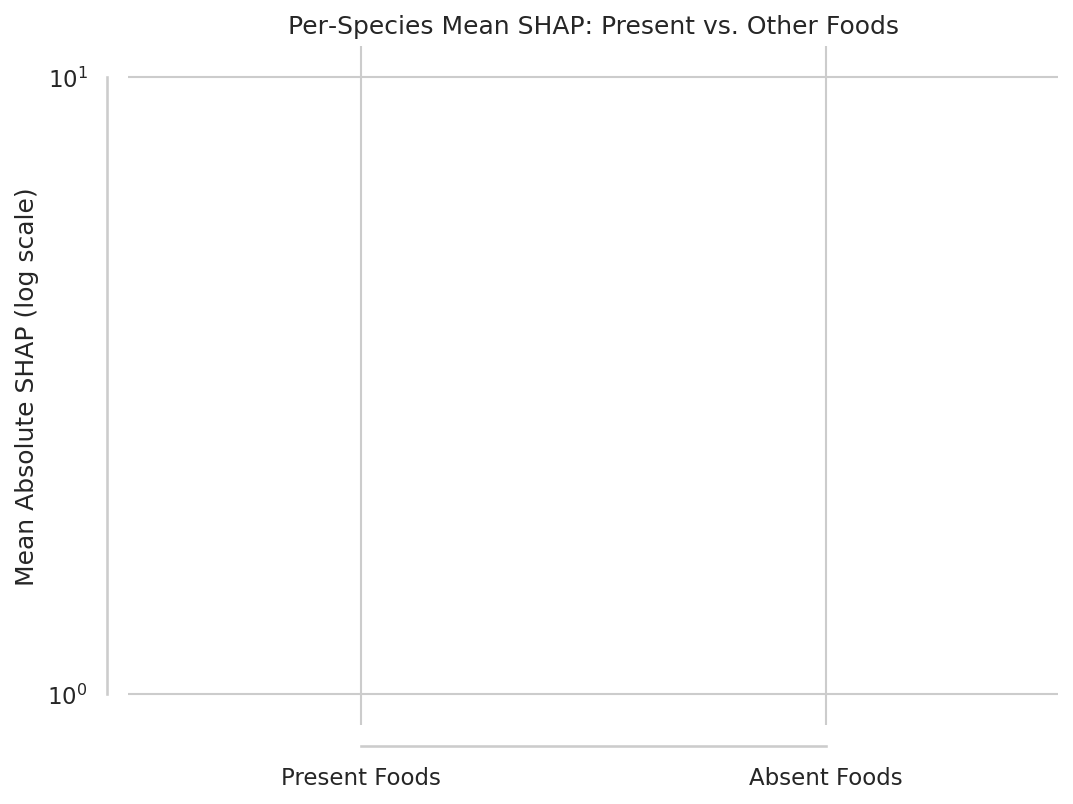

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

# Calculate per‐species mean SHAP for present vs. absent foods
species_present = presence_matrix.index[presence_matrix.any(axis=1)]
species_valid   = species_present.intersection(mean_abs_shap_lgbm_abundance_named.columns)

means_present = []
means_absent  = []
for sp in species_valid:
    present_foods = presence_matrix.columns[presence_matrix.loc[sp] == 1]
    absent_foods  = mean_abs_shap_lgbm_abundance_named.index.difference(present_foods)
    vals          = mean_abs_shap_lgbm_abundance_named[sp]
    means_present.append(vals.loc[present_foods].mean())
    means_absent.append(vals.loc[absent_foods].mean())

# Wilcoxon signed‐rank test
stat, pval = wilcoxon(means_present, means_absent)
print(f"Wilcoxon p‐value: {pval:.3e}")

# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8,6))

# Boxplot: present on left (position 1), absent on right (position 2)
bp = ax.boxplot(
    [means_present, means_absent],
    positions=[1, 2],
    widths=0.6,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(color='black', facecolor='white', alpha=0.3),
    medianprops=dict(color='black', linewidth=1),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(markeredgecolor='black', markerfacecolor='white', alpha=0.3),
    zorder=1
)
for k in ('boxes','whiskers','caps','medians','fliers'):
    for art in bp[k]:
        art.set_zorder(1)

# Scatter overlay
x_pres = np.random.normal(1, 0.04, size=len(means_present))
x_abs  = np.random.normal(2, 0.04, size=len(means_absent))
ax.scatter(x_pres, means_present, color='cadetblue', alpha=0.8, s=30, zorder=2)
ax.scatter(x_abs,  means_absent,  color='coral', alpha=0.8, s=30, zorder=2)

# Log scale & labels
ax.set_yscale('log')
ax.set_xticks([1,2])
ax.set_xticklabels(['Present Foods','Absent Foods'])
ax.set_ylabel('Mean Absolute SHAP (log scale)')
ax.set_title('Per‐Species Mean SHAP: Present vs. Other Foods')

# Annotate p‐value
ymin, ymax = ax.get_ylim()
ax.text(1.5, plt.ylim()[0] + 0.0001 * (plt.ylim()[1] - plt.ylim()[0]), f'Wilcoxon p-value: {pval:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))

sns.despine(offset=10, trim=True)

plt.show()


In [ ]:
mean_abs_shap_lgbm_abundance

,0,1,3,4,5,6,7,9,10,11,...,715,716,717,718,719,720,721,722,723,mean_abs_shap
0,0.000007,0.000007,0.000031,0.000131,0.000016,0.000337,0.000000,0.000007,0.001650,0.000051,...,0.000016,0.000000,0.000039,0.000000,0.000000,0.000000,0.000157,0.000017,0.000000,0.000097
1,0.000071,0.000016,0.000054,0.000046,0.000024,0.000000,0.000018,0.000097,0.000000,0.000003,...,0.000007,0.000106,0.000021,0.000223,0.000000,0.000000,0.000000,0.000018,0.000000,0.000046
2,0.000360,0.000000,0.000031,0.000161,0.000752,0.000014,0.000038,0.000107,0.000467,0.000147,...,0.000845,0.000285,0.000029,0.000481,0.000153,0.000013,0.001172,0.000389,0.000322,0.000218
3,0.000158,0.000000,0.000000,0.000000,0.000021,0.000000,0.000005,0.000022,0.000000,0.000016,...,0.000000,0.000010,0.000585,0.000026,0.000101,0.000000,0.000000,0.000032,0.000000,0.000073
4,0.000020,0.000000,0.000000,0.000004,0.000107,0.000014,0.000028,0.000055,0.000794,0.000000,...,0.000026,0.000032,0.000110,0.000030,0.000137,0.000000,0.000094,0.000013,0.000000,0.000159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000402,0.000178,0.000174,0.000469,0.000113,0.001995,0.000250,0.000965,0.000170,0.000104,...,0.000436,0.000258,0.000148,0.000074,0.000150,0.000247,0.000081,0.000150,0.000068,0.000334
696,0.000421,0.001009,0.000665,0.000460,0.000843,0.001028,0.001824,0.001686,0.001293,0.000652,...,0.000195,0.003634,0.002033,0.005783,0.000336,0.000594,0.000722,0.000173,0.001049,0.001231
697,0.003380,0.010083,0.017522,0.003861,0.000958,0.006327,0.006545,0.013022,0.000856,0.001152,...,0.001344,0.007692,0.002013,0.000813,0.000584,0.000918,0.000388,0.000917,0.000210,0.003292
698,0.000208,0.000063,0.029013,0.003368,0.006677,0.003824,0.024507,0.044985,0.011485,0.000027,...,0.000569,0.045005,0.000138,0.000074,0.000843,0.000039,0.005119,0.003938,0.000108,0.010581


Mann–Whitney U test p-value: 0.0682


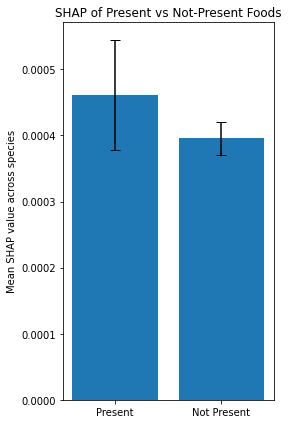

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# Boolean mask for present and non-present foods
is_present = mean_abs_shap_lgbm_abundance.index.isin(food_indices)
is_not_present = ~is_present

# Calculate mean SHAP across all species for each food
mean_shap_per_food = mean_abs_shap_lgbm_abundance.mean(axis=1)

# Values
present_values = mean_shap_per_food[is_present]
not_present_values = mean_shap_per_food[is_not_present]

# Compute means and SEMs
means = [present_values.mean(), not_present_values.mean()]
sems = [present_values.sem(), not_present_values.sem()]

# Mann–Whitney U test (non-parametric)
u_stat, u_pval = mannwhitneyu(present_values, not_present_values, alternative='two-sided')

print(f"Mann–Whitney U test p-value: {u_pval:.4f}")

# Plot with SEM error bars
plt.figure(figsize=(4, 6))
plt.bar(['Present', 'Not Present'], means, yerr=sems, capsize=5)
plt.ylabel('Mean SHAP value across species')
plt.title('SHAP of Present vs Not-Present Foods')

plt.show()
